In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
from tqdm import trange, notebook
import re # 정규표현식을 사용
warnings.filterwarnings(action='ignore')

In [ ]:
df= pd.concat([pd.read_pickle("../data/raw_data/pension_blog.pkl"), pd.read_pickle("../data/raw_data/pension_cafe.pkl")], axis=0)

In [3]:
df.columns

Index(['title', 'doc', 'like_cnt', 'comment_cnt', 'comment_list', 'img_cnt',
       'div_cnt', 'publish_date', 'ch', 'ch2', 'like', 'img', 'div'],
      dtype='object')

In [4]:
df= df.drop(columns=['publish_date','ch','ch2'],axis=1)

In [5]:
df

title  \
0                   국세체납 건강보험료 미납시 국민연금 연체 압류 때문에 고민한다면   
1                    국세체납 건강보험료 미납시 국민연금 연체 압류 어떻게 해결할까   
2                국세체납 건강보험료 미납 국민연금 연체 압류 등 세금 문제 해결하려면   
3           국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 면책 가능할까   
4      개인사업자 사업자등록 건강보험료, 국민연금 납부는 어떻게? 주부 프리랜서의 변신 (1)   
...                                                 ...   
22195                          안녕하세요. 은퇴계획 가르쳐 주실분 구해요ㅠ   
22196          #앙마 '더 내고 더 받는' 국민연금, 세대 이기주의? 노후 불안 해소?   
22197                             (충주 채용) 성심농아재활원 직원 채용   
22198                           늙은 유럽을 향해 달려가고 있는 한국사회.   
22199                            (태국부적)레인보우 리클라이 펜턴트 후기   

                                                     doc like_cnt  \
0      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n​​해마다 매년 경제가 불...        4   
1      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n​​경제가 침체되다 보니 ...        5   
2      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n​우리나라 국민은 납세의 ...        8   
3      \n\n\n\n\n국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 ...        3   
4      \n\n\n\n\n사업자등록하면어떤 일이 벌어지는지 진짜알고 계신건가요?\n\n\n...       71   
...                                                  ...      ...   
22195  \n\n\n\n\n\n\n\n\n본인을 어필 할 수 있는 사진 1장 혹은 본인 사진...      NaN   
22196  \n\n\n\n\n\n\n\n\n'더 내고 더 받는' 국민연금, 세대 이기주의? 노...      NaN   
22197  \n\n\n\n\n\n\n\n\n충주 성심농아재활원에서 아래와 같이 채용정보가 올라...      NaN   
22198  삼성스토어 용인처인본점 1주년 특별전 단10일간(5.4~5.13) https://n...      NaN   
22199  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\...      NaN   

                                            comment_cnt  \
0                                                  null   
1                                                  null   
2                                                  null   
3                                                  null   
4      \n\t\t\t\t\t\t\t\t\t\t\t26\n\t\t\t\t\t\t\t\t\t\t   
...                                                 ...   
22195                                                13   
22196                                                 1   
22197                                                 0   
22198                                                16   
22199                                                 5   

                                            comment_list img_cnt div_cnt like  \
0                                                   null      12       0  NaN   
1                                                   null      12       0  NaN   
2                                                   null      11       0  NaN   
3                                                   null      14       0  NaN   
4      비밀 댓글입니다.\n지역가입자 전환되면 납부하는 보험료가 상당하다 하더라구요 ㅠㅠ\...       7       0  NaN   
...                                                  ...     ...     ...  ...   
22195  이곳에 좀 더 상세한 수입과 지출에 대해 소개하세요. 사람마다 경험과 지식으로 도움...     NaN     NaN    2   
22196                 이런건 대체 누가 정한거죠?? 내는건 우리가 내는데;;\n\n     NaN     NaN    0   
22197                                                 \n     NaN     NaN    0   
22198  글과는 별로 상관없는 얘기인데 한국은 내수가 경제 성장에 기여한 적이 과거에 없었고...     NaN     NaN    9   
22199  뽐뿌 왔는데 품절인가 보네요😭\n옹?태국부적이라 치면 있습니다유?\n엇 탈리스만 메...     NaN     NaN    7   

       img  div  
0      NaN  NaN  
1      NaN  NaN  
2      NaN  NaN  
3      NaN  NaN  
4      NaN  NaN  
...    ...  ...  
22195  1.0  0.0  
22196  2.0  0.0  
22197  0.0  0.0  
22198  0.0  0.0  
22199  2.0  0.0  

[46680 rows x 10 columns]

In [6]:
data = df.reset_index(drop=True) # 인덱스 재설정
data

title  \
0                   국세체납 건강보험료 미납시 국민연금 연체 압류 때문에 고민한다면   
1                    국세체납 건강보험료 미납시 국민연금 연체 압류 어떻게 해결할까   
2                국세체납 건강보험료 미납 국민연금 연체 압류 등 세금 문제 해결하려면   
3           국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 면책 가능할까   
4      개인사업자 사업자등록 건강보험료, 국민연금 납부는 어떻게? 주부 프리랜서의 변신 (1)   
...                                                 ...   
46675                          안녕하세요. 은퇴계획 가르쳐 주실분 구해요ㅠ   
46676          #앙마 '더 내고 더 받는' 국민연금, 세대 이기주의? 노후 불안 해소?   
46677                             (충주 채용) 성심농아재활원 직원 채용   
46678                           늙은 유럽을 향해 달려가고 있는 한국사회.   
46679                            (태국부적)레인보우 리클라이 펜턴트 후기   

                                                     doc like_cnt  \
0      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n​​해마다 매년 경제가 불...        4   
1      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n​​경제가 침체되다 보니 ...        5   
2      \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n​우리나라 국민은 납세의 ...        8   
3      \n\n\n\n\n국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 ...        3   
4      \n\n\n\n\n사업자등록하면어떤 일이 벌어지는지 진짜알고 계신건가요?\n\n\n...       71   
...                                                  ...      ...   
46675  \n\n\n\n\n\n\n\n\n본인을 어필 할 수 있는 사진 1장 혹은 본인 사진...      NaN   
46676  \n\n\n\n\n\n\n\n\n'더 내고 더 받는' 국민연금, 세대 이기주의? 노...      NaN   
46677  \n\n\n\n\n\n\n\n\n충주 성심농아재활원에서 아래와 같이 채용정보가 올라...      NaN   
46678  삼성스토어 용인처인본점 1주년 특별전 단10일간(5.4~5.13) https://n...      NaN   
46679  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\...      NaN   

                                            comment_cnt  \
0                                                  null   
1                                                  null   
2                                                  null   
3                                                  null   
4      \n\t\t\t\t\t\t\t\t\t\t\t26\n\t\t\t\t\t\t\t\t\t\t   
...                                                 ...   
46675                                                13   
46676                                                 1   
46677                                                 0   
46678                                                16   
46679                                                 5   

                                            comment_list img_cnt div_cnt like  \
0                                                   null      12       0  NaN   
1                                                   null      12       0  NaN   
2                                                   null      11       0  NaN   
3                                                   null      14       0  NaN   
4      비밀 댓글입니다.\n지역가입자 전환되면 납부하는 보험료가 상당하다 하더라구요 ㅠㅠ\...       7       0  NaN   
...                                                  ...     ...     ...  ...   
46675  이곳에 좀 더 상세한 수입과 지출에 대해 소개하세요. 사람마다 경험과 지식으로 도움...     NaN     NaN    2   
46676                 이런건 대체 누가 정한거죠?? 내는건 우리가 내는데;;\n\n     NaN     NaN    0   
46677                                                 \n     NaN     NaN    0   
46678  글과는 별로 상관없는 얘기인데 한국은 내수가 경제 성장에 기여한 적이 과거에 없었고...     NaN     NaN    9   
46679  뽐뿌 왔는데 품절인가 보네요😭\n옹?태국부적이라 치면 있습니다유?\n엇 탈리스만 메...     NaN     NaN    7   

       img  div  
0      NaN  NaN  
1      NaN  NaN  
2      NaN  NaN  
3      NaN  NaN  
4      NaN  NaN  
...    ...  ...  
46675  1.0  0.0  
46676  2.0  0.0  
46677  0.0  0.0  
46678  0.0  0.0  
46679  2.0  0.0  

[46680 rows x 10 columns]

In [7]:
data.shape

(46680, 10)

In [3]:
import re # 정규표현식을 사용

In [2]:
from tqdm import trange, notebook

In [14]:
docs= data

In [15]:
# 제목, 본문, 댓글의 한글화
# 댓글 개수의 숫자화
for i in trange(len(docs)):
    # title에서 영문 대소문자, 한글, 숫자, 공백 문자를 제외한 모든 문자를 삭제
    docs['title'][i] = re.sub("[^0-9a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣 ]", '', str(data['title'][i]))
    
    # doc에서 영문 대소문자, 한글, 숫자, 공백 문자를 제외한 모든 문자를 삭제
    docs['doc'][i] = re.sub("[^0-9a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣 ]", '', str(data['doc'][i]))
    
    # comment_cnt에서 숫자를 제외한 모든 문자를 삭제
    docs['comment_cnt'][i] = re.sub("[^0-9]", "", str(docs['comment_cnt'][i]))
    
    # comment_list에서 영문 대소문자, 한글, 숫자, 공백 문자를 제외한 모든 문자를 삭제
    docs['comment_list'][i] = re.sub("[^0-9a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣 ]", '', str(data['comment_list'][i]))
    
docs

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 46680/46680 [00:51<00:00, 910.09it/s]


title  \
0               국세체납 건강보험료 미납시 국민연금 연체 압류 때문에 고민한다면   
1                국세체납 건강보험료 미납시 국민연금 연체 압류 어떻게 해결할까   
2            국세체납 건강보험료 미납 국민연금 연체 압류 등 세금 문제 해결하려면   
3       국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 면책 가능할까   
4      개인사업자 사업자등록 건강보험료 국민연금 납부는 어떻게 주부 프리랜서의 변신 1   
...                                             ...   
46675                       안녕하세요 은퇴계획 가르쳐 주실분 구해요ㅠ   
46676            앙마 더 내고 더 받는 국민연금 세대 이기주의 노후 불안 해소   
46677                           충주 채용 성심농아재활원 직원 채용   
46678                        늙은 유럽을 향해 달려가고 있는 한국사회   
46679                          태국부적레인보우 리클라이 펜턴트 후기   

                                                     doc like_cnt comment_cnt  \
0      해마다 매년 경제가 불황이라는 뉴스가 나오는 것 같다고 했습니다 올해도 어김없이 마...        4               
1      경제가 침체되다 보니 생활비 부족뿐만 아니라 국세체납부터 시작해 각종 부분에서 연체...        5               
2      우리나라 국민은 납세의 의무를 이행해야 된다고 했습니다 그러나 국세체납 금액이 너무...        8               
3      국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 면책 가능할까 경제...        3               
4      사업자등록하면어떤 일이 벌어지는지 진짜알고 계신건가요 개인사업자 준비중이신가요안녕하...       71          26   
...                                                  ...      ...         ...   
46675  본인을 어필 할 수 있는 사진 1장 혹은 본인 사진 본인사진이 아니여도 됩니다  현...      NaN          13   
46676  더 내고 더 받는 국민연금 세대 이기주의 노후 불안 해소40대 665 50대 666...      NaN           1   
46677  충주 성심농아재활원에서 아래와 같이 채용정보가 올라왔습니다해당되시는 회원님들께서는 ...      NaN           0   
46678  삼성스토어 용인처인본점 1주년 특별전 단10일간54513 httpsnaverme5A...      NaN          16   
46679   아타노르 사이트 들어가다  이 펜턴트 후기 내가 썼었나안 쓴 생각이 들어 후기를 ...      NaN           5   

                                            comment_list img_cnt div_cnt like  \
0                                                   null      12       0  NaN   
1                                                   null      12       0  NaN   
2                                                   null      11       0  NaN   
3                                                   null      14       0  NaN   
4      비밀 댓글입니다지역가입자 전환되면 납부하는 보험료가 상당하다 하더라구요 ㅠㅠ마음의 ...       7       0  NaN   
...                                                  ...     ...     ...  ...   
46675  이곳에 좀 더 상세한 수입과 지출에 대해 소개하세요 사람마다 경험과 지식으로 도움을...     NaN     NaN    2   
46676                         이런건 대체 누가 정한거죠 내는건 우리가 내는데     NaN     NaN    0   
46677                                                        NaN     NaN    0   
46678  글과는 별로 상관없는 얘기인데 한국은 내수가 경제 성장에 기여한 적이 과거에 없었고...     NaN     NaN    9   
46679  뽐뿌 왔는데 품절인가 보네요옹태국부적이라 치면 있습니다유엇 탈리스만 메뉴에 없어서 ...     NaN     NaN    7   

       img  div  
0      NaN  NaN  
1      NaN  NaN  
2      NaN  NaN  
3      NaN  NaN  
4      NaN  NaN  
...    ...  ...  
46675  1.0  0.0  
46676  2.0  0.0  
46677  0.0  0.0  
46678  0.0  0.0  
46679  2.0  0.0  

[46680 rows x 10 columns]

## 결측치 정리

In [16]:
for i in trange(len(docs)): # 본문
    if (len(docs['doc'][i]) < 2 or docs['doc'][i].isspace() == True): # 문서 내용이 두글자 미만이나 공백문서로만 되있는 경우 결측값 처리
        docs = docs.drop(i) # 해당 행 삭제
print("ok")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 46680/46680 [00:12<00:00, 3826.72it/s]

ok


In [17]:
docs = docs.reset_index(drop=True) # 인덱스 재설정
docs

title  \
0               국세체납 건강보험료 미납시 국민연금 연체 압류 때문에 고민한다면   
1                국세체납 건강보험료 미납시 국민연금 연체 압류 어떻게 해결할까   
2            국세체납 건강보험료 미납 국민연금 연체 압류 등 세금 문제 해결하려면   
3       국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 면책 가능할까   
4      개인사업자 사업자등록 건강보험료 국민연금 납부는 어떻게 주부 프리랜서의 변신 1   
...                                             ...   
43621                       안녕하세요 은퇴계획 가르쳐 주실분 구해요ㅠ   
43622            앙마 더 내고 더 받는 국민연금 세대 이기주의 노후 불안 해소   
43623                           충주 채용 성심농아재활원 직원 채용   
43624                        늙은 유럽을 향해 달려가고 있는 한국사회   
43625                          태국부적레인보우 리클라이 펜턴트 후기   

                                                     doc like_cnt comment_cnt  \
0      해마다 매년 경제가 불황이라는 뉴스가 나오는 것 같다고 했습니다 올해도 어김없이 마...        4               
1      경제가 침체되다 보니 생활비 부족뿐만 아니라 국세체납부터 시작해 각종 부분에서 연체...        5               
2      우리나라 국민은 납세의 의무를 이행해야 된다고 했습니다 그러나 국세체납 금액이 너무...        8               
3      국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 면책 가능할까 경제...        3               
4      사업자등록하면어떤 일이 벌어지는지 진짜알고 계신건가요 개인사업자 준비중이신가요안녕하...       71          26   
...                                                  ...      ...         ...   
43621  본인을 어필 할 수 있는 사진 1장 혹은 본인 사진 본인사진이 아니여도 됩니다  현...      NaN          13   
43622  더 내고 더 받는 국민연금 세대 이기주의 노후 불안 해소40대 665 50대 666...      NaN           1   
43623  충주 성심농아재활원에서 아래와 같이 채용정보가 올라왔습니다해당되시는 회원님들께서는 ...      NaN           0   
43624  삼성스토어 용인처인본점 1주년 특별전 단10일간54513 httpsnaverme5A...      NaN          16   
43625   아타노르 사이트 들어가다  이 펜턴트 후기 내가 썼었나안 쓴 생각이 들어 후기를 ...      NaN           5   

                                            comment_list img_cnt div_cnt like  \
0                                                   null      12       0  NaN   
1                                                   null      12       0  NaN   
2                                                   null      11       0  NaN   
3                                                   null      14       0  NaN   
4      비밀 댓글입니다지역가입자 전환되면 납부하는 보험료가 상당하다 하더라구요 ㅠㅠ마음의 ...       7       0  NaN   
...                                                  ...     ...     ...  ...   
43621  이곳에 좀 더 상세한 수입과 지출에 대해 소개하세요 사람마다 경험과 지식으로 도움을...     NaN     NaN    2   
43622                         이런건 대체 누가 정한거죠 내는건 우리가 내는데     NaN     NaN    0   
43623                                                        NaN     NaN    0   
43624  글과는 별로 상관없는 얘기인데 한국은 내수가 경제 성장에 기여한 적이 과거에 없었고...     NaN     NaN    9   
43625  뽐뿌 왔는데 품절인가 보네요옹태국부적이라 치면 있습니다유엇 탈리스만 메뉴에 없어서 ...     NaN     NaN    7   

       img  div  
0      NaN  NaN  
1      NaN  NaN  
2      NaN  NaN  
3      NaN  NaN  
4      NaN  NaN  
...    ...  ...  
43621  1.0  0.0  
43622  2.0  0.0  
43623  0.0  0.0  
43624  0.0  0.0  
43625  2.0  0.0  

[43626 rows x 10 columns]

In [18]:
# like, comment_cnt, img, div의 데이터 타입을 숫자로 변환
# 변환 중 에러 발생시 NaN으로 처리
docs['like'] = pd.to_numeric(docs['like'], errors='coerce').astype('Int64') # errors=coerce : 변환불가 값은 NaN처리
docs['comment_cnt'] = pd.to_numeric(docs['comment_cnt'], errors='coerce').astype('Int64')
docs['img'] = pd.to_numeric(docs['img'], errors='coerce').astype('Int64')
docs['div'] = pd.to_numeric(docs['div'], errors='coerce').astype('Int64')

docs

title  \
0               국세체납 건강보험료 미납시 국민연금 연체 압류 때문에 고민한다면   
1                국세체납 건강보험료 미납시 국민연금 연체 압류 어떻게 해결할까   
2            국세체납 건강보험료 미납 국민연금 연체 압류 등 세금 문제 해결하려면   
3       국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 면책 가능할까   
4      개인사업자 사업자등록 건강보험료 국민연금 납부는 어떻게 주부 프리랜서의 변신 1   
...                                             ...   
43621                       안녕하세요 은퇴계획 가르쳐 주실분 구해요ㅠ   
43622            앙마 더 내고 더 받는 국민연금 세대 이기주의 노후 불안 해소   
43623                           충주 채용 성심농아재활원 직원 채용   
43624                        늙은 유럽을 향해 달려가고 있는 한국사회   
43625                          태국부적레인보우 리클라이 펜턴트 후기   

                                                     doc like_cnt  \
0      해마다 매년 경제가 불황이라는 뉴스가 나오는 것 같다고 했습니다 올해도 어김없이 마...        4   
1      경제가 침체되다 보니 생활비 부족뿐만 아니라 국세체납부터 시작해 각종 부분에서 연체...        5   
2      우리나라 국민은 납세의 의무를 이행해야 된다고 했습니다 그러나 국세체납 금액이 너무...        8   
3      국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 면책 가능할까 경제...        3   
4      사업자등록하면어떤 일이 벌어지는지 진짜알고 계신건가요 개인사업자 준비중이신가요안녕하...       71   
...                                                  ...      ...   
43621  본인을 어필 할 수 있는 사진 1장 혹은 본인 사진 본인사진이 아니여도 됩니다  현...      NaN   
43622  더 내고 더 받는 국민연금 세대 이기주의 노후 불안 해소40대 665 50대 666...      NaN   
43623  충주 성심농아재활원에서 아래와 같이 채용정보가 올라왔습니다해당되시는 회원님들께서는 ...      NaN   
43624  삼성스토어 용인처인본점 1주년 특별전 단10일간54513 httpsnaverme5A...      NaN   
43625   아타노르 사이트 들어가다  이 펜턴트 후기 내가 썼었나안 쓴 생각이 들어 후기를 ...      NaN   

       comment_cnt                                       comment_list img_cnt  \
0             <NA>                                               null      12   
1             <NA>                                               null      12   
2             <NA>                                               null      11   
3             <NA>                                               null      14   
4               26  비밀 댓글입니다지역가입자 전환되면 납부하는 보험료가 상당하다 하더라구요 ㅠㅠ마음의 ...       7   
...            ...                                                ...     ...   
43621           13  이곳에 좀 더 상세한 수입과 지출에 대해 소개하세요 사람마다 경험과 지식으로 도움을...     NaN   
43622            1                         이런건 대체 누가 정한거죠 내는건 우리가 내는데     NaN   
43623            0                                                        NaN   
43624           16  글과는 별로 상관없는 얘기인데 한국은 내수가 경제 성장에 기여한 적이 과거에 없었고...     NaN   
43625            5  뽐뿌 왔는데 품절인가 보네요옹태국부적이라 치면 있습니다유엇 탈리스만 메뉴에 없어서 ...     NaN   

      div_cnt  like   img   div  
0           0  <NA>  <NA>  <NA>  
1           0  <NA>  <NA>  <NA>  
2           0  <NA>  <NA>  <NA>  
3           0  <NA>  <NA>  <NA>  
4           0  <NA>  <NA>  <NA>  
...       ...   ...   ...   ...  
43621     NaN     2     1     0  
43622     NaN     0     2     0  
43623     NaN     0     0     0  
43624     NaN     9     0     0  
43625     NaN     7     2     0  

[43626 rows x 10 columns]

## 토큰화 및 형태소 분석

In [19]:
from tqdm import tqdm # 반복문, 반복작업과정의 진행상황을 시각적으로 제시
from konlpy.tag import Komoran # 한국어 형태소 분석을 위해 konlpy 로부터 Komoran 클래스를 import
komoran = Komoran() # Komoran 클래스의 인스턴스 생성

## **제목 토큰화**

In [20]:
title_token_list = [] # 제목의 형태소를 담아낼 리스트
title_token_noun = [] # 제목의 명사를 담아낼 리스트
for i in trange(len(docs)):
    # komoran.pos() 메서드를 사용하여 형태소 분석 실시
    pos = komoran.pos(u'{}'.format(docs['title'][i])) 
    
    # komoran.nouns() 메서드를 사용하여 길이가 2이상인 명사를 추출라고 리스트에 저장
    noun = list(term for term in komoran.nouns(u'{}'.format(docs['title'][i])) if len(term) >1)
    
    title_token_list.append(pos) # 형태소 분석결과를 리스트에 추가
    title_token_noun.append(noun) # 추출한 명사를 리스트에 추가

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43626/43626 [00:16<00:00, 2703.09it/s]


## **본문 토큰화**

In [21]:
doc_token_list = [] # 본문의 형태소를 담아낼 리스트
doc_token_noun = [] # 본문의 명사를 담아낼 리스트
for i in trange(len(docs)):    
    # komoran.pos() 메서드를 사용하여 형태소 분석 결과
    pos = komoran.pos(u'{}'.format(docs['doc'][i]))
    
    # komoran.nouns() 메서드를 사용하여 명사만 추출, 길이가 2 이상인 명사만 리스트에 저장
    noun = list(term for term in komoran.nouns(u'{}'.format(docs['doc'][i])) if len(term) >1)
    
    doc_token_list.append(pos) # 형태소 분석결과를 리스트에 추가
    doc_token_noun.append(noun) # 추출한 명사를 리스트에 추가

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43626/43626 [52:26<00:00, 13.87it/s]


## **댓글 토큰화**

In [28]:
comment_token_list = [] # 본문의 형태소를 담아낼 리스트
comment_token_noun = [] # 본문의 명사를 담아낼 리스트
for i in trange(len(docs)):
    
    # komoran.pos() 메서드를 사용하여 형태소 분석 결과
    pos = komoran.pos(u'{}'.format(docs['comment_list'][i]))
    
    # komoran.nouns() 메서드를 사용하여 명사만 추출, 길이가 2 이상인 명사만 리스트에 저장
    noun = list(term for term in komoran.nouns(u'{}'.format(docs['comment_list'][i])) if len(term) >1)
    
    comment_token_list.append(pos) # 형태소 분석결과를 리스트에 추가
    comment_token_noun.append(noun) # 추출한 명사를 리스트에 추가

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43626/43626 [24:02<00:00, 30.25it/s]


## **불용어처리**

In [ ]:
f = open("../data/stopwords-ko.txt", "r", encoding = "UTF-8") #  UTF-8으로 저장된 한글 불용어 파일 읽어들여오기
st = f.readlines()  # 불용어가 줄단위로 저장된 리스트
f.close()

In [38]:
stw = []
for i in notebook.tqdm(range(len(st))):
    stw.append(st[i].rstrip('\n')) # st리스트에서 '\n' 제거

  0%|          | 0/679 [00:00<?, ?it/s]

In [39]:
len(stw)

679

In [31]:
user_stopwords = ['국민연금','현장','배정','정기','주주총회','개막','시즌','있다','주총','한도','승인','안건','부회장','여부','논란','이슈','전망','열기','주주',
                  '장시간','질의','위기감','대응','주주','경계','사업','상대로','비교','예년','주목','이슈','예정','이데일리','기사','신혜선','오전','오후',
                  '서울','용산','연금','수령','방법','납부','신청','보험료','국민연금공단','가입','조회','소득','경우','금액','기간','기준','만원','가입자','수급',
                  '지급','제도','노후','노령','때문','니다','확인','개월','이후','나이','본인','정보','연령','보장','오늘','일시','자격','조건','미만','댓글','비밀',
                  '감사','안녕하세요','블로그','가요','공감','화이팅','날씨','즐거운 하루','편안','저녁','제가','마무리','답방','응원','지금','말씀','요즘','감기',
                  '정도','기분','해주시','덕분','오후','나중','설명','고맙습니다','조회','월요일','금요일','필요','국민','내용','KBS 뉴스','한국','올해','장관',
                  '필요','대통령','오늘','추진','개최','뉴스','최대','반대','논의','내년','기자','양희','사유','실시','계획','하나로','7월 1일','대상','최대','이다',
                  '웨딩','재생','부산','신부','설정','해상도','사용','컨벤션','사진','준비','생각','대기실','느낌','자막','기본','소거','안함','도움말','투어',
                  '진행','주차','뷔페','영상','취소','결혼','위치','에메랄드','보내기','지도','공유','발생','고딕','사람','480p','변경','예식','전체','마음','계약',
                  '파티','상태','이용','하객','부동산','예약','카드','광고','시도', '크기','배포','금지','전재','무단','사장','오늘', '생각', '기준', '지역','사이트','회원','다운','추가',
                  '완성','포인트','다운로드','충전','신규','제휴','작성','이벤트','저도','바우','해주','아래','링크','자가','해주시','등록','특례',
                  '네이버','구부','다이','이얼','마나','한일','서로','이다','현재','해서','댓글','하기','니다','이하','안녕하세요','해도','오늘','하면',
                  '카페','고맙습니다','이고','제가','내세','가요','만세','이노','때문','블로그','블로거','카페','만원','보내기','준비', '후기', '정리', '경력', 
                  '부탁', '이혼', '햇살', '주차', '공유', '필기', '면접', '공고', '가입', '관련', '방법', '문의', '확인', '신청', '수급', '계획', '경우', '부탁', 
                  '변경', '조희', '기간', '주차', '처리', '공유', '적용', '면접','오늘', '생각', '기준', '지역','사이트','회원','다운','추가','완성','포인트',
                  '다운로드','충전','신규','제휴','작성','이벤트',
                  '저도','바우','해주','아래','링크','자가','해주시','등록',
                  '네이버','구부','다이','이얼','마나','한일','서로','이다','현재',
                  '해서','댓글','하기','니다','이하','안녕하세요','해도','오늘','하면',
                  '카페','고맙습니다','이고','제가','내세','가요','만세','이노','때문',
                  '블로그','블로거','카페','만원','보내기','준비', '후기', '정리', 
                  '부탁', '이혼', '햇살', '주차', '공유', '필기', '면접', '공고', '가입', 
                  '관련', '방법', '문의', '확인', '신청', '수급', '계획', '경우', '부탁', 
                  '변경', '조희', '기간', '주차', '처리', '공유', '적용', '면접','마찬가지','여기저기','최근','내야','당연','사실','인해','내야','예외']


359


In [40]:
stw.extend(user_stopwords)

In [41]:
len(stw)

1038

In [44]:
for word in notebook.tqdm(stw):
    for i in range(0, len(title_token_noun)):
        # 리스트에 불용어가 있을 경우 제거
        while word in title_token_noun[i]:
            title_token_noun[i].remove(word)
        while word in doc_token_noun[i]:
            doc_token_noun[i].remove(word)
        while word in comment_token_noun[i]:
            comment_token_noun[i].remove(word)

  0%|          | 0/1038 [00:00<?, ?it/s]

In [45]:
# 문서파일 docs로 적용하여 각각의 불용어 제거 
docs['title_token_list_pos'] = title_token_list  # 형태소와 품사 리스트 
docs['title_token_noun'] = title_token_noun      # 명사 리스트
docs['doc_token_noun'] = doc_token_noun
docs['doc_token_list_pos'] = doc_token_list
docs['comment_token_list_pos'] = comment_token_list
docs['comment_token_noun'] = comment_token_noun

In [46]:
import pickle
f = open("cafeblog_total_doc.pkl", "wb") # total_doc.pkl로 저장
pickle.dump(docs, f)
f.close()

#### 추가로 불용어 처리

In [20]:
df= pd.read_pickle("./cafeblog_total_doc.pkl")

In [21]:
title_token_list_pos=df['title_token_list_pos'].tolist()
title_token_noun =df['title_token_noun'].tolist()
doc_token_noun=df['doc_token_noun'].tolist()
doc_token_list_pos=df['doc_token_list_pos'].tolist()
comment_token_list_pos=df['comment_token_list_pos'].tolist()
comment_token_noun=df['comment_token_noun'].tolist()

In [ ]:
f = open("../data/stopwords-ko.txt", "r", encoding = "UTF-8") #  UTF-8으로 저장된 한글 불용어 파일 읽어들여오기
st = f.readlines()  # 불용어가 줄단위로 저장된 리스트
f.close()

stw = []
for i in notebook.tqdm(range(len(st))):
    stw.append(st[i].rstrip('\n')) # st리스트에서 '\n' 제거

user_stopwords = ['국민연금','현장','배정','정기','주주총회','개막','시즌','있다','주총','한도','승인','안건','부회장','여부','논란','이슈','전망','열기','주주',
                  '장시간','질의','위기감','대응','주주','경계','사업','상대로','비교','예년','주목','이슈','예정','이데일리','기사','신혜선','오전','오후',
                  '서울','용산','연금','수령','방법','납부','신청','보험료','국민연금공단','가입','조회','소득','경우','금액','기간','기준','만원','가입자','수급',
                  '지급','제도','노후','노령','때문','니다','확인','개월','이후','나이','본인','정보','연령','보장','오늘','일시','자격','조건','미만','댓글','비밀',
                  '감사','안녕하세요','블로그','가요','공감','화이팅','날씨','즐거운 하루','편안','저녁','제가','마무리','답방','응원','지금','말씀','요즘','감기',
                  '정도','기분','해주시','덕분','오후','나중','설명','고맙습니다','조회','월요일','금요일','필요','국민','내용','KBS 뉴스','한국','올해','장관',
                  '필요','대통령','오늘','추진','개최','뉴스','최대','반대','논의','내년','기자','양희','사유','실시','계획','하나로','7월 1일','대상','최대','이다',
                  '웨딩','재생','부산','신부','설정','해상도','사용','컨벤션','사진','준비','생각','대기실','느낌','자막','기본','소거','안함','도움말','투어',
                  '진행','주차','뷔페','영상','취소','결혼','위치','에메랄드','보내기','지도','공유','발생','고딕','사람','480p','변경','예식','전체','마음','계약',
                  '파티','상태','이용','하객','부동산','예약','카드','광고','시도', '크기','배포','금지','전재','무단','사장','오늘', '생각', '기준', '지역','사이트','회원','다운','추가',
                  '완성','포인트','다운로드','충전','신규','제휴','작성','이벤트','저도','바우','해주','아래','링크','자가','해주시','등록','특례',
                  '네이버','구부','다이','이얼','마나','한일','서로','이다','현재','해서','댓글','하기','니다','이하','안녕하세요','해도','오늘','하면',
                  '카페','고맙습니다','이고','제가','내세','가요','만세','이노','때문','블로그','블로거','카페','만원','보내기','준비', '후기', '정리', '경력', 
                  '부탁', '이혼', '햇살', '주차', '공유', '필기', '면접', '공고', '가입', '관련', '방법', '문의', '확인', '신청', '수급', '계획', '경우', '부탁', 
                  '변경', '조희', '기간', '주차', '처리', '공유', '적용', '면접','오늘', '생각', '기준', '지역','사이트','회원','다운','추가','완성','포인트',
                  '다운로드','충전','신규','제휴','작성','이벤트',
                  '저도','바우','해주','아래','링크','자가','해주시','등록',
                  '네이버','구부','다이','이얼','마나','한일','서로','이다','현재',
                  '해서','댓글','하기','니다','이하','안녕하세요','해도','오늘','하면',
                  '카페','고맙습니다','이고','제가','내세','가요','만세','이노','때문',
                  '블로그','블로거','카페','만원','보내기','준비', '후기', '정리', 
                  '부탁', '이혼', '햇살', '주차', '공유', '필기', '면접', '공고', '가입', 
                  '관련', '방법', '문의', '확인', '신청', '수급', '계획', '경우', '부탁', 
                  '변경', '조희', '기간', '주차', '처리', '공유', '적용', '면접','마찬가지','여기저기','최근','내야','당연','사실','인해','내야',
                  '예외','복사','허용','글자','옵션','파일','컴퓨터','저장','게시','저작권','작성자','도용','복제','삼성','스토어','용인','프로모션',
                  '더보','본점','주년','오류']


stw.extend(user_stopwords)

  0%|          | 0/679 [00:00<?, ?it/s]

In [23]:
len(stw)

1067

In [24]:
for word in notebook.tqdm(stw):
    for i in range(0, len(title_token_noun)):
        # 리스트에 불용어가 있을 경우 제거
        while word in title_token_noun[i]:
            title_token_noun[i].remove(word)
        while word in doc_token_noun[i]:
            doc_token_noun[i].remove(word)
        while word in comment_token_noun[i]:
            comment_token_noun[i].remove(word)

  0%|          | 0/1067 [00:00<?, ?it/s]

In [24]:
df.columns

Index(['title', 'doc', 'like_cnt', 'comment_cnt', 'comment_list', 'img_cnt',
       'div_cnt', 'like', 'img', 'div', 'title_token_list_pos',
       'title_token_noun', 'doc_token_noun', 'doc_token_list_pos',
       'comment_token_list_pos', 'comment_token_noun'],
      dtype='object')

In [25]:
df['title_token_list_pos']=title_token_list_pos
df['title_token_noun']=title_token_noun
df['doc_token_noun']=doc_token_noun
df['doc_token_list_pos']=doc_token_list_pos
df['comment_token_list_pos']=comment_token_list_pos
df['comment_token_noun']=comment_token_noun

In [26]:
df

title  \
0               국세체납 건강보험료 미납시 국민연금 연체 압류 때문에 고민한다면   
1                국세체납 건강보험료 미납시 국민연금 연체 압류 어떻게 해결할까   
2            국세체납 건강보험료 미납 국민연금 연체 압류 등 세금 문제 해결하려면   
3       국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 면책 가능할까   
4      개인사업자 사업자등록 건강보험료 국민연금 납부는 어떻게 주부 프리랜서의 변신 1   
...                                             ...   
43621                       안녕하세요 은퇴계획 가르쳐 주실분 구해요ㅠ   
43622            앙마 더 내고 더 받는 국민연금 세대 이기주의 노후 불안 해소   
43623                           충주 채용 성심농아재활원 직원 채용   
43624                        늙은 유럽을 향해 달려가고 있는 한국사회   
43625                          태국부적레인보우 리클라이 펜턴트 후기   

                                                     doc like_cnt  \
0      해마다 매년 경제가 불황이라는 뉴스가 나오는 것 같다고 했습니다 올해도 어김없이 마...        4   
1      경제가 침체되다 보니 생활비 부족뿐만 아니라 국세체납부터 시작해 각종 부분에서 연체...        5   
2      우리나라 국민은 납세의 의무를 이행해야 된다고 했습니다 그러나 국세체납 금액이 너무...        8   
3      국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 면책 가능할까 경제...        3   
4      사업자등록하면어떤 일이 벌어지는지 진짜알고 계신건가요 개인사업자 준비중이신가요안녕하...       71   
...                                                  ...      ...   
43621  본인을 어필 할 수 있는 사진 1장 혹은 본인 사진 본인사진이 아니여도 됩니다  현...      NaN   
43622  더 내고 더 받는 국민연금 세대 이기주의 노후 불안 해소40대 665 50대 666...      NaN   
43623  충주 성심농아재활원에서 아래와 같이 채용정보가 올라왔습니다해당되시는 회원님들께서는 ...      NaN   
43624  삼성스토어 용인처인본점 1주년 특별전 단10일간54513 httpsnaverme5A...      NaN   
43625   아타노르 사이트 들어가다  이 펜턴트 후기 내가 썼었나안 쓴 생각이 들어 후기를 ...      NaN   

       comment_cnt                                       comment_list img_cnt  \
0             <NA>                                               null      12   
1             <NA>                                               null      12   
2             <NA>                                               null      11   
3             <NA>                                               null      14   
4               26  비밀 댓글입니다지역가입자 전환되면 납부하는 보험료가 상당하다 하더라구요 ㅠㅠ마음의 ...       7   
...            ...                                                ...     ...   
43621           13  이곳에 좀 더 상세한 수입과 지출에 대해 소개하세요 사람마다 경험과 지식으로 도움을...     NaN   
43622            1                         이런건 대체 누가 정한거죠 내는건 우리가 내는데     NaN   
43623            0                                                        NaN   
43624           16  글과는 별로 상관없는 얘기인데 한국은 내수가 경제 성장에 기여한 적이 과거에 없었고...     NaN   
43625            5  뽐뿌 왔는데 품절인가 보네요옹태국부적이라 치면 있습니다유엇 탈리스만 메뉴에 없어서 ...     NaN   

      div_cnt  like   img   div  \
0           0  <NA>  <NA>  <NA>   
1           0  <NA>  <NA>  <NA>   
2           0  <NA>  <NA>  <NA>   
3           0  <NA>  <NA>  <NA>   
4           0  <NA>  <NA>  <NA>   
...       ...   ...   ...   ...   
43621     NaN     2     1     0   
43622     NaN     0     2     0   
43623     NaN     0     0     0   
43624     NaN     9     0     0   
43625     NaN     7     2     0   

                                    title_token_list_pos  \
0      [(국세, NNG), (체납, NNG), (건강, NNP), (보험료, NNP), ...   
1      [(국세, NNG), (체납, NNG), (건강, NNP), (보험료, NNP), ...   
2      [(국세, NNG), (체납, NNG), (건강, NNP), (보험료, NNP), ...   
3      [(국세, NNG), (체납, NNG), (건강, NNP), (보험료, NNP), ...   
4      [(개인, NNG), (사업자, NNP), (사업자, NNP), (등록, NNP),...   
...                                                  ...   
43621  [(안녕하세요, NNP), (은퇴, NNG), (계획, NNG), (가르치, VV)...   
43622  [(앙, IC), (마, IC), (더, MAG), (내, VV), (고, EC),...   
43623  [(충주, NNP), (채용, NNG), (성심, NNP), (농아, NNP), (...   
43624  [(늙, VV), (은, ETM), (유럽, NNP), (을, JKO), (향하, ...   
43625  [(태국, NNP), (부적, NNP), (레인보우, NNP), (리, NNB), ...   

                               title_token_noun  \
0                  [국세, 체납, 건강, 미납, 연체, 압류, 고민]   
1                  [국세, 체납, 건강, 미납, 연체, 압류, 해결]   
2          [국세, 체납, 건강, 미납, 연체, 압류, 세금, 문제, 해결]   
3      [국세, 체납, 건강, 미납, 연체, 압류, 개인, 회생, 세금, 면책]   
4              [개인, 사업자, 사업자, 건강, 주부, 프리랜서, 변신]   
...                                         ...   
43621                                      [은퇴]   
43622                        [세대,

In [ ]:
df.to_pickle("../data/analysis_data/cafeblog/cafeblog_total_doc.pkl")

## **텍스트 마이닝**

In [28]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
from tqdm import trange, notebook
import re # 정규표현식을 사용
warnings.filterwarnings(action='ignore')

In [ ]:
data= pd.read_pickle("../data/analysis_data/cafeblog/cafeblog_total_doc.pkl")

## 제목 데이터 frequency count

In [30]:
import itertools # 문서의 명사 리스트 확보
noun = list(itertools.chain(*data['title_token_noun'])) # 리스트 접합
noun

['국세',
 '체납',
 '건강',
 '미납',
 '연체',
 '압류',
 '고민',
 '국세',
 '체납',
 '건강',
 '미납',
 '연체',
 '압류',
 '해결',
 '국세',
 '체납',
 '건강',
 '미납',
 '연체',
 '압류',
 '세금',
 '문제',
 '해결',
 '국세',
 '체납',
 '건강',
 '미납',
 '연체',
 '압류',
 '개인',
 '회생',
 '세금',
 '면책',
 '개인',
 '사업자',
 '사업자',
 '건강',
 '주부',
 '프리랜서',
 '변신',
 '감액',
 '해결',
 '재개',
 '정부',
 '지원',
 '연간',
 '시뮬레이션',
 '개인연금',
 '조기',
 '예상',
 '유예',
 '주의',
 '사항',
 '반환',
 '전략',
 '개인연금',
 '활용',
 '유족',
 '가지',
 '예상',
 '계산',
 '국세',
 '체납',
 '건강',
 '미납',
 '연체',
 '압류',
 '세금',
 '연체',
 '해결',
 '예상',
 '주부',
 '조기',
 '장단점',
 '예상',
 '기초',
 '조기',
 '기초',
 '인상',
 '감액',
 '계산',
 '고갈',
 '인공지능',
 '대답',
 '인상률',
 '물가',
 '상승',
 '정정',
 '조기',
 '조기',
 '서류',
 '예상',
 '연기',
 '조기',
 '베이스',
 '투자',
 '수익률',
 '지급액',
 '대체',
 '10년',
 '10억',
 '도전',
 '개인연금',
 '퇴직',
 '부부',
 '유족',
 '실버',
 '대출',
 '금리',
 '조기',
 '감액',
 '이득',
 '예상',
 '재무',
 '설계',
 '단추',
 '예상',
 '예상',
 '정책',
 '방향',
 '2024년',
 '연기',
 '조기',
 '청년',
 '청년',
 '재단',
 '토의',
 '참여',
 '청년',
 '김준호',
 '단계',
 '이유',
 '평균',
 '프리랜서',
 '부담',
 '활용',
 '지원',
 '지급액',
 '소개'

In [31]:
from collections import Counter
count = Counter(noun) # 각 문자가 몇 번 나타나는지 알려주는 객체 반환

In [32]:
top = dict(count.most_common(500)) # 상위 500개 출력
top

{'보험': 2778,
 '신고': 1486,
 '개혁': 1407,
 '건강보험': 1356,
 '기초': 1272,
 '예상': 1249,
 '조기': 1194,
 '인상': 1089,
 '질문': 1054,
 '급여': 1045,
 '건강': 953,
 '증명서': 934,
 '퇴직': 889,
 '연봉': 884,
 '지원': 882,
 '공무원': 874,
 '투자': 816,
 '고갈': 805,
 '발급': 790,
 '은퇴': 789,
 '채용': 759,
 '장애': 745,
 '공제': 736,
 '개인': 727,
 '대출': 705,
 '계산': 667,
 '분할': 661,
 '일용직': 614,
 '경제': 594,
 '사업자': 580,
 '세금': 569,
 '개인연금': 546,
 '미납': 542,
 '재산': 531,
 '소득세': 514,
 '고용': 513,
 '납입': 511,
 '서류': 506,
 '저축': 499,
 '수익률': 493,
 '월급': 491,
 '퇴사': 488,
 '종합': 483,
 '주식': 476,
 '실업': 468,
 '해지': 459,
 '이유': 447,
 '근로자': 444,
 '크레딧': 438,
 '임의': 413,
 '사회': 412,
 '유족': 408,
 '기금': 400,
 '압류': 381,
 '사업장': 373,
 '주택': 371,
 '직원': 367,
 '보수': 356,
 '연말정산': 342,
 '안내': 342,
 '7월': 340,
 '공기업': 331,
 '교육': 323,
 '체납': 319,
 '공단': 318,
 '인턴': 316,
 '합격': 314,
 '해외': 312,
 '가지': 303,
 '운용': 303,
 '관리': 300,
 '유예': 294,
 '재직': 285,
 '내역': 283,
 '환급': 279,
 '보료': 276,
 '손실': 275,
 '시기': 268,
 '감액': 264,
 '사학': 264,
 '반환': 262,
 '

In [ ]:
# csv 파일로 저장
import csv

with open("../data/analysis_data/cafeblog/제목 top500.csv", 'w', newline = '') as file:
    writer = csv.writer(file)
    for k, v in top.items():
        writer.writerow([k, v])

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

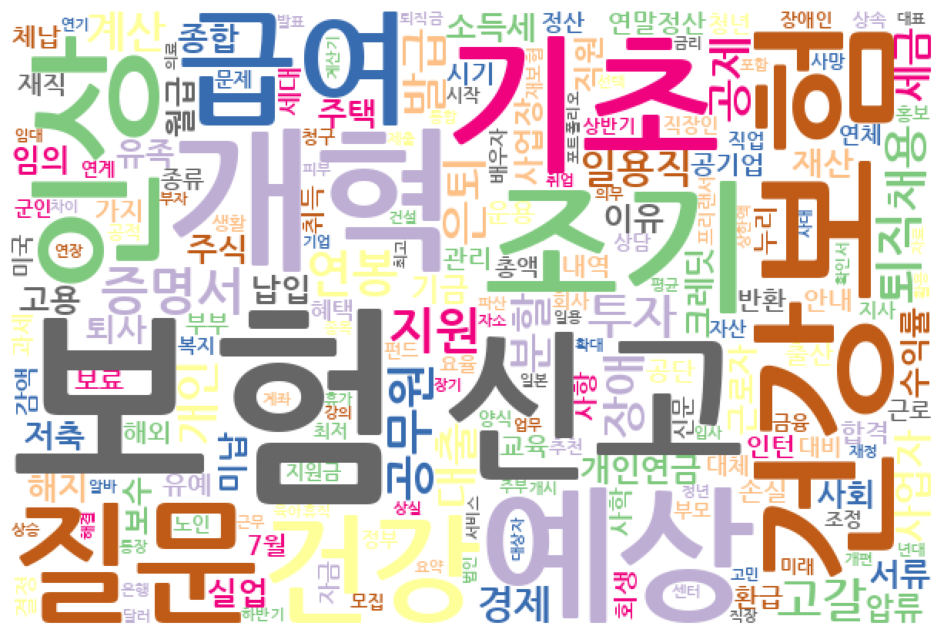

In [ ]:
# 글씨체 위치 지정
file_path='./'
wordcloud = WordCloud(font_path ='../data/NanumGothicBold.ttf', background_color = 'white', colormap = "Accent", width = 600, height = 400).generate_from_frequencies(top)
plt.figure(figsize=(12,8))   # 보여지는 크기 지정
plt.imshow(wordcloud) # 이미지 표시
plt.axis('off') #눈금 제거
plt.show()

### **본문 데이터 마이닝**

In [36]:
import itertools # 문서의 명사 리스트 확보
noun = list(itertools.chain(*data['doc_token_noun'])) # 리스트 접합
noun

['경제',
 '불황',
 '경기',
 '코로나',
 '자영업자',
 '기업',
 '회사',
 '구조조정',
 '최악',
 '상황',
 '실직',
 '위기',
 '가계부채',
 '문제',
 '어려움',
 '국세',
 '체납',
 '건강',
 '미납',
 '연체',
 '압류',
 '문제',
 '고민',
 '도움',
 '대출금',
 '의무',
 '세금',
 '국세',
 '체납',
 '고통',
 '대한민국',
 '세납',
 '의무',
 '언급',
 '경기',
 '가계',
 '경제',
 '비상',
 '세금',
 '건강',
 '미납',
 '병원',
 '연체',
 '압류',
 '압박',
 '문제',
 '세금',
 '거주',
 '상가',
 '오피스텔',
 '소유',
 '재산세',
 '성실',
 '소유',
 '상가',
 '양도소득세',
 '다라',
 '고지',
 '의문',
 '무시',
 '지속',
 '세금',
 '양도소득세',
 '다라',
 '자체',
 '세금',
 '국세',
 '체납',
 '장기',
 '압류',
 '고지',
 '체납',
 '국세',
 '장기',
 '국내',
 '행동',
 '세금',
 '지식',
 '납세',
 '의무',
 '이유',
 '외면',
 '국세',
 '체납',
 '처음',
 '가산세',
 '벌금',
 '거부',
 '국세청',
 '국세',
 '회수',
 '해당',
 '자산',
 '압류',
 '조치',
 '상황',
 '운영',
 '사업체',
 '코로나',
 '타격',
 '폐업',
 '위기',
 '대출',
 '그 후',
 '대출금',
 '이자',
 '대부',
 '업체',
 '상품',
 '악순환',
 '장기',
 '국세청',
 '통장',
 '압류',
 '은행',
 '대출금',
 '대금',
 '상대',
 '국세',
 '미납',
 '판단',
 '유일한',
 '공간',
 '압류',
 '다다',
 '토로',
 '개인',
 '회생',
 '관심',
 '폐업',
 '위기',
 '운영',
 '사업체',
 '상황',
 '개인',
 '회생',
 '채무',
 '탕감',
 '재

In [37]:
top = dict(count.most_common(500)) # 상위 500개 출력
top

{'보험': 2778,
 '신고': 1486,
 '개혁': 1407,
 '건강보험': 1356,
 '기초': 1272,
 '예상': 1249,
 '조기': 1194,
 '인상': 1089,
 '질문': 1054,
 '급여': 1045,
 '건강': 953,
 '증명서': 934,
 '퇴직': 889,
 '연봉': 884,
 '지원': 882,
 '공무원': 874,
 '투자': 816,
 '고갈': 805,
 '발급': 790,
 '은퇴': 789,
 '채용': 759,
 '장애': 745,
 '공제': 736,
 '개인': 727,
 '대출': 705,
 '계산': 667,
 '분할': 661,
 '일용직': 614,
 '경제': 594,
 '사업자': 580,
 '세금': 569,
 '개인연금': 546,
 '미납': 542,
 '재산': 531,
 '소득세': 514,
 '고용': 513,
 '납입': 511,
 '서류': 506,
 '저축': 499,
 '수익률': 493,
 '월급': 491,
 '퇴사': 488,
 '종합': 483,
 '주식': 476,
 '실업': 468,
 '해지': 459,
 '이유': 447,
 '근로자': 444,
 '크레딧': 438,
 '임의': 413,
 '사회': 412,
 '유족': 408,
 '기금': 400,
 '압류': 381,
 '사업장': 373,
 '주택': 371,
 '직원': 367,
 '보수': 356,
 '연말정산': 342,
 '안내': 342,
 '7월': 340,
 '공기업': 331,
 '교육': 323,
 '체납': 319,
 '공단': 318,
 '인턴': 316,
 '합격': 314,
 '해외': 312,
 '가지': 303,
 '운용': 303,
 '관리': 300,
 '유예': 294,
 '재직': 285,
 '내역': 283,
 '환급': 279,
 '보료': 276,
 '손실': 275,
 '시기': 268,
 '감액': 264,
 '사학': 264,
 '반환': 262,
 '

In [ ]:
# csv 파일로 저장
import csv

with open("../data/analysis_data/cafeblog/본문 top500.csv", 'w', newline = '') as file:
    writer = csv.writer(file)
    for k, v in top.items():
        writer.writerow([k, v])

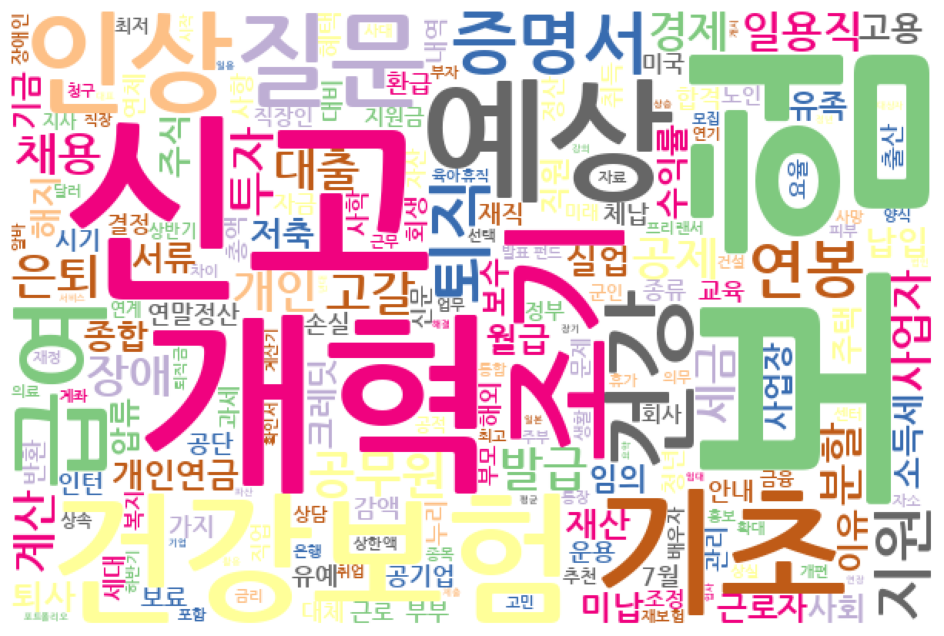

In [ ]:
# 글씨체 위치 지정
file_path='./'
wordcloud = WordCloud(font_path ='../data/NanumGothicBold.ttf', background_color = 'white', colormap = "Accent", width = 600, height = 400).generate_from_frequencies(top)
plt.figure(figsize=(12,8))   # 보여지는 크기 지정
plt.imshow(wordcloud) # 이미지 표시
plt.axis('off') #눈금 제거
plt.show()

### 댓글 데이터 마이닝

In [40]:
import itertools # 문서의 명사 리스트 확보
noun = list(itertools.chain(*data['comment_token_noun'])) # 리스트 접합
noun

['전환',
 '상당',
 '단디',
 '와이프',
 '명의',
 '사업자',
 '비용',
 '초기',
 '연기',
 '라고',
 '사업자',
 '스텔라',
 '실제',
 '상황',
 '고려',
 '분석',
 '소개',
 '정성',
 '스팅',
 '소통',
 '사업자',
 '결정',
 '고민',
 '균형',
 '온라인',
 '투자',
 '계발',
 '추구',
 '발전',
 '도움',
 '이웃',
 '공부',
 '엄마',
 '스텔라',
 '사업자',
 '피부',
 '박탈',
 '등의',
 '부분',
 '부분',
 '개인',
 '사업자',
 '지자',
 '시작',
 '미래',
 '얘기',
 '친정엄마',
 '사례',
 '체감',
 '퇴사',
 '당시',
 '퇴직금',
 '투자',
 '개인',
 '사업자',
 '실업',
 '급여',
 '충격',
 '보료',
 '충격',
 '경제',
 '공부',
 '시절',
 '부분',
 '엄마',
 '스텔라',
 '스팅',
 '도움',
 '힘찬',
 '하루',
 '사업자',
 '스텔라',
 '사업자',
 '미리',
 '염두',
 '가지',
 '박탈',
 '대박',
 '나시',
 '스텔라',
 '해외',
 '주식',
 '양도',
 '공제',
 '부양가족',
 '탈락',
 '공제',
 '공제',
 '라고',
 '트럭',
 '자영업자',
 '시작',
 '비중',
 '건강보험',
 '책정',
 '재산',
 '상관',
 '에소',
 '유하',
 '월세',
 '전세',
 '보유',
 '상관',
 '건강보험',
 '요건',
 '스팅',
 '본문',
 '보료',
 '산정',
 '재산',
 '삭감',
 '감액',
 '감액',
 '감액',
 '폐지',
 '얘기',
 '결정',
 '악법',
 '폐지',
 '탄핵',
 '원인',
 '수령자',
 '기초',
 '절반',
 '감액',
 '기초',
 '삭감',
 '박근혜',
 '목숨',
 '퇴진',
 '운동',
 '다집',
 '재산',
 '수입',
 '평생',
 '기초',
 '절반',
 '반면',
 '재산',

In [41]:
top = dict(count.most_common(500)) # 상위 500개 출력
top

{'보험': 2778,
 '신고': 1486,
 '개혁': 1407,
 '건강보험': 1356,
 '기초': 1272,
 '예상': 1249,
 '조기': 1194,
 '인상': 1089,
 '질문': 1054,
 '급여': 1045,
 '건강': 953,
 '증명서': 934,
 '퇴직': 889,
 '연봉': 884,
 '지원': 882,
 '공무원': 874,
 '투자': 816,
 '고갈': 805,
 '발급': 790,
 '은퇴': 789,
 '채용': 759,
 '장애': 745,
 '공제': 736,
 '개인': 727,
 '대출': 705,
 '계산': 667,
 '분할': 661,
 '일용직': 614,
 '경제': 594,
 '사업자': 580,
 '세금': 569,
 '개인연금': 546,
 '미납': 542,
 '재산': 531,
 '소득세': 514,
 '고용': 513,
 '납입': 511,
 '서류': 506,
 '저축': 499,
 '수익률': 493,
 '월급': 491,
 '퇴사': 488,
 '종합': 483,
 '주식': 476,
 '실업': 468,
 '해지': 459,
 '이유': 447,
 '근로자': 444,
 '크레딧': 438,
 '임의': 413,
 '사회': 412,
 '유족': 408,
 '기금': 400,
 '압류': 381,
 '사업장': 373,
 '주택': 371,
 '직원': 367,
 '보수': 356,
 '연말정산': 342,
 '안내': 342,
 '7월': 340,
 '공기업': 331,
 '교육': 323,
 '체납': 319,
 '공단': 318,
 '인턴': 316,
 '합격': 314,
 '해외': 312,
 '가지': 303,
 '운용': 303,
 '관리': 300,
 '유예': 294,
 '재직': 285,
 '내역': 283,
 '환급': 279,
 '보료': 276,
 '손실': 275,
 '시기': 268,
 '감액': 264,
 '사학': 264,
 '반환': 262,
 '

In [ ]:
# csv 파일로 저장
import csv

with open("../data/analysis_data/cafeblog/댓글 top500.csv", 'w', newline = '') as file:
    writer = csv.writer(file)
    for k, v in top.items():
        writer.writerow([k, v])

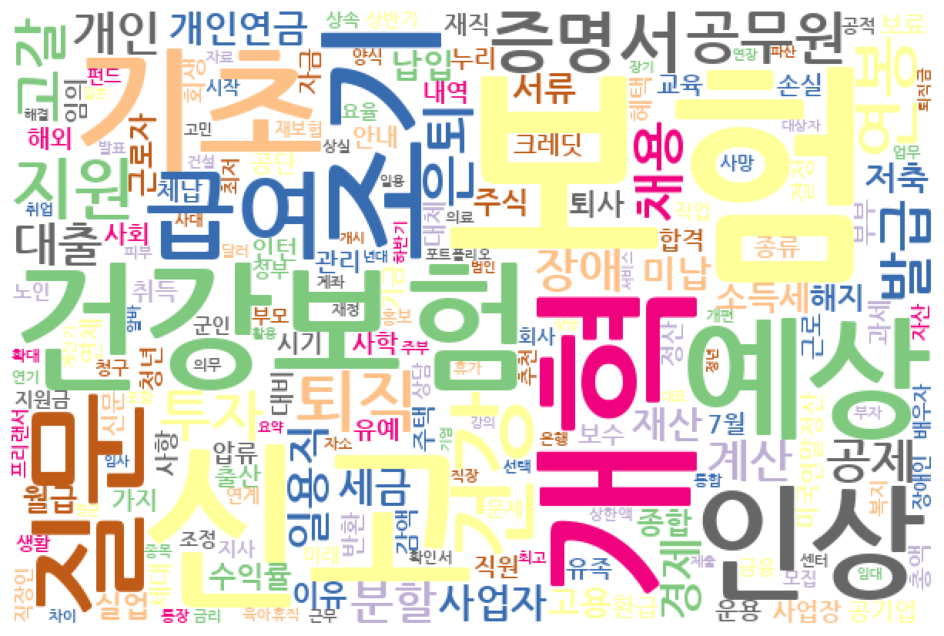

In [ ]:
# 글씨체 위치 지정
file_path='./'
wordcloud = WordCloud(font_path ='../data/NanumGothicBold.ttf', background_color = 'white', colormap = "Accent", width = 600, height = 400).generate_from_frequencies(top)
plt.figure(figsize=(12,8))   # 보여지는 크기 지정
plt.imshow(wordcloud) # 이미지 표시
plt.axis('off') #눈금 제거
plt.show()

### 전체 데이터 마이닝

In [44]:
import itertools # 문서의 명사 리스트 확보
noun = list(itertools.chain(*data['title_token_noun'])) # 리스트 접합
noun += list(itertools.chain(*data['doc_token_noun']))
noun += list(itertools.chain(*data['comment_token_noun']))
noun

['국세',
 '체납',
 '건강',
 '미납',
 '연체',
 '압류',
 '고민',
 '국세',
 '체납',
 '건강',
 '미납',
 '연체',
 '압류',
 '해결',
 '국세',
 '체납',
 '건강',
 '미납',
 '연체',
 '압류',
 '세금',
 '문제',
 '해결',
 '국세',
 '체납',
 '건강',
 '미납',
 '연체',
 '압류',
 '개인',
 '회생',
 '세금',
 '면책',
 '개인',
 '사업자',
 '사업자',
 '건강',
 '주부',
 '프리랜서',
 '변신',
 '감액',
 '해결',
 '재개',
 '정부',
 '지원',
 '연간',
 '시뮬레이션',
 '개인연금',
 '조기',
 '예상',
 '유예',
 '주의',
 '사항',
 '반환',
 '전략',
 '개인연금',
 '활용',
 '유족',
 '가지',
 '예상',
 '계산',
 '국세',
 '체납',
 '건강',
 '미납',
 '연체',
 '압류',
 '세금',
 '연체',
 '해결',
 '예상',
 '주부',
 '조기',
 '장단점',
 '예상',
 '기초',
 '조기',
 '기초',
 '인상',
 '감액',
 '계산',
 '고갈',
 '인공지능',
 '대답',
 '인상률',
 '물가',
 '상승',
 '정정',
 '조기',
 '조기',
 '서류',
 '예상',
 '연기',
 '조기',
 '베이스',
 '투자',
 '수익률',
 '지급액',
 '대체',
 '10년',
 '10억',
 '도전',
 '개인연금',
 '퇴직',
 '부부',
 '유족',
 '실버',
 '대출',
 '금리',
 '조기',
 '감액',
 '이득',
 '예상',
 '재무',
 '설계',
 '단추',
 '예상',
 '예상',
 '정책',
 '방향',
 '2024년',
 '연기',
 '조기',
 '청년',
 '청년',
 '재단',
 '토의',
 '참여',
 '청년',
 '김준호',
 '단계',
 '이유',
 '평균',
 '프리랜서',
 '부담',
 '활용',
 '지원',
 '지급액',
 '소개'

In [45]:
from collections import Counter
count = Counter(noun) # 각 문자가 몇 번 나타나는지 알려주는 객체 반환

In [46]:
top = dict(count.most_common(500)) # 상위 100개 출력
top

{'보험': 47618,
 '투자': 35165,
 '신고': 33905,
 '급여': 32641,
 '지원': 29636,
 '개인': 28327,
 '퇴직': 26663,
 '공제': 26507,
 '개혁': 24707,
 '기초': 24481,
 '공무원': 23611,
 '연봉': 23567,
 '예상': 22399,
 '계산': 22052,
 '해당': 21539,
 '세금': 21454,
 '근로자': 20741,
 '대출': 20310,
 '회사': 20238,
 '증명서': 20025,
 '문제': 19700,
 '재산': 19697,
 '건강': 19477,
 '조기': 19397,
 '상황': 19369,
 '은퇴': 19271,
 '기금': 18744,
 '건강보험': 18641,
 '납입': 18510,
 '인상': 18303,
 '서류': 17740,
 '발급': 17593,
 '정부': 17493,
 '시작': 17086,
 '공단': 17066,
 '사회': 16866,
 '생활': 16819,
 '부담': 16814,
 '주식': 16800,
 '분할': 16545,
 '사업장': 15890,
 '근로': 15869,
 '상담': 15806,
 '선택': 15719,
 '운용': 15499,
 '경제': 15424,
 '고용': 15380,
 '채용': 14864,
 '저축': 14545,
 '장애': 14522,
 '도움': 14417,
 '금융': 14393,
 '자산': 14256,
 '국가': 14029,
 '부분': 13627,
 '월급': 13391,
 '고갈': 13380,
 '수익률': 13353,
 '공기업': 13261,
 '주택': 13247,
 '유족': 13240,
 '직장': 13110,
 '포함': 12906,
 '평균': 12626,
 '가지': 12617,
 '과세': 12616,
 '결정': 12613,
 '기업': 12599,
 '관리': 12530,
 '대비': 12451,
 '혜택': 12450

In [47]:
# csv 파일로 저장
import csv

with open("전체 데이터 top500.csv", 'w', newline = '') as file:
    writer = csv.writer(file)
    for k, v in top.items():
        writer.writerow([k, v])

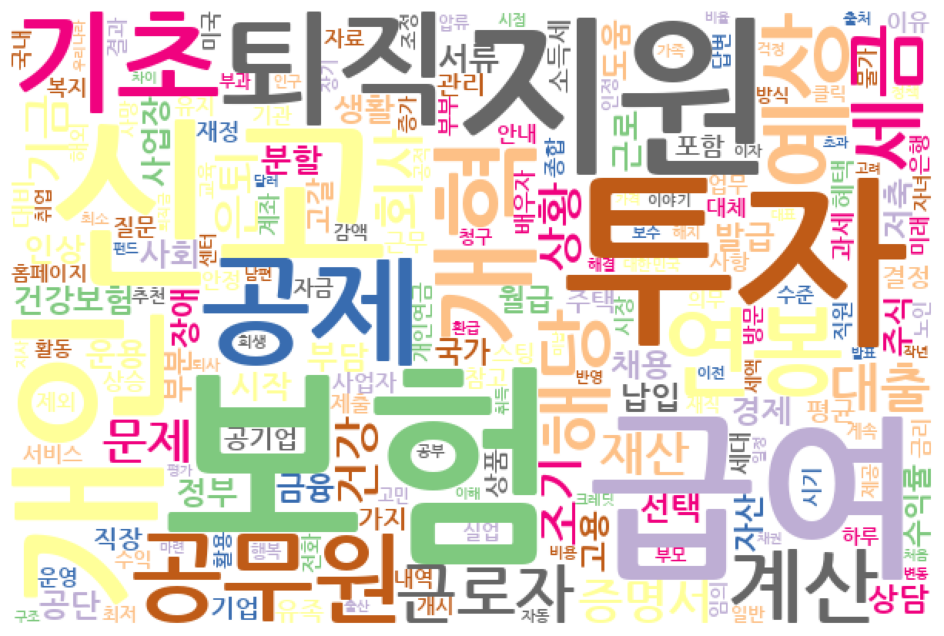

In [ ]:
# 글씨체 위치 지정
file_path='./'
wordcloud = WordCloud(font_path ='../data/NanumGothicBold.ttf', background_color = 'white', colormap = "Accent", width = 600, height = 400).generate_from_frequencies(top)
plt.figure(figsize=(12,8))   # 보여지는 크기 지정
plt.imshow(wordcloud) # 이미지 표시
plt.axis('off') #눈금 제거
plt.show()

## K-Means Clustering

In [ ]:
import itertools # 반복 객체를 유용하게 다루는 라이브러리
import re  # 정규표현식을 사용할 수 있는 라이브러리
from sklearn.feature_extraction.text import TfidfVectorizer  # tf-idf값을 구하기 위해서 사용
from collections import defaultdict # 딕셔너리 기본값을 설정할 수 있는 라이브러리
from collections import Counter   # 단어들을 쉽게 집계하는 라이브러리
from wordcloud import WordCloud # Word Cloud 만들기
import matplotlib
import matplotlib.pyplot as plt   # 시각화하는 라이브러리

from IPython.display import set_matplotlib_formats #matplotlib의 plot 출력 형식 지정 Ex: set_matplotlib_formats('pdf', 'svg'), svg(Scalable Vector Graphics)
from gensim import corpora, models # 토픽 모델링을 위한 라이브러리
set_matplotlib_formats('retina')   # 고해상도 시각화
font_path = '../data/NanumGothicBold.ttf'  # 폰트 경로 지정
from sklearn.cluster import KMeans # KMeans 군집화 알고리즘을 사용하는 라이브러리
from tqdm import tqdm_notebook # progress bar
from tqdm import tqdm # 진행률 피드백 라이브러리
from tqdm import trange, notebook
from matplotlib import rc, font_manager
import seaborn as sns
import pickle
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
from sklearn.cluster import KMeans
# 경고 메시지를 무시하고 숨기거나
warnings.filterwarnings(action='ignore')

/tmp/ipykernel_29225/1114977974.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')   # 고해상도 시각화


In [ ]:
#불용어 처리가 된 데이터 불러오기
df= pd.read_pickle("../data/analysis_data/cafeblog/cafeblog_total_doc.pkl")

### 본문 k-means clustering

In [3]:
df.head(10)

title  \
0                국세체납 건강보험료 미납시 국민연금 연체 압류 때문에 고민한다면   
1                 국세체납 건강보험료 미납시 국민연금 연체 압류 어떻게 해결할까   
2             국세체납 건강보험료 미납 국민연금 연체 압류 등 세금 문제 해결하려면   
3        국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 면책 가능할까   
4       개인사업자 사업자등록 건강보험료 국민연금 납부는 어떻게 주부 프리랜서의 변신 1   
5                     오래 일하면 국민연금 줄어든다고 감액 사유와 해결 방법   
6                        국민연금 납부예외 및 재개 신청하고 정부지원 받기   
7  노후연금 연간 4천만원 수령 시뮬레이션  4 Rule 을 아십니까 feat 국민연금...   
8                      국민연금 조기수령 조건 신청 나이는 예상 수령액 조회   
9                  국민연금 납부예외 유예 조건 및 신청 방법 신청 시 주의사항   

                                                 doc like_cnt  comment_cnt  \
0  해마다 매년 경제가 불황이라는 뉴스가 나오는 것 같다고 했습니다 올해도 어김없이 마...        4         <NA>   
1  경제가 침체되다 보니 생활비 부족뿐만 아니라 국세체납부터 시작해 각종 부분에서 연체...        5         <NA>   
2  우리나라 국민은 납세의 의무를 이행해야 된다고 했습니다 그러나 국세체납 금액이 너무...        8         <NA>   
3  국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 면책 가능할까 경제...        3         <NA>   
4  사업자등록하면어떤 일이 벌어지는지 진짜알고 계신건가요 개인사업자 준비중이신가요안녕하...       71           26   
5  노령연금을 받을 나이에도 회사를 다니고 있거나 사업으로 돈을 벌고 있으면 국민연금이...      125           40   
6  사회보험 중 하나인 국민연금 한 달에 얼마씩 내고 계시나요저는 지역가입자로는 최소금...       13            9   
7  연금저축펀드 IRP 그리고 ISA 까지 절세 및 과세이연 계좌로 대표되는 3총사는 ...       21            2   
8  은퇴를 하게 되면 정기적으로 들어오는 근로소득이 없어지기 때문에 다른 소득을 창출할...       48            5   
9  안녕하세요 은퇴 후 도움되는 진짜 정보를 확인할 수 있는 커뮤니티 은퇴 후 50년입...        7            3   

                                        comment_list img_cnt div_cnt  like  \
0                                               null      12       0  <NA>   
1                                               null      12       0  <NA>   
2                                               null      11       0  <NA>   
3                                               null      14       0  <NA>   
4  비밀 댓글입니다지역가입자 전환되면 납부하는 보험료가 상당하다 하더라구요 ㅠㅠ마음의 ...       7       0  <NA>   
5  정보 잘 보고 갑니다국민연금이 소득이 있으면 삭감 되는것은 몰랐어요네 더행히 소득기...       3       0  <NA>   
6  비밀 댓글입니다저도 지역가입자로 9만원 정도 납부하고 있어요  개인연금 꼭 필요하다...       7       0  <NA>   
7  우토피아님덕분에 좀 정리가 되네요현명한 투자자 읽고 있는데 주식과 채권을 55로 하...       5       0  <NA>   
8  조기 수령을 할수도 있군요 은퇴 후 정보까지  감사합니다어머 달린님잘지내시나용비밀 ...       6       0  <NA>   
9                           비밀 댓글입니다비밀 댓글입니다비밀 댓글입니다      10       0  <NA>   

    img   div                               title_token_list_pos  \
0  <NA>  <NA>  [(국세, NNG), (체납, NNG), (건강, NNP), (보험료, NNP), ...   
1  <NA>  <NA>  [(국세, NNG), (체납, NNG), (건강, NNP), (보험료, NNP), ...   
2  <NA>  <NA>  [(국세, NNG), (체납, NNG), (건강, NNP), (보험료, NNP), ...   
3  <NA>  <NA>  [(국세, NNG), (체납, NNG), (건강, NNP), (보험료, NNP), ...   
4  <NA>  <NA>  [(개인, NNG), (사업자, NNP), (사업자, NNP), (등록, NNP),...   
5  <NA>  <NA>  [(오래, MAG), (일, NNG), (하, XSV), (면, EC), (국민연금...   
6  <NA>  <NA>  [(국민연금, NNP), (납부, NNG), (예외, NNG), (및, MAJ), ...   
7  <NA>  <NA>  [(노후, NNG), (연금, NNP), (연간, NNG), (4, SN), (천만...   
8  <NA>  <NA>  [(국민연금, NNP), (조기, NNG), (수령, NNG), (조건, NNG),...   
9  <NA>  <NA>  [(국민연금, NNP), (납부, NNG), (예외, NNG), (유예, NNP),...   

                           title_token_noun  \
0              [국세, 체납, 건강, 미납, 연체, 압류, 고민]   
1              [국세, 체납, 건강, 미납, 연체, 압류, 해결]   
2      [국세, 체납, 건강, 미납, 연체, 압류, 세금, 문제, 해결]   
3  [국세, 체납, 건강, 미납, 연체, 압류, 개인, 회생, 세금, 면책]   
4          [개인, 사업자, 사업자, 건강, 주부, 프리랜서, 변신]   
5                                  [감액, 해결]   
6                              [재개, 정부, 지원]   
7                         [연간, 시뮬레이션, 개인연금]   
8                                  [조기, 예상]   
9                              [유예, 주의, 사항]   

                                      doc_token_noun  \
0  [경제, 불황, 경기, 코로나, 자영업자, 기업, 회사, 구조조정, 최악, 상황, ...   
1  [경제, 침체, 보니, 생활비, 부족, 국세, 체납, 시작, 부분, 연체, 시작, ...   
2  [우리나라, 납세, 의무, 이행, 국세, 체납, 규모, 의도, 탈세, 생활, 세금,...   
3  [국세, 체납, 건강, 미납, 연체, 압류, 개인, 회생, 세금, 면책, 경제, 상...   
4  [사업자, 진짜, 신건, 개인, 사업자, 비중, 이신, 경제, 공부, 엄마, 스텔라...   
5  [회사, 재직자, 감액, 개시, 정해진, 감액, 도입, 50, 감액, 최장, 5년,...   
6  [사회, 보험, 최소, 은퇴, 대표, 공적, 사회, 직장인, 회사, 절반, 부담, ... 

In [4]:
doc_noun = []
for i in notebook.tqdm(range(0,len(df['doc_token_noun']))):
    # data['doc_token_noun'][i]에서 추출한 명사를 하나의 문자열로 연결 후 doc_noun 리스트에 추가
    doc_noun.append(' '.join(df['doc_token_noun'][i]))  # 각 문서의 명사들을 str으로 연결     
    #['문서1 명사', '문서2 명사', '...']

  0%|          | 0/43626 [00:00<?, ?it/s]

In [5]:
# 텍스트 문서 모음을 단어 tf-idf 행렬로 변환 
vec = TfidfVectorizer(min_df = 0.01, max_df=0.95) # 문서의 1%~95%로 나타나는 단어만 고려.  #min_df: 특정 단어가 나타나는 '문서의 수의 최소 빈도값을 설정/소수형태면 %로 설정
X = vec.fit_transform(doc_noun) # 설정한 Vectorizer로 벡터화

In [6]:
print(vec.get_feature_names_out()) # tf-idf 행렬 추출

['10' '100' '10년' ... '휴직' '흐름' '희망']


In [7]:
print(X)  # (문서인덱스, 등장단어인덱스) tf-idf값

  (0, 409)	0.03566542788078318
  (0, 1140)	0.026388792867291004
  (0, 1310)	0.031050620243222013
  (0, 510)	0.08950533162080526
  (0, 423)	0.03829486262452891
  (0, 93)	0.027363554511058482
  (0, 638)	0.044629680265989013
  (0, 547)	0.08173631475270789
  (0, 237)	0.037243440877695
  (0, 825)	0.041850106929305755
  (0, 1006)	0.03297910875176596
  (0, 1322)	0.040404411447441425
  (0, 174)	0.025226789456046082
  (0, 1251)	0.04339073858158696
  (0, 804)	0.038312616265281804
  (0, 319)	0.039041205378458274
  (0, 670)	0.04442449999193427
  (0, 1043)	0.05896544319794802
  (0, 405)	0.02988625881741349
  (0, 407)	0.04873122959979574
  (0, 992)	0.03770070918813372
  (0, 289)	0.07262909070543898
  (0, 1269)	0.024880350968038888
  (0, 535)	0.05905185435200562
  (0, 774)	0.03501645506326281
  :	:
  (43624, 1068)	0.13463609306347707
  (43624, 654)	0.05437038372249808
  (43624, 438)	0.0744144419172382
  (43624, 93)	0.1912888985479341
  (43624, 174)	0.11756768824258589
  (43624, 867)	0.059938685999520

### KMeans(algorithm=full :개별관측치와 중심간의 거리 계산 , elkan :중심간의 거리를 더 효율적으로 계산) 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


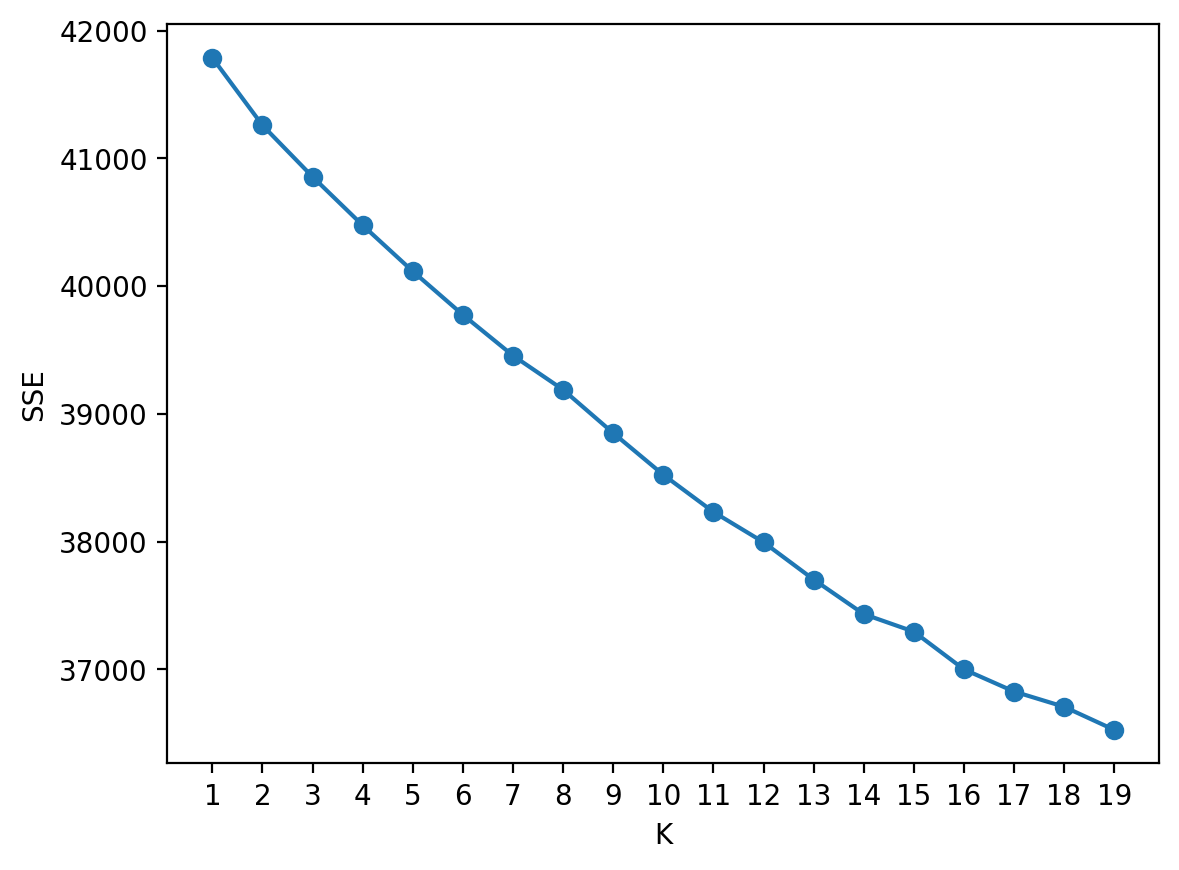

In [8]:
# 군집수가 1~9개일때로 elbow 그래프 시각화
def elbow(X):
    sse = []  # sse 값을 저장할 리스트

    for i in range(1,20):  
        km = KMeans(n_clusters=i, algorithm='auto', random_state=5)  #k-means algorithm: auto(기본값) )
        km.fit(X) # k-means 군집화 수행
        sse.append(km.inertia_)  # sse 값을 리스트에 추가
        print(i) # 현재 i 출력(진행 상황 확인용)

    # Elbow 그래프 시각화    
    plt.plot(range(1,20), sse, marker='o')
    plt.xlabel('K') # K 값 (클러스터 수)
    plt.ylabel('SSE') # see 값
    plt.xticks(range(1,20))
    plt.show()

elbow(X)

## **14로 하는것이 바람직해보임**

In [9]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=14, algorithm='auto', random_state=5) # K-means 모델 생성, 클러스터 수를 4로 설정
model.fit(X)  # K-means 군집화 수행

KMeans(algorithm='auto', n_clusters=14, random_state=5)

In [10]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]   # 군집 중심의 단어들을 내림차순으로 정렬하여 인덱스 반환
terms = vec.get_feature_names_out()  # mac :terms = vec.get_feature_names()
for i in range(14): # 14개의 클러스터에 대해 반복
    print("Cluster %d:" % (i)) # 현재 클러스터 번호 출력
    for ind in order_centroids[i, :500]:   # [행, 열]     # [클러스터 인덱스, 클러스터 내 인덱스] 
        print(' %s' % terms[ind])   # ind: 가져온 단어 인덱스    #terms[ind]: 해당 인덱스를 가진 단어
    print('\n')

Top terms per cluster:
Cluster 0:
 채용
 공기업
 합격
 인턴
 교육
 서류
 전형
 직업
 취업
 취사
 자소
 지원
 스펙
 자격증
 직무
 경험
 무료
 리스트
 전공
 추천
 사무직
 강의
 인기
 마감
 합격자
 수료
 시험
 기업
 기관
 하반기
 토익
 접수
 임박
 최종
 업무
 공공
 사항
 소서
 평가
 공단
 문제
 상반기
 능력
 중인
 근무
 가공
 모음
 교재
 질문
 소개서
 저작권
 기술
 오픈
 침해
 연봉
 인원
 수강
 공사
 공부
 분야
 책임
 경쟁
 모집
 시작
 일정
 항목
 발표
 모임
 입장
 입사
 신입
 정규
 점수
 제공
 직원
 공개
 가스
 학교
 행정
 안전
 관리
 작년
 대비
 우대
 과목
 하루
 국민건강보험공단
 청년
 공무원
 대한민국
 자료
 유형
 가산
 핵심
 과정
 담당자
 제출
 참고
 필수
 통합
 현직
 토스
 발급
 답변
 분석
 역량
 기재
 버전
 도움
 본부
 목표
 경영
 해당
 절차
 토론
 해결
 결과
 복지
 전문
 구체
 가이드
 필독
 검사
 지식
 첨부
 지사
 확보
 발전
 활용
 사회
 금융
 통과
 예시
 인정
 소식
 소개
 심사
 컨설팅
 회사
 수행
 대학교
 고민
 노력
 근로복지공단
 지방
 인사
 취득
 대기업
 참여
 년대
 운영
 상황
 조직
 전원
 전략
 장점
 전기
 내일
 관심
 고용
 이해
 장소
 은행
 처음
 부분
 종류
 일반
 포함
 졸업
 마지막
 영역
 선택
 회계
 맞춤
 활동
 코드
 할인
 안내
 홈페이지
 전국
 도전
 보험
 클릭
 사례
 온라인
 가지
 자유
 실제
 시설
 종합
 부족
 게시판
 8월
 9월
 상담
 구성
 담당
 2022년
 이유
 고객
 증빙
 적성
 체크
 환경
 모의
 센터
 건강보험
 순위
 형태
 기반
 중앙
 최신
 제작
 예상
 증명서
 기금
 이직
 서비스
 단기
 양식
 범위
 개별
 10월
 장애인
 메일
 채팅
 희망
 공통
 기억
 근로
 수준
 

In [11]:
# 클러스터별 상위 100개 단어 리스트 생성
cluster0_list = []
cluster1_list = [] 
cluster2_list = []  
cluster3_list = []  
cluster4_list = []
cluster5_list = []
cluster6_list = []
cluster7_list = []
cluster8_list = []
cluster9_list = []
cluster10_list = []
cluster11_list = []
cluster12_list = []
cluster13_list = []

for i in range(14):  # 6개의 클러스터에 대해 반복
    cluster_terms = [] # 현재 클러스터의 상위 단어들을 저장할 리스트
    for ind in order_centroids[i, :500]:  # 군집 중심의 상위 100개 단어에 대해 반복
        cluster_terms.append(terms[ind])  # 해당 인덱스에 해당하는 단어를 리스트에 추가
    if i == 0:  # 클러스터에 따라서 리스트를 해당하는 변수에 할당
        cluster0_list = cluster_terms
    elif i == 1:
        cluster1_list = cluster_terms
    elif i == 2:
        cluster2_list = cluster_terms
    elif i == 3:
        cluster3_list = cluster_terms
    elif i == 4:
        cluster4_list = cluster_terms
    elif i == 5:
        cluster5_list = cluster_terms
    elif i == 6:
        cluster6_list = cluster_terms
    elif i == 7:
        cluster7_list = cluster_terms
    elif i == 8:
        cluster8_list = cluster_terms
    elif i == 9:
        cluster9_list = cluster_terms
    elif i == 10:
        cluster10_list = cluster_terms
    elif i == 11:
        cluster11_list = cluster_terms
    elif i == 12:
        cluster12_list = cluster_terms
    elif i == 13:
        cluster13_list = cluster_terms

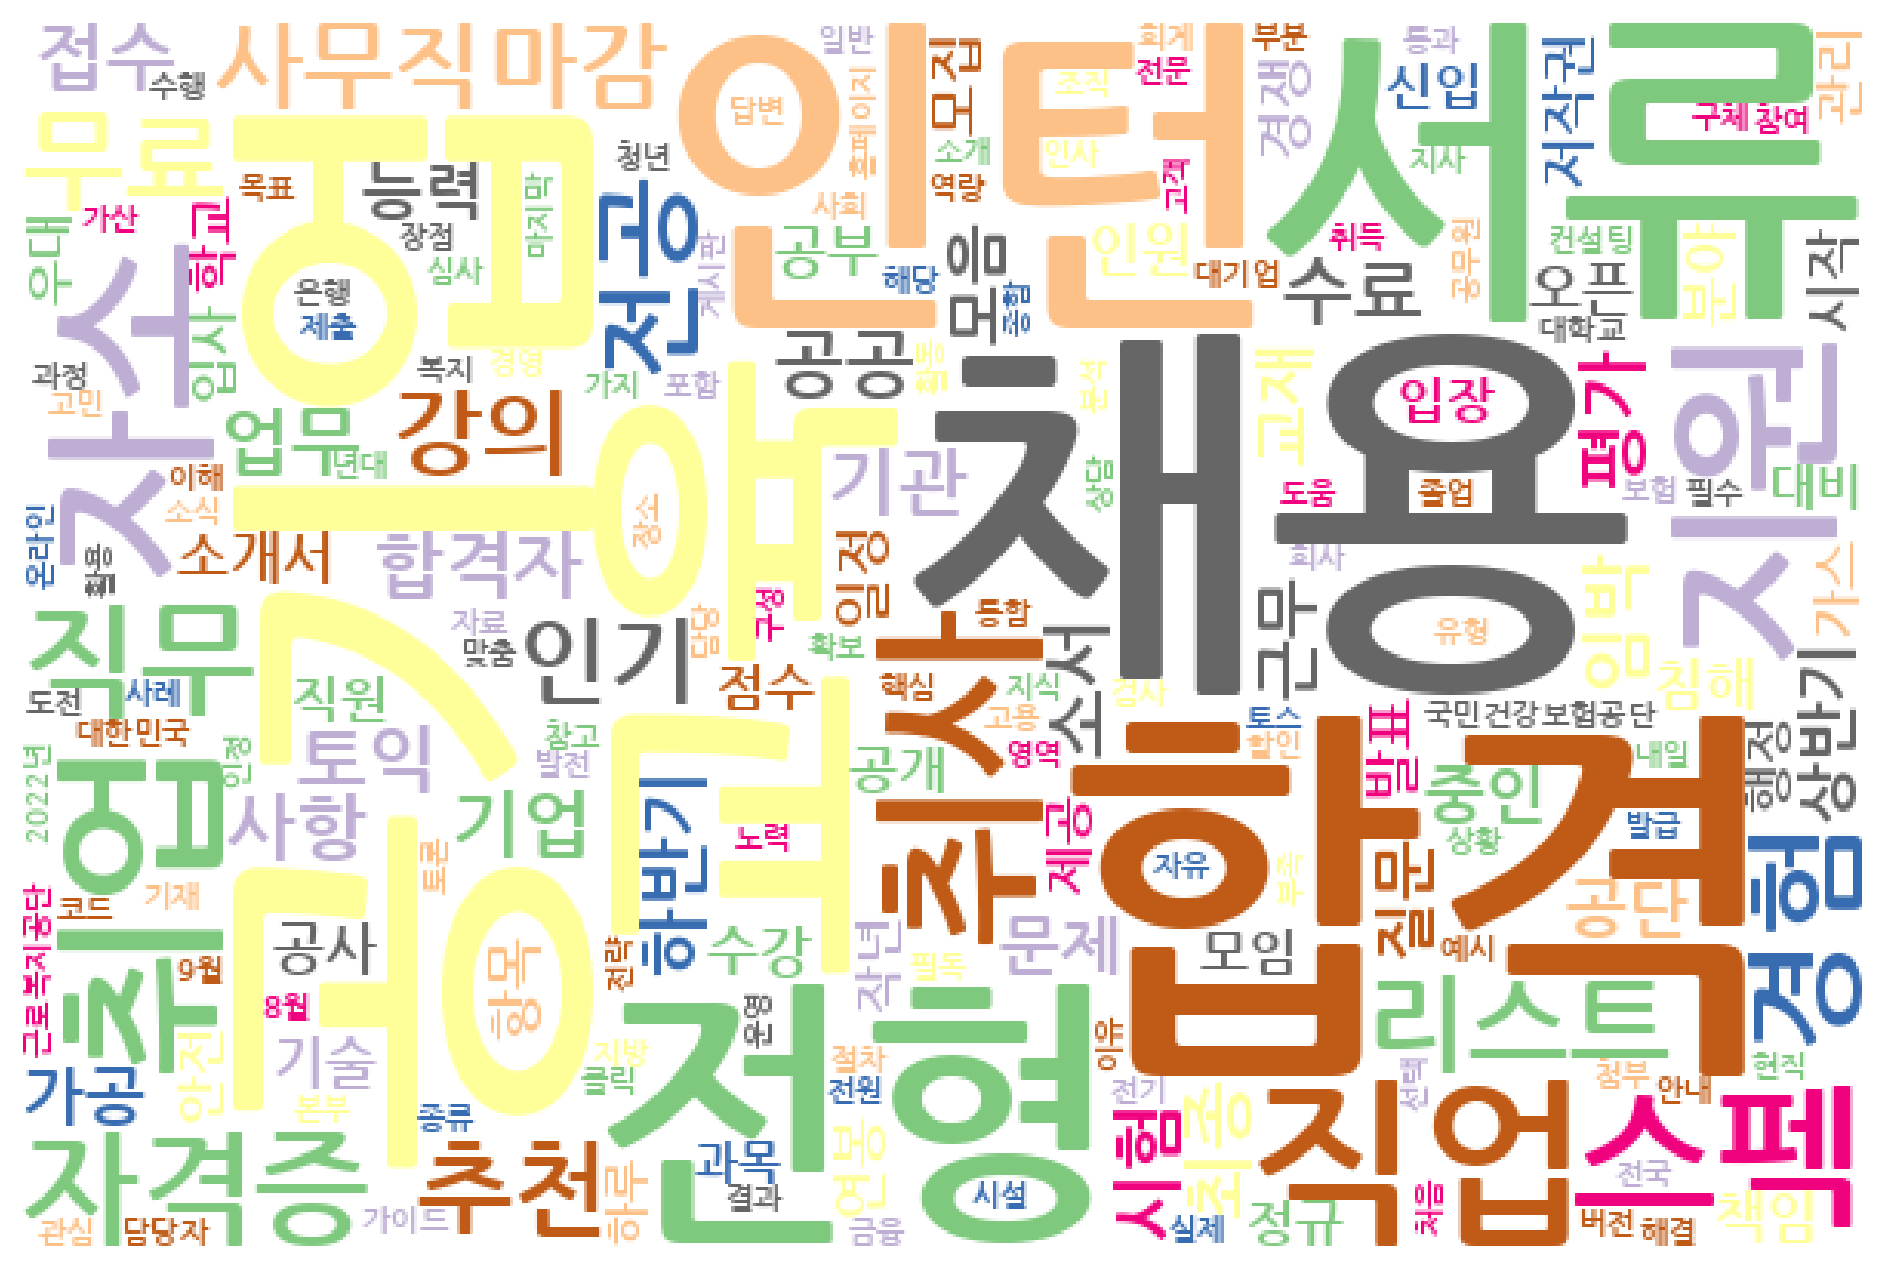

In [ ]:
text = ' '.join(cluster0_list)  

# 텍스트 데이터로 워드 클라우드 생성
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color='white', colormap="Accent", width=600, height=400).generate(text)

# 워드 클라우드 그리기
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

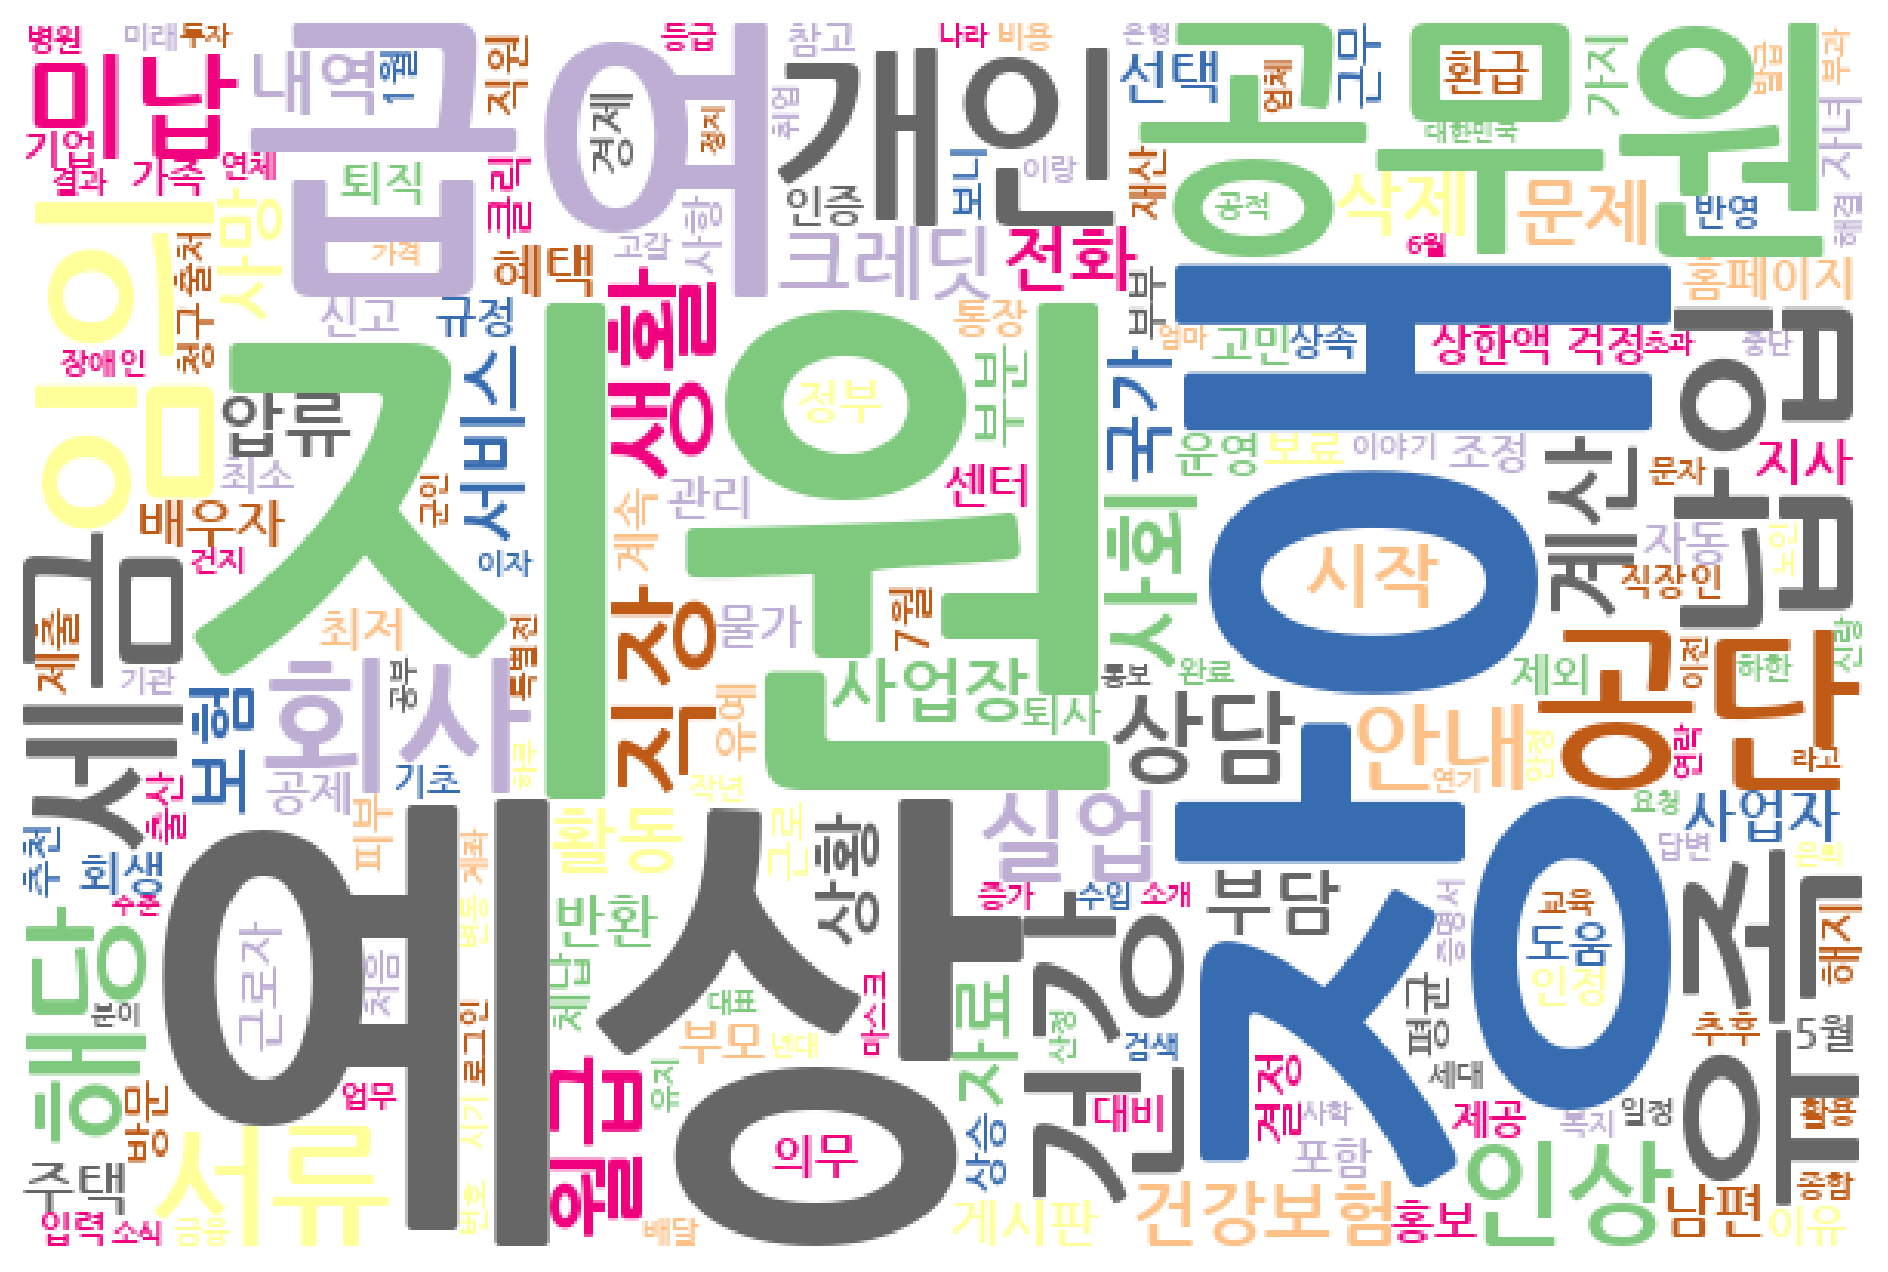

In [ ]:
text = ' '.join(cluster1_list)  

# 텍스트 데이터로 워드 클라우드 생성
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color='white', colormap="Accent", width=600, height=400).generate(text)

# 워드 클라우드 그리기
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

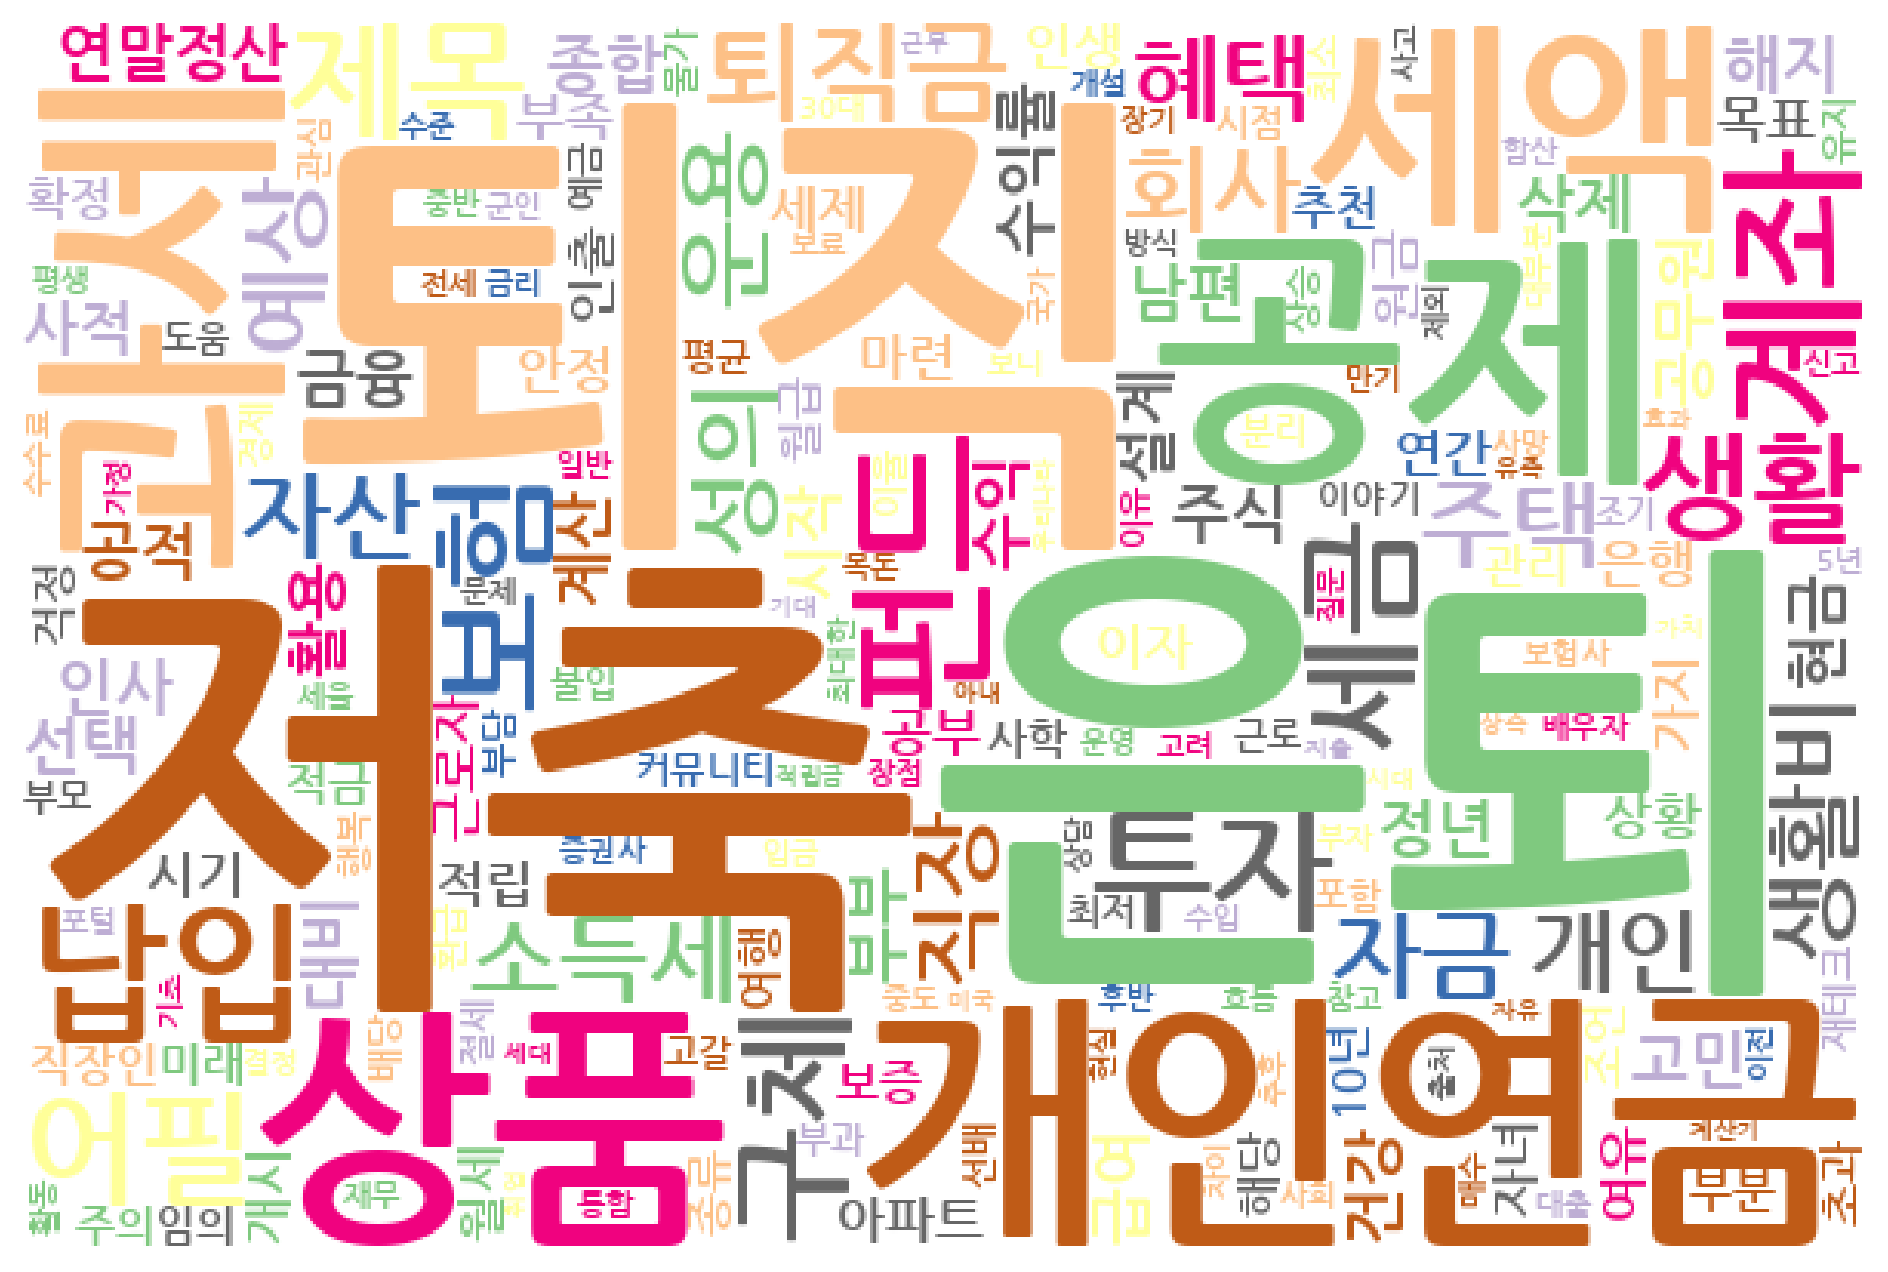

In [ ]:
text = ' '.join(cluster2_list)  

# 텍스트 데이터로 워드 클라우드 생성
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color='white', colormap="Accent", width=600, height=400).generate(text)

# 워드 클라우드 그리기
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

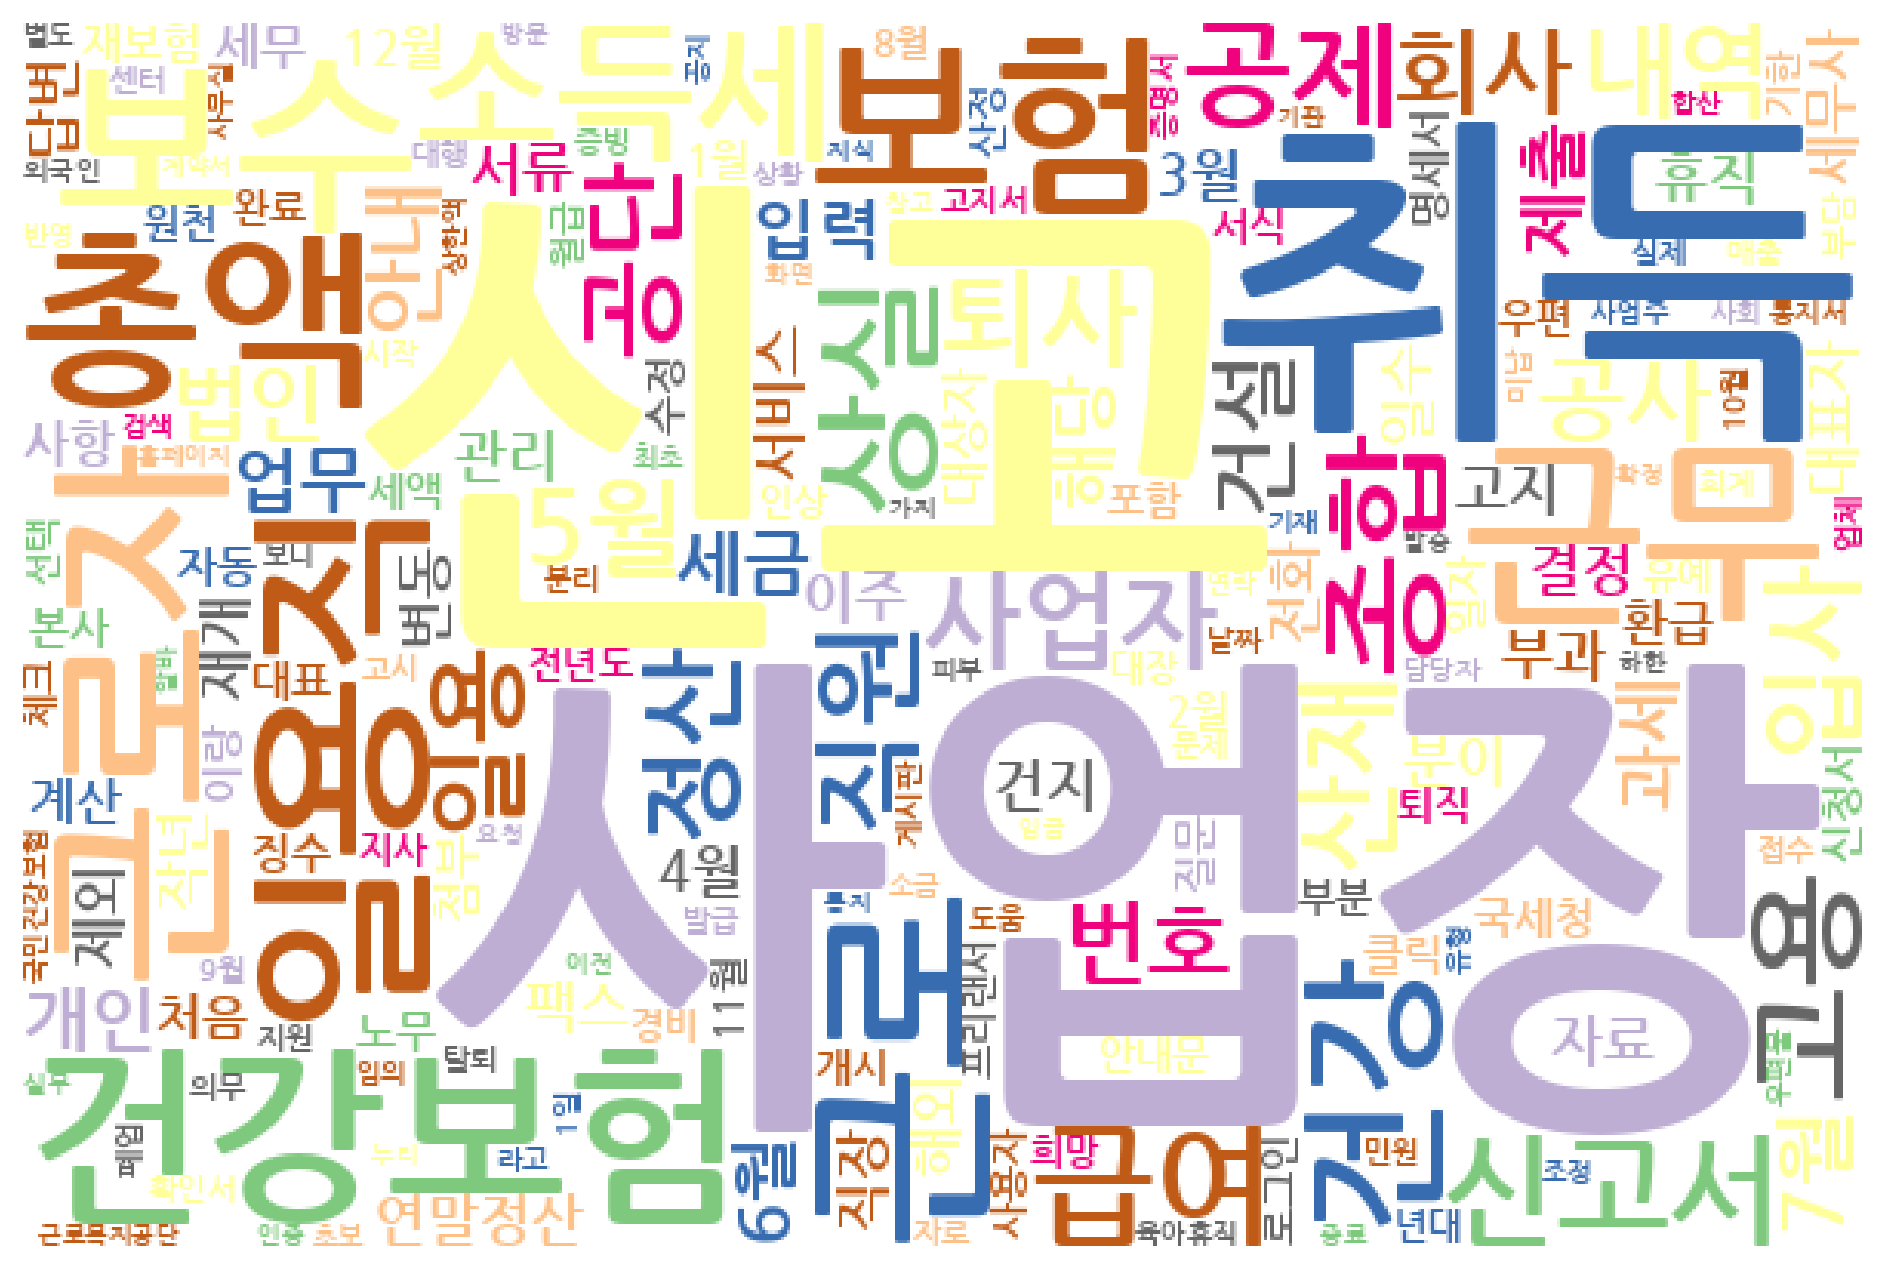

In [ ]:
text = ' '.join(cluster3_list)  

# 텍스트 데이터로 워드 클라우드 생성
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color='white', colormap="Accent", width=600, height=400).generate(text)

# 워드 클라우드 그리기
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

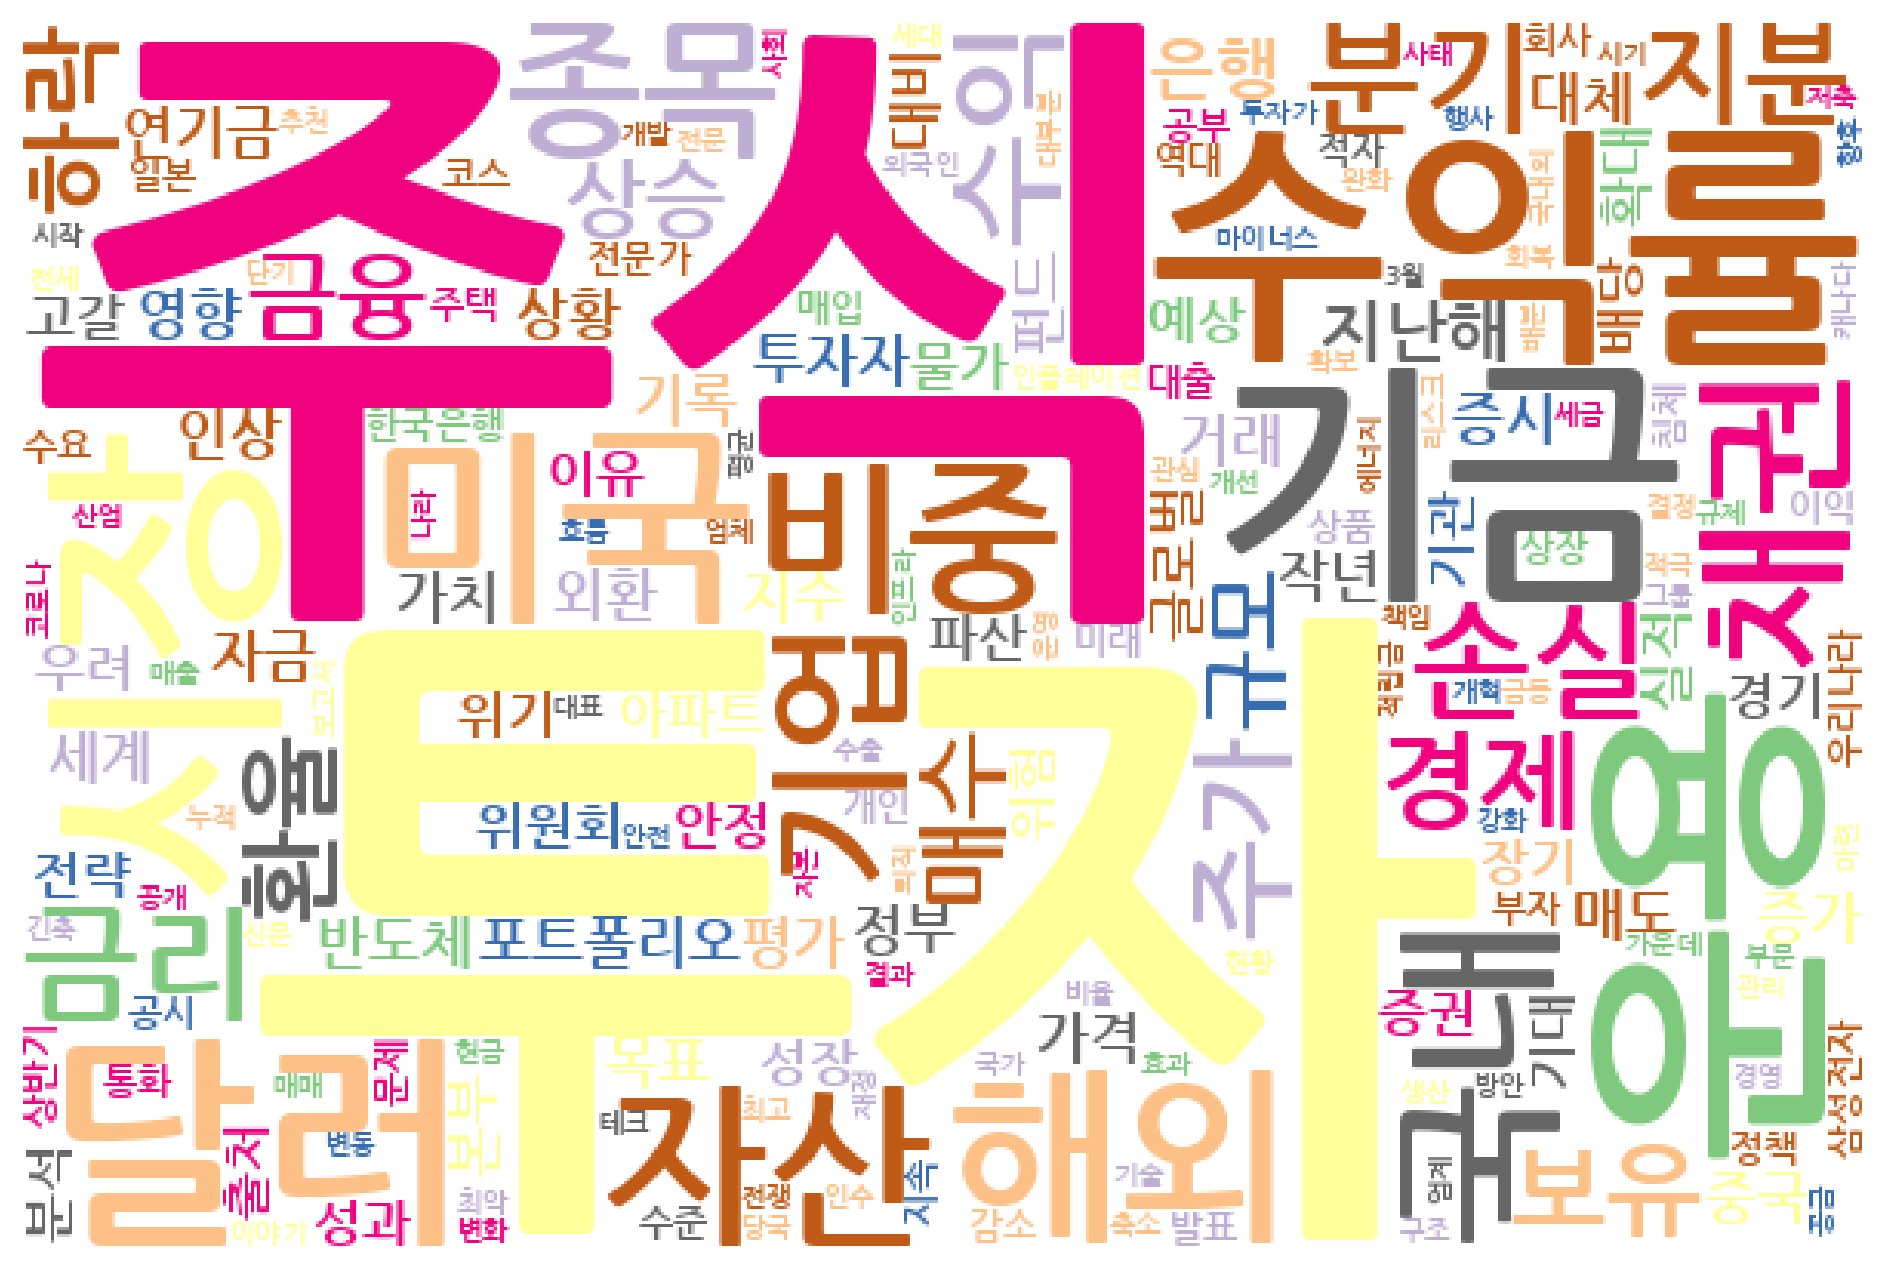

In [ ]:
text = ' '.join(cluster4_list)  

# 텍스트 데이터로 워드 클라우드 생성
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color='white', colormap="Accent", width=600, height=400).generate(text)

# 워드 클라우드 그리기
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

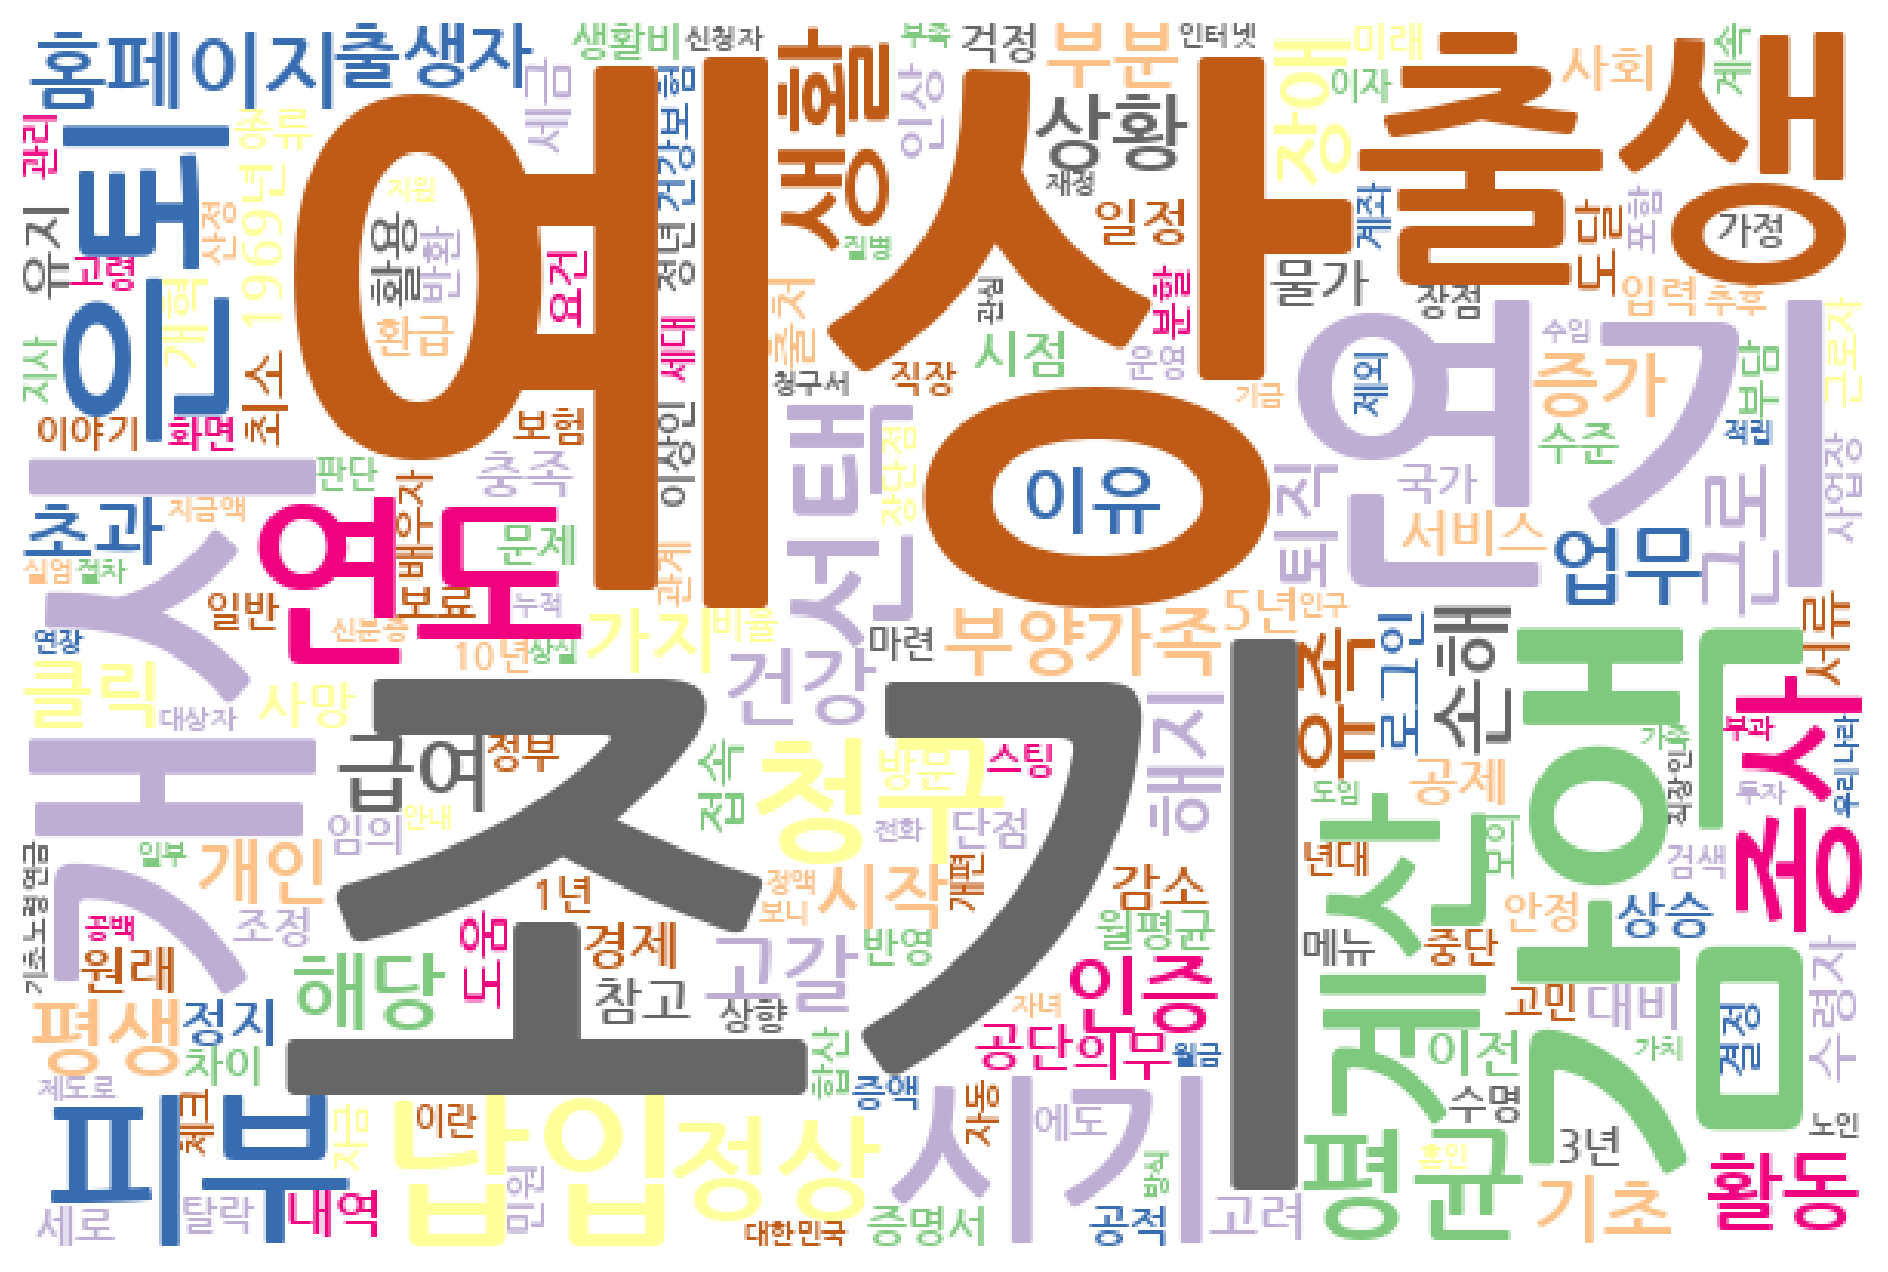

In [ ]:
text = ' '.join(cluster5_list)  

# 텍스트 데이터로 워드 클라우드 생성
wordcloud = WordCloud(font_path = '../dataNanumGothicBold.ttf', background_color='white', colormap="Accent", width=600, height=400).generate(text)

# 워드 클라우드 그리기
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

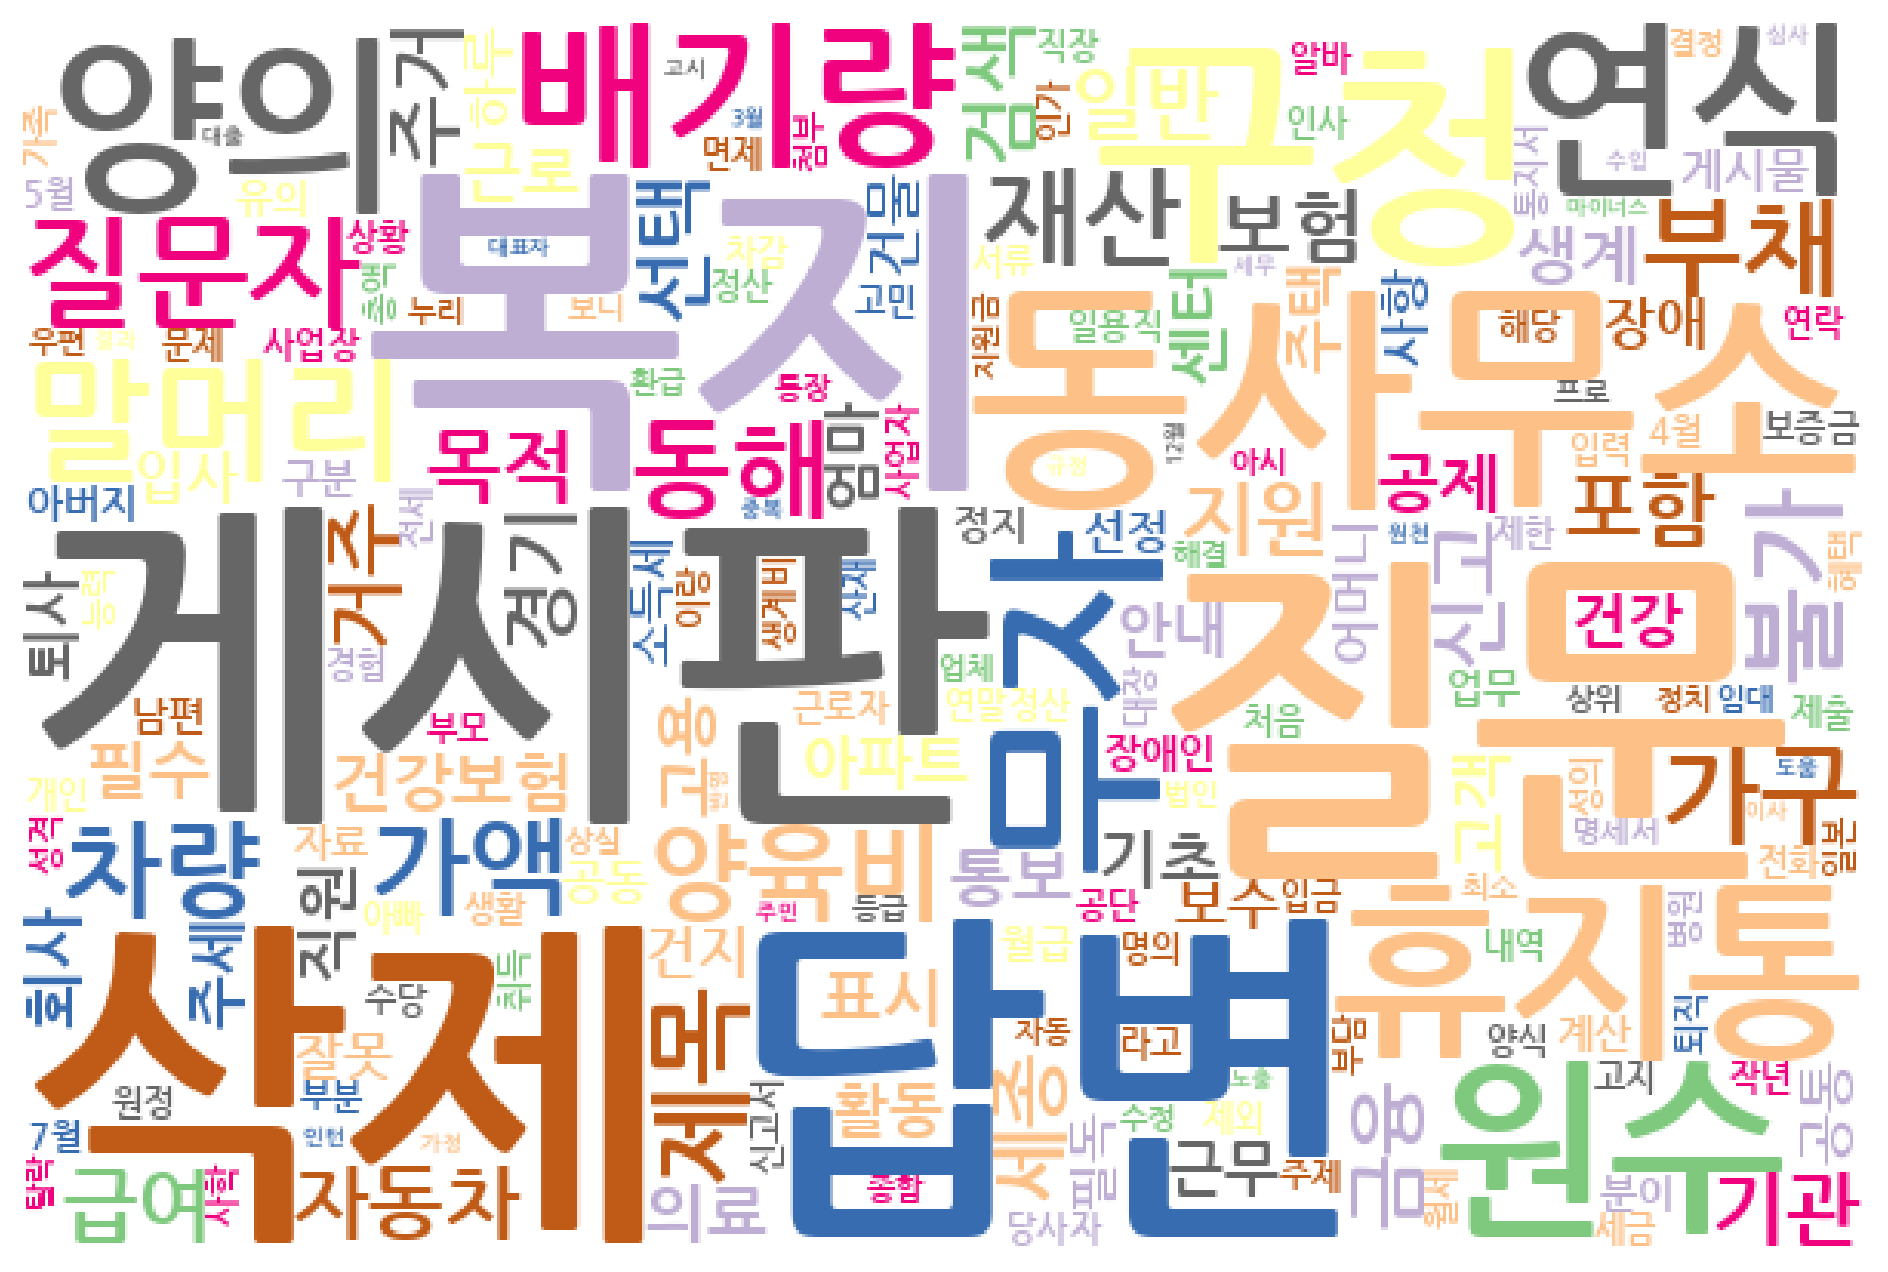

In [ ]:
text = ' '.join(cluster6_list)  

# 텍스트 데이터로 워드 클라우드 생성
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color='white', colormap="Accent", width=600, height=400).generate(text)

# 워드 클라우드 그리기
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

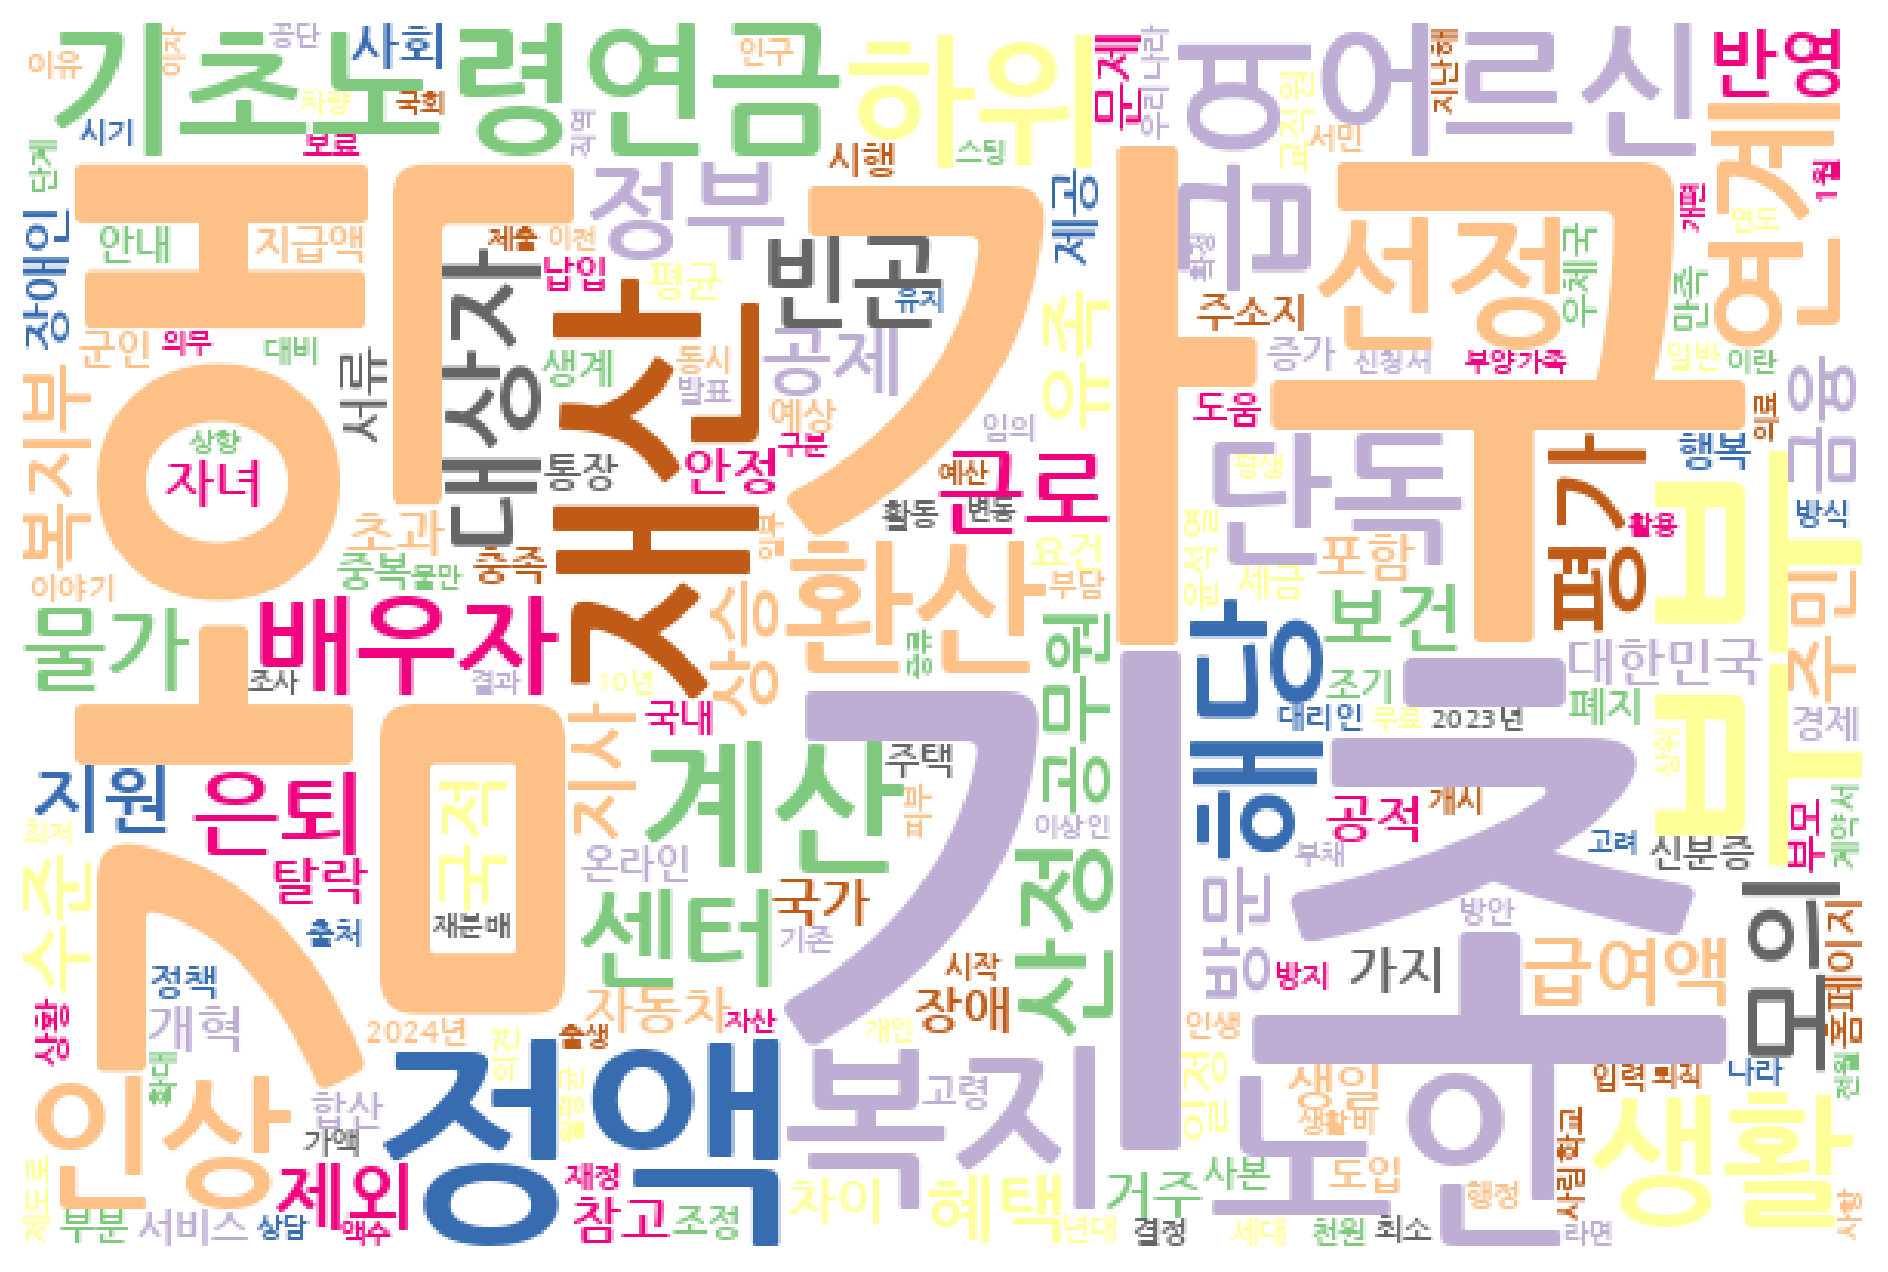

In [ ]:
text = ' '.join(cluster7_list)  

# 텍스트 데이터로 워드 클라우드 생성
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color='white', colormap="Accent", width=600, height=400).generate(text)

# 워드 클라우드 그리기
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

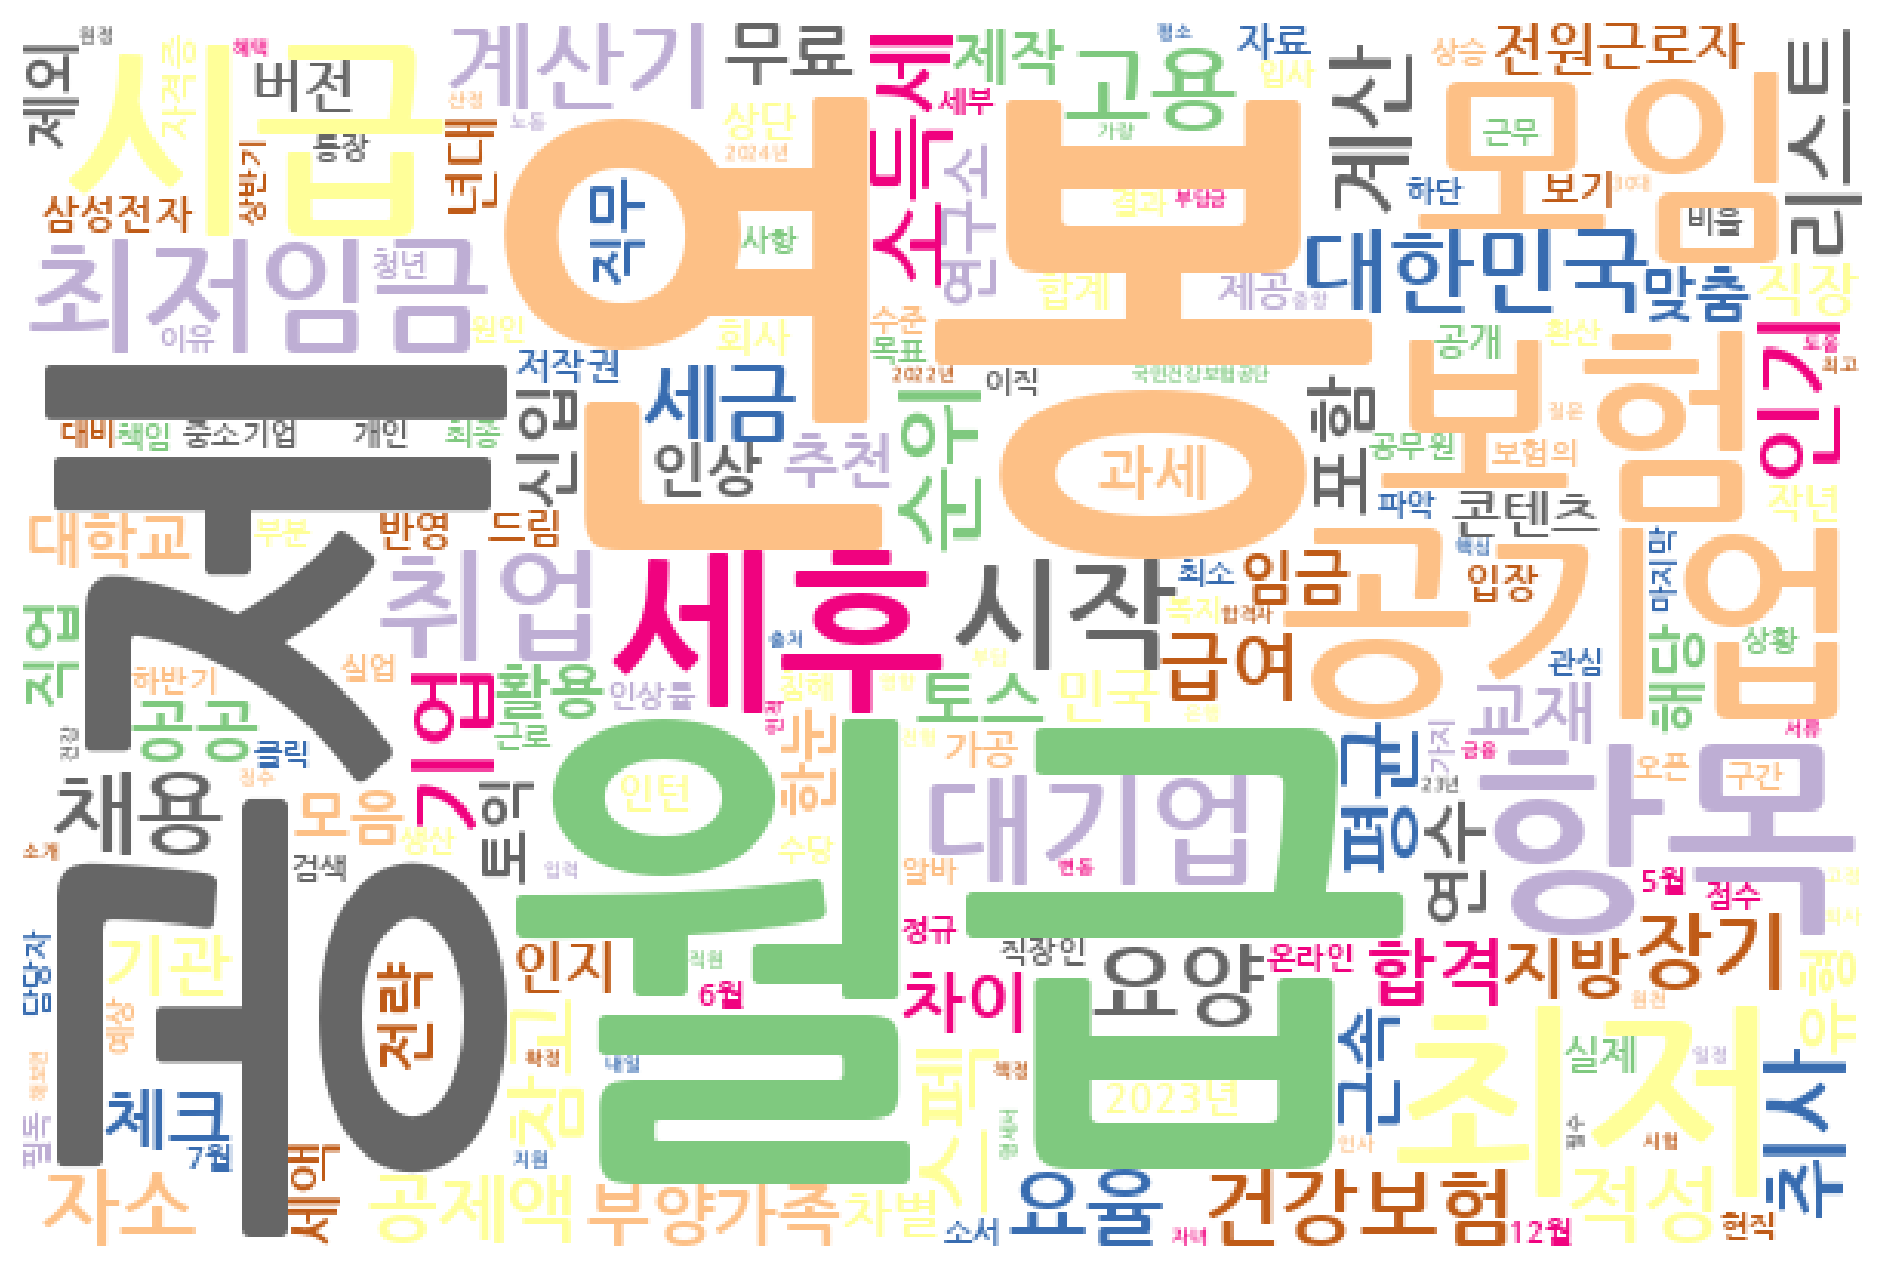

In [ ]:
text = ' '.join(cluster8_list)  

# 텍스트 데이터로 워드 클라우드 생성
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color='white', colormap="Accent", width=600, height=400).generate(text)

# 워드 클라우드 그리기
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

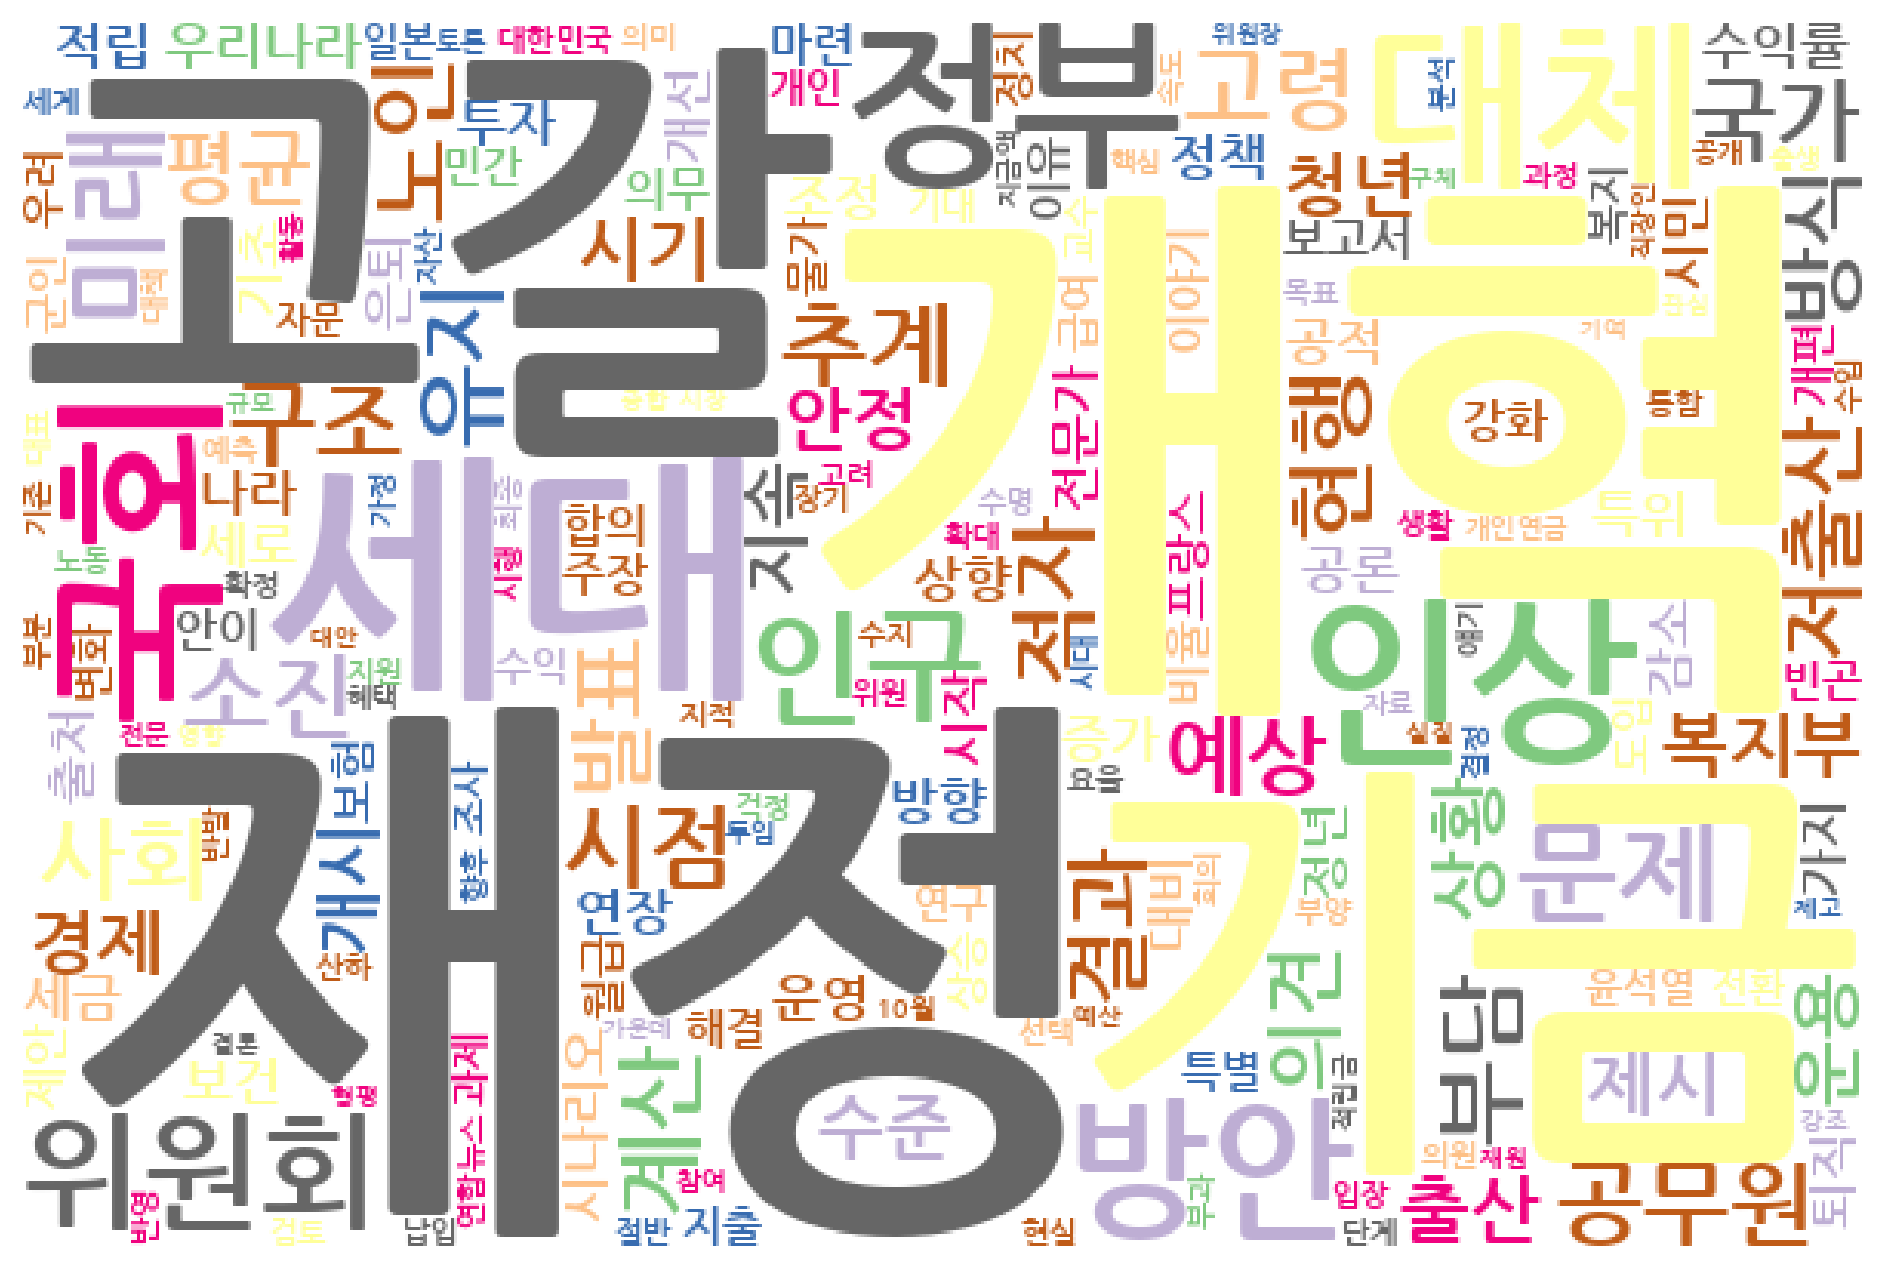

In [ ]:
text = ' '.join(cluster9_list)  

# 텍스트 데이터로 워드 클라우드 생성
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color='white', colormap="Accent", width=600, height=400).generate(text)

# 워드 클라우드 그리기
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

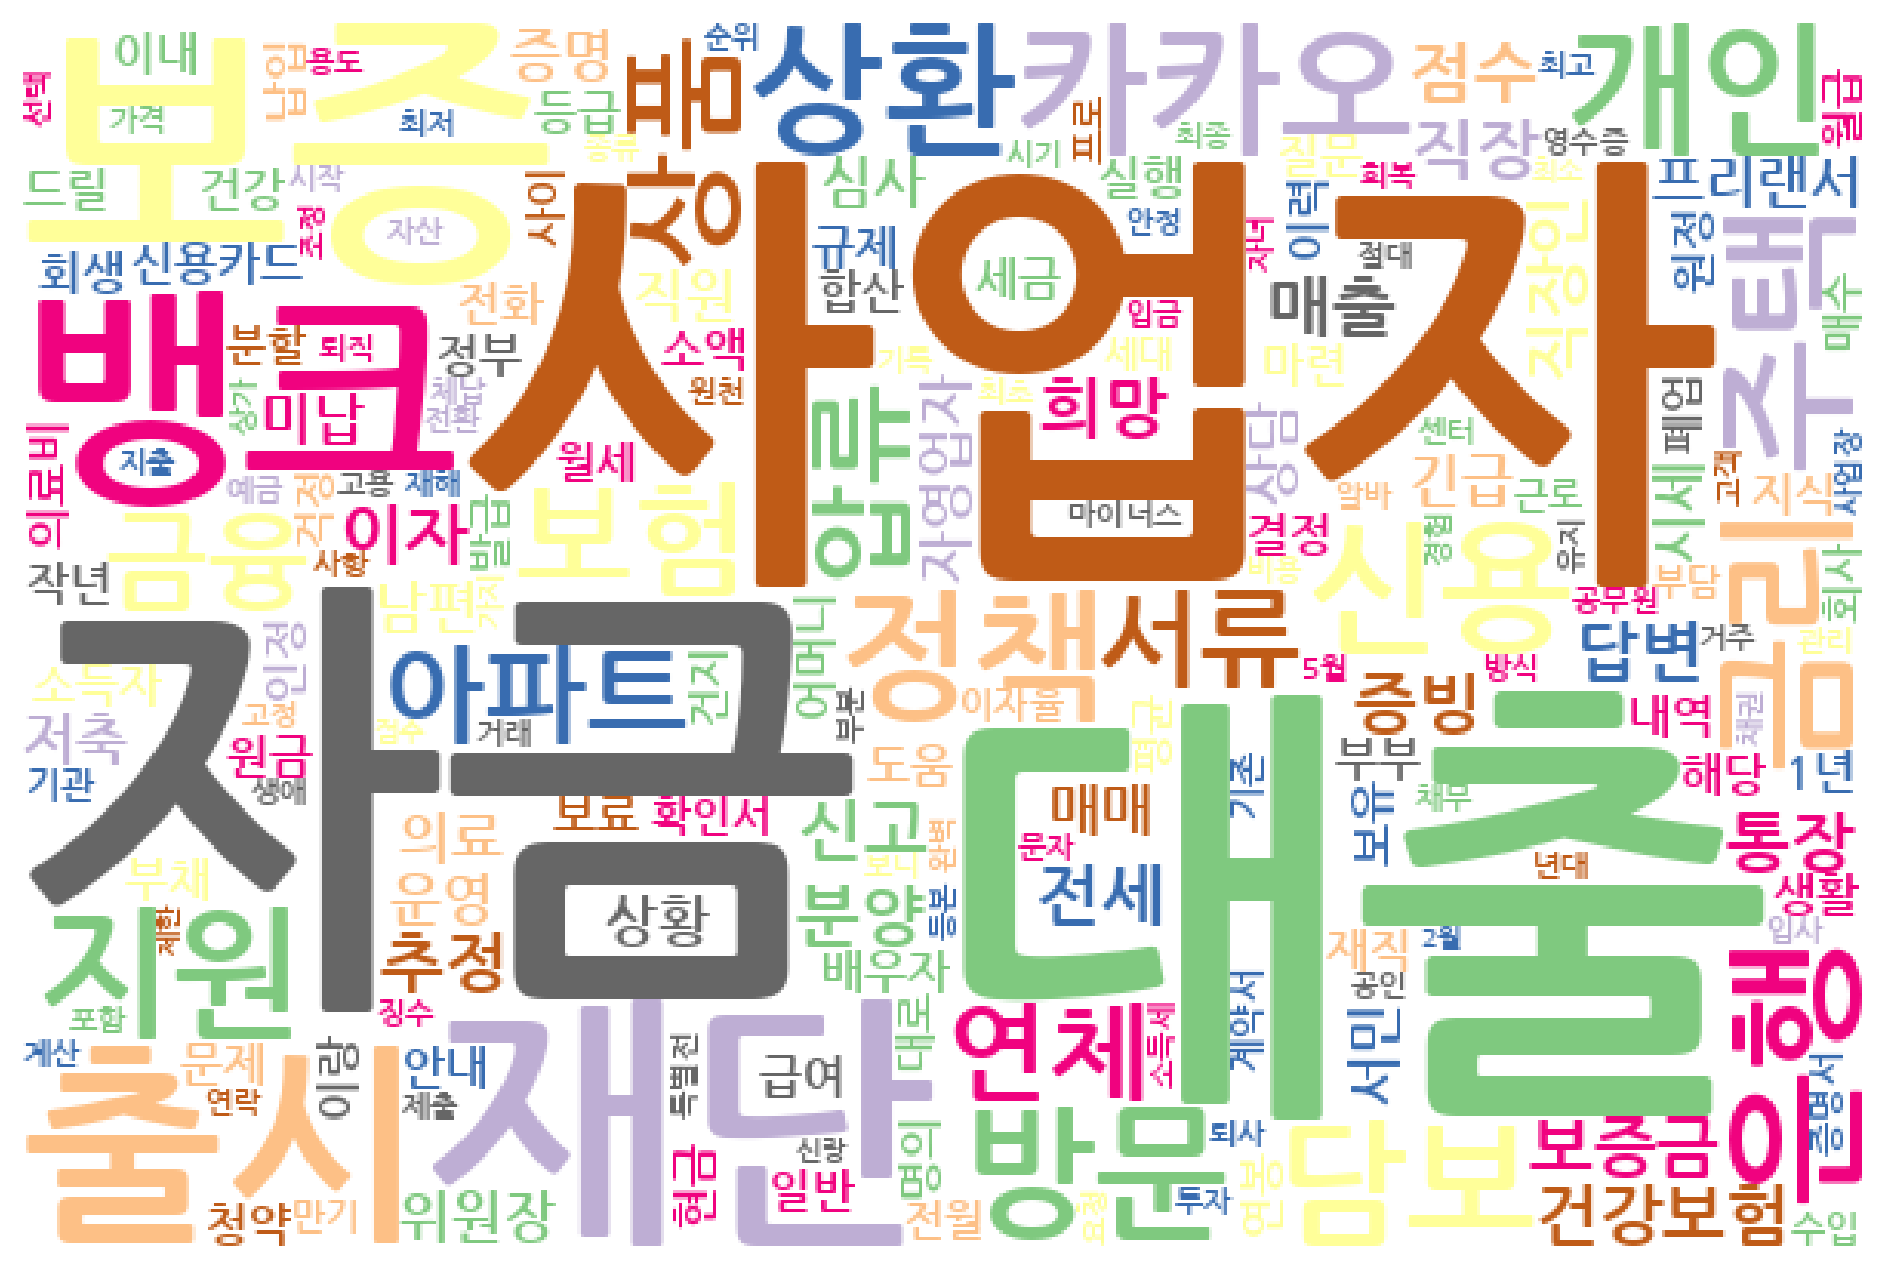

In [ ]:
text = ' '.join(cluster10_list)  

# 텍스트 데이터로 워드 클라우드 생성
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color='white', colormap="Accent", width=600, height=400).generate(text)

# 워드 클라우드 그리기
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

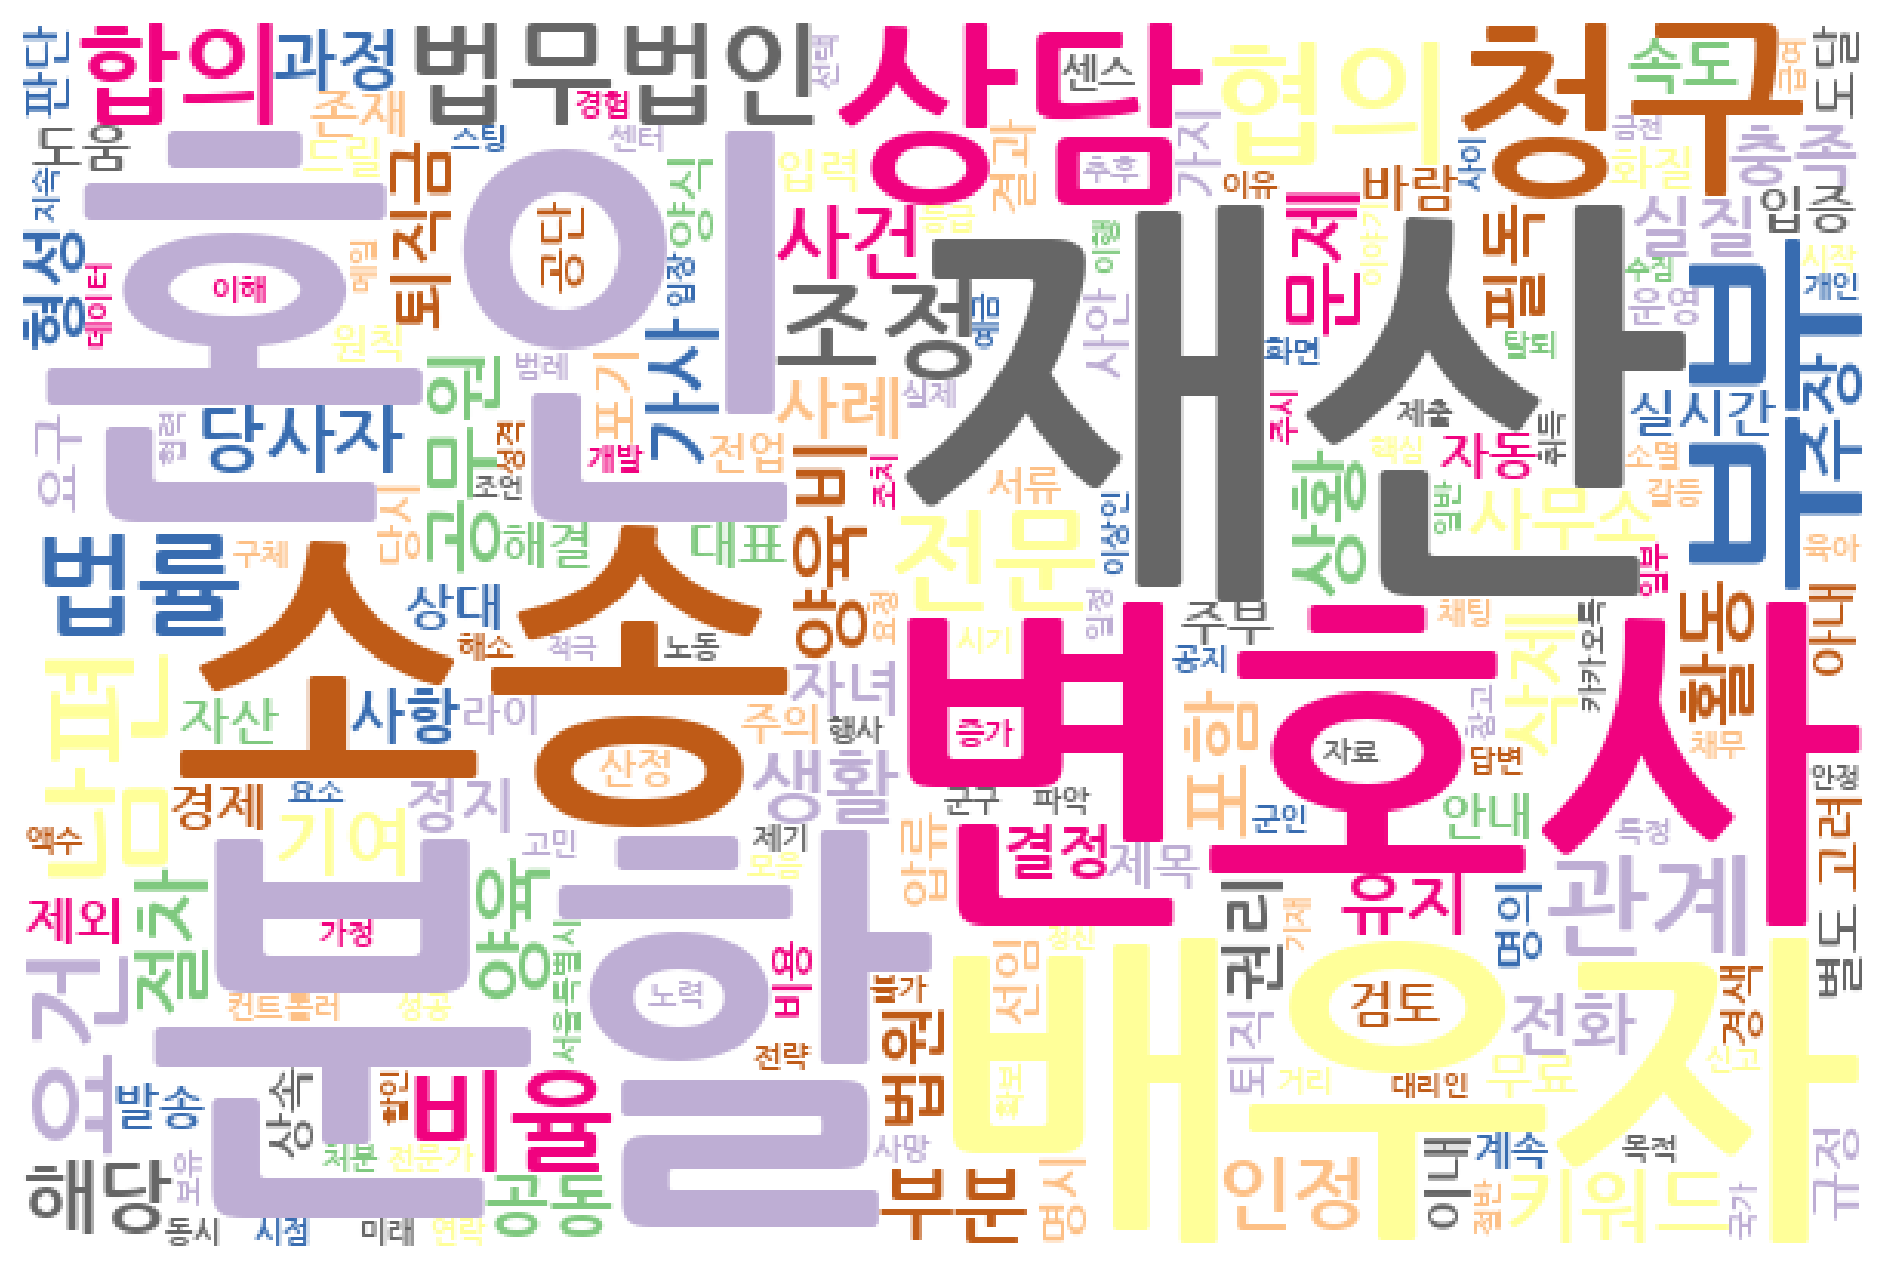

In [ ]:
text = ' '.join(cluster11_list)  

# 텍스트 데이터로 워드 클라우드 생성
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color='white', colormap="Accent", width=600, height=400).generate(text)

# 워드 클라우드 그리기
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

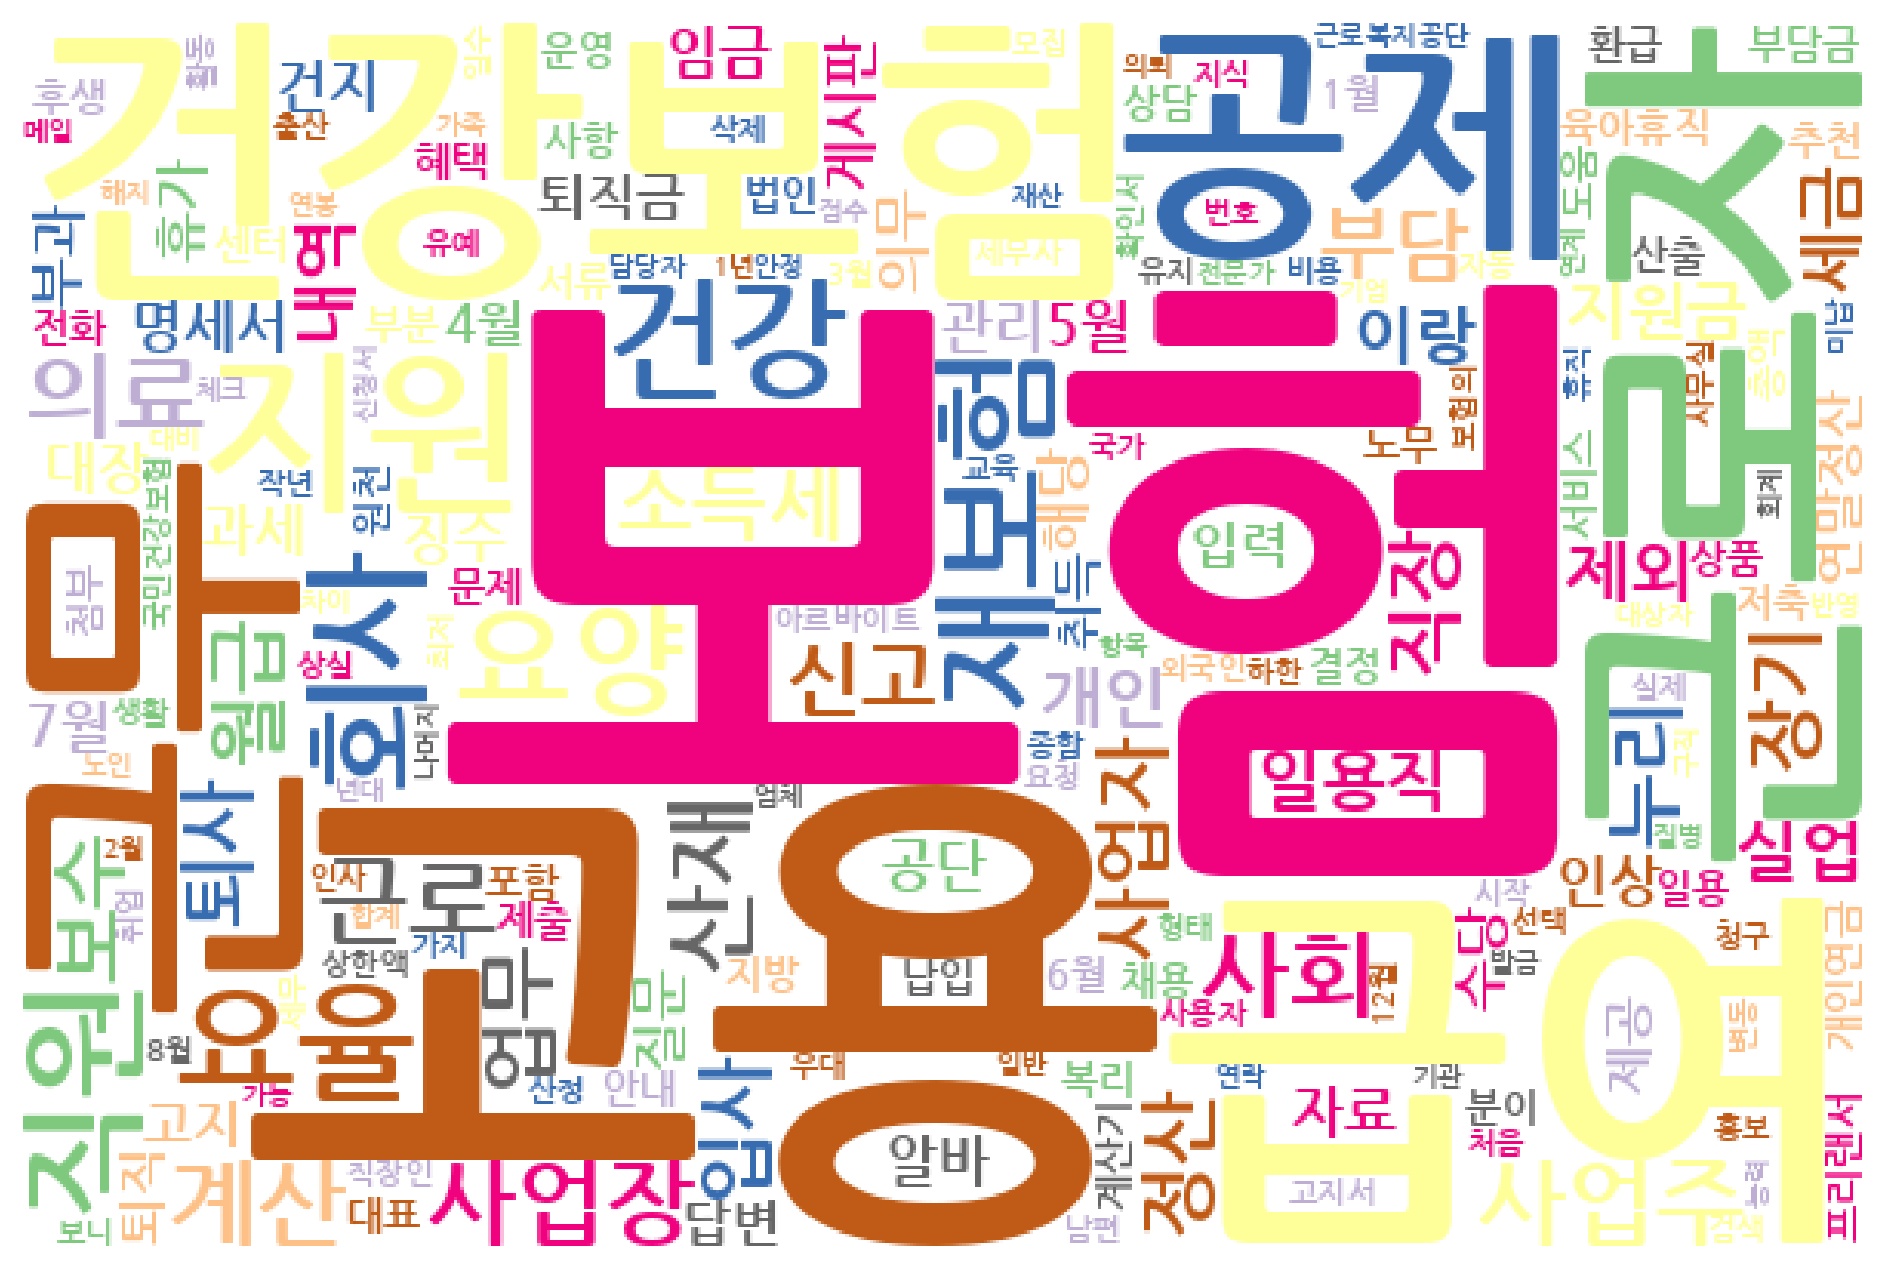

In [ ]:
text = ' '.join(cluster12_list)  

# 텍스트 데이터로 워드 클라우드 생성
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color='white', colormap="Accent", width=600, height=400).generate(text)

# 워드 클라우드 그리기
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

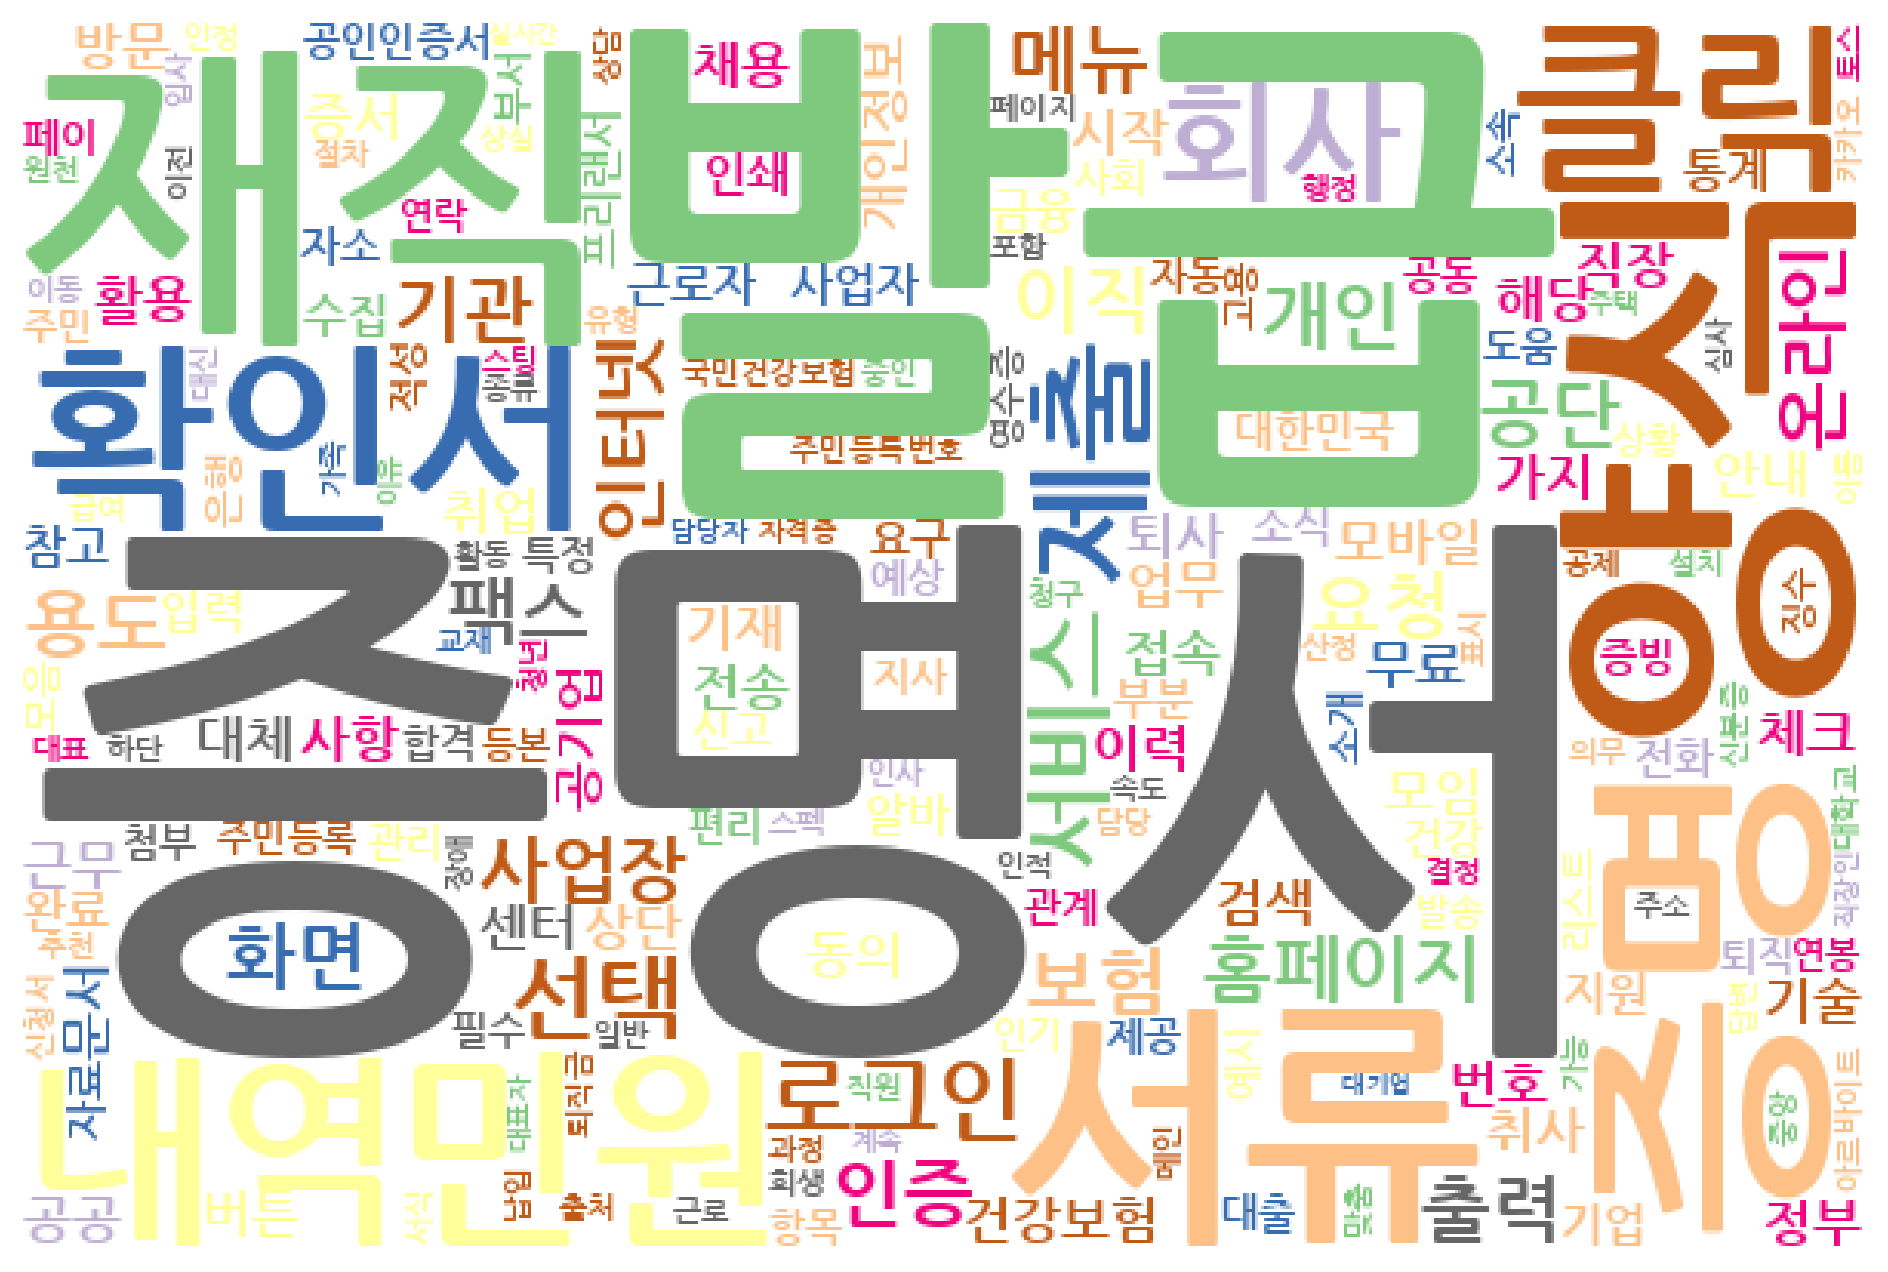

In [ ]:
text = ' '.join(cluster13_list)  

# 텍스트 데이터로 워드 클라우드 생성
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color='white', colormap="Accent", width=600, height=400).generate(text)

# 워드 클라우드 그리기
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## **Elbo 기법을 사용하여 KMeans 를 진행 하였을때 14 구간에 확실히 꺾이는 것이 보이지만 키워드들이 유의미하게 뭉쳐 있어 보이진 않기에 LDA를 진행**

## LDA-3

In [8]:
import pandas as pd
import numpy as np
import itertools # 반복 객체를 유용하게 다루는 라이브러리
import re  # 정규표현식을 사용할 수 있는 라이브러리
from sklearn.feature_extraction.text import TfidfVectorizer  # tf-idf값을 구하기 위해서 사용
from collections import defaultdict
from collections import Counter   # 단어들을 쉽게 집계하는 라이브러리
from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt   # 시각화하는 라이브러리
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')   # 선명하게 시각화
from sklearn.cluster import KMeans
from tqdm import trange, notebook
from matplotlib import rc, font_manager
import seaborn as sns
import gensim
from gensim.models import CoherenceModel

/tmp/ipykernel_29556/232805538.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')   # 선명하게 시각화


In [ ]:
#불용어 처리가 된 데이터 불러오기
df= pd.read_pickle("../data/analysis_data/cafeblog/cafeblog_total_doc.pkl")

In [4]:
# 명사만 추출한 리스트를 바탕으로 단어 빈도별 목록을 생성.
from gensim import corpora, models
noun_dic=corpora.Dictionary(df['doc_token_noun'])  # 딕셔너리 클래스로 사전생성, 각 단어별 id도 함께 생성
noun_dic.token2id                                # 각 단어 별 생성된 id 확인     

{'5년': 0,
 '90': 1,
 '가계': 2,
 '가계부채': 3,
 '가산세': 4,
 '개인': 5,
 '거부': 6,
 '거주': 7,
 '건강': 8,
 '결과': 9,
 '경기': 10,
 '경제': 11,
 '고민': 12,
 '고지': 13,
 '고통': 14,
 '공간': 15,
 '관심': 16,
 '구조조정': 17,
 '국가': 18,
 '국내': 19,
 '국세': 20,
 '국세청': 21,
 '그 후': 22,
 '기업': 23,
 '나머지': 24,
 '납세': 25,
 '다다': 26,
 '다라': 27,
 '다툼': 28,
 '대금': 29,
 '대부': 30,
 '대신': 31,
 '대출': 32,
 '대출금': 33,
 '대한민국': 34,
 '도움': 35,
 '동의': 36,
 '등에': 37,
 '면책': 38,
 '모색': 39,
 '무리': 40,
 '무시': 41,
 '문제': 42,
 '미납': 43,
 '방식': 44,
 '방어': 45,
 '방향': 46,
 '벌금': 47,
 '법률': 48,
 '법리': 49,
 '변제': 50,
 '병원': 51,
 '불황': 52,
 '비상': 53,
 '사무실': 54,
 '사업체': 55,
 '상가': 56,
 '상담': 57,
 '상대': 58,
 '상품': 59,
 '상환': 60,
 '상황': 61,
 '성실': 62,
 '세금': 63,
 '세납': 64,
 '소멸': 65,
 '소멸시효': 66,
 '소유': 67,
 '순간': 68,
 '신용카드': 69,
 '실직': 70,
 '악순환': 71,
 '압류': 72,
 '압박': 73,
 '양도소득세': 74,
 '어려움': 75,
 '언급': 76,
 '업체': 77,
 '연체': 78,
 '오피스텔': 79,
 '완료': 80,
 '외면': 81,
 '운영': 82,
 '원금': 83,
 '위기': 84,
 '유예': 85,
 '유일한': 86,
 '은행': 87,
 '의무': 88,
 '의문':

In [5]:
corpus = [noun_dic.doc2bow(text) for text in df['doc_token_noun']]
# 문서별 문서 안의 단어의 id와 빈도수로 수치화

In [5]:
import gensim
from gensim.models import CoherenceModel

Lda = gensim.models.ldamodel.LdaModel 
perplexity_score = []  # perplexity_score를 저장할 리스트
coherence_score = []   # coherence_score를 저장할 리스트

for i in notebook.tqdm(range(1,15)): 
    ldamodel = Lda(corpus, num_topics = i, id2word = noun_dic, passes = 15, random_state = 0) 
    perplexity_score.append(ldamodel.log_perplexity(corpus)) 
    coherence_score.append(CoherenceModel(model = ldamodel, texts = df['doc_token_noun'],
                                         dictionary = noun_dic, coherence = 'c_v').get_coherence())
    print(i,'process complete')

  0%|          | 0/14 [00:00<?, ?it/s]

1 process complete
2 process complete
3 process complete
4 process complete
5 process complete
6 process complete
7 process complete
8 process complete
9 process complete
10 process complete
11 process complete
12 process complete
13 process complete
14 process complete


### 토픽 개수 결정

#### 토픽 수에 따른 혼잡성 점수 그래프 확인

혼잡성
- 확률 모델이 결과를 얼마나 정확하게
예측하는지 판단
- 낮을수록 정확하게 예측
- 하지만 낮다고 해서, 
결과가 해석에 용이하다는 의미는 아님

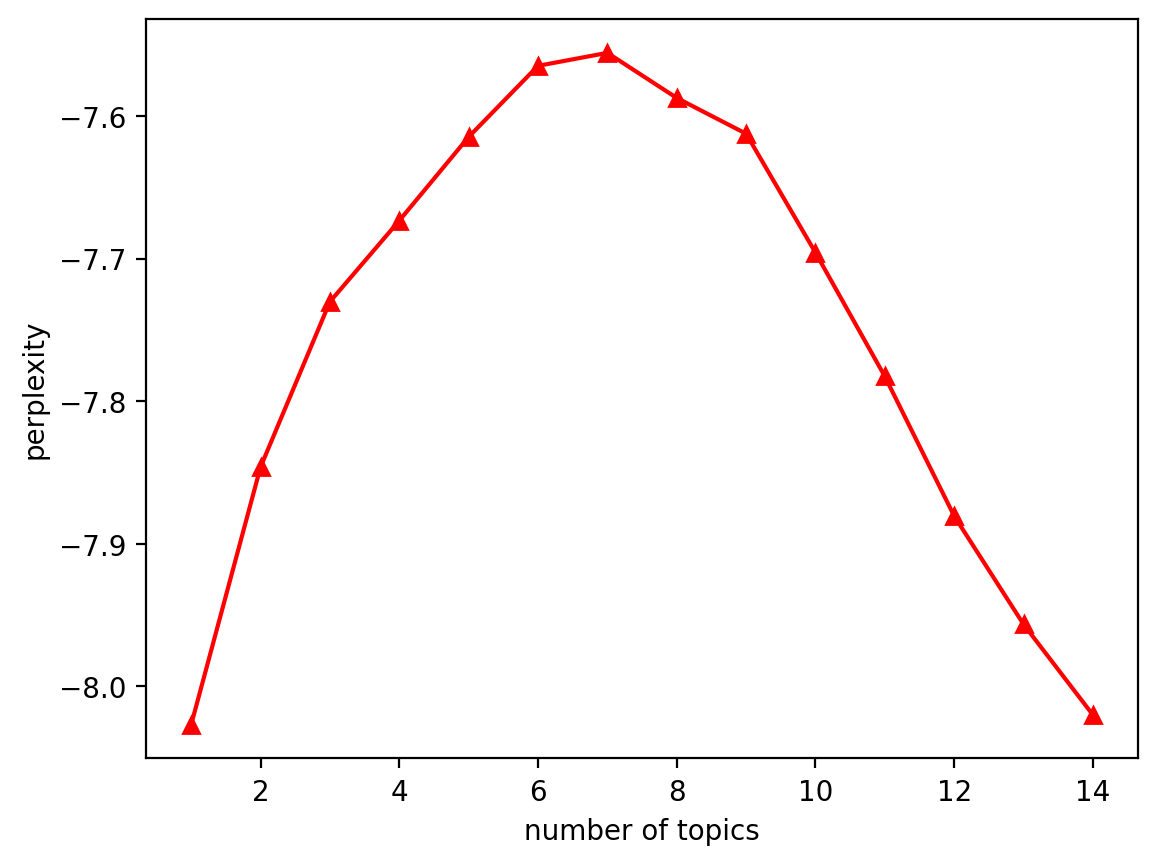

In [8]:
plt.plot(range(1,15), perplexity_score, 'r', marker ='^') #(x,y,color)
plt.xlabel("number of topics")
plt.ylabel("perplexity") # 혼잡도
plt.show()

#### 토픽 수에 따른 일관성 점수 그래프 확인

일관성
- 토픽이 얼마나 의미론적으로 일관성
있는지 판단
- 높을수록 의미론적 일관성 높음

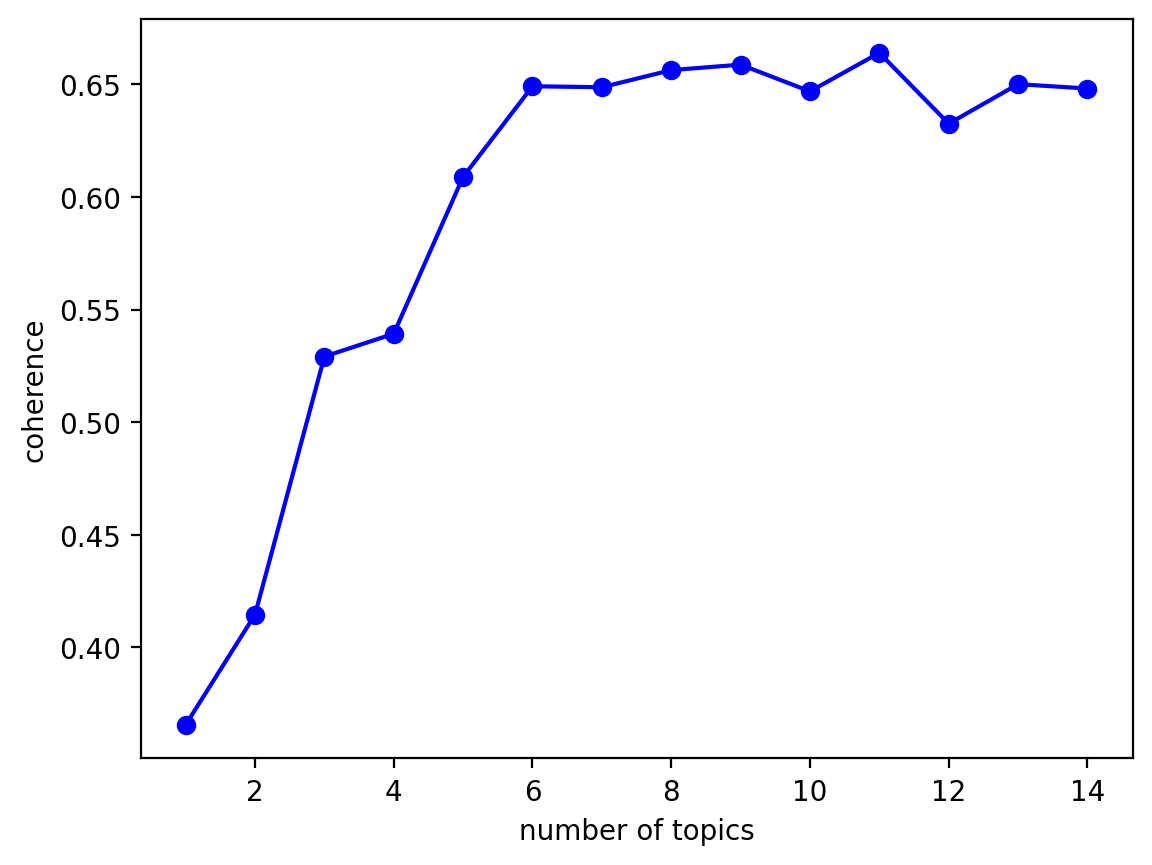

In [9]:
plt.plot(range(1,15), coherence_score, 'b', marker ='o') # 파란색, o 모양
plt.xlabel("number of topics")
plt.ylabel("coherence") # 일관성
plt.show()

# **gensim을 통해 일관성 모델을 진행한 결과 topic의 갯수를 일단은 6개로 진행하는 것이 좋아보인다**

In [16]:
import itertools # 반복 객체를 유용하게 다루는 라이브러리
import re  # 정규표현식을 사용할 수 있는 라이브러리
from sklearn.feature_extraction.text import TfidfVectorizer  # tf-idf값을 구하기 위해서 사용
from collections import defaultdict
from collections import Counter   # 단어들을 쉽게 집계하는 라이브러리
from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt   # 시각화하는 라이브러리
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')   # 선명하게 시각화
from sklearn.cluster import KMeans
from tqdm import trange, notebook
from matplotlib import rc, font_manager
import seaborn as sns

/tmp/ipykernel_29556/4236327776.py:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')   # 선명하게 시각화


### LDA 토픽 모델링 진행

In [10]:
Lda = gensim.models.ldamodel.LdaModel 

In [11]:
noun_lda = Lda(corpus, num_topics = 6, id2word = noun_dic, passes = 15, random_state = 0)
topics = noun_lda.print_topics(num_words = 5) 
for topic in notebook.tqdm(topics): 
    print(topic)

  0%|          | 0/6 [00:00<?, ?it/s]

(0, '0.022*"재산" + 0.018*"분할" + 0.012*"상담" + 0.010*"장애" + 0.010*"배우자"')
(1, '0.023*"투자" + 0.010*"주식" + 0.008*"시장" + 0.008*"자산" + 0.007*"미국"')
(2, '0.025*"대출" + 0.021*"개인" + 0.016*"보험" + 0.015*"공제" + 0.013*"회생"')
(3, '0.022*"공무원" + 0.017*"개혁" + 0.013*"기초" + 0.010*"예상" + 0.010*"인상"')
(4, '0.037*"연봉" + 0.022*"공기업" + 0.021*"채용" + 0.010*"교육" + 0.009*"시작"')
(5, '0.024*"신고" + 0.023*"보험" + 0.019*"급여" + 0.018*"증명서" + 0.014*"발급"')


In [15]:
len(corpus)

43626

In [13]:
print(noun_dic)

Dictionary<44573 unique tokens: ['5년', '90', '가계', '가계부채', '가산세']...>


In [14]:
noun_dtm = [noun_dic.doc2bow(text) for text in df['doc_token_noun']] # 문서별 문서 안의 단어의 id와 빈도수로 수치화
ldamodel=Lda(noun_dtm, num_topics=6, id2word=noun_dic, passes=10,random_state=0)

topics = [] # 예측된 토픽들을 저장할 리스트
for i in trange(len(noun_dtm)):  # 각 문서에 대해 반복
    prop_sort=[]  # 토픽별 확률을 저장할 리스트
    topic_sort=[] # 토픽 인덱스를 저장할 리스트
    for topic , prop in ldamodel.get_document_topics(noun_dtm)[i]:  #각 문서마다 토픽 별로 해당할 확률이 부여됨
        prop_sort.append(prop)  # 해당 토픽의 확률을 리스트에 추가
        topic_sort.append(topic)  # 해당 토픽의 인덱스를 리스트에 추가
    topics.append(topic_sort[prop_sort.index(max(prop_sort))])  #확률 중 가장 높은 확률의 토픽을 해당 문서의 토픽으로 지정

df['doc_topic'] = topics #모든 문서의 토픽을 데이터프레임에 추가

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43626/43626 [00:05<00:00, 7856.76it/s]


In [17]:
for doc_topic, prop in notebook.tqdm(ldamodel.get_document_topics(noun_dtm)[1]):
    print(doc_topic, prop) # 토픽, 확률을 출력

  0%|          | 0/5 [00:00<?, ?it/s]

0 0.21082698
1 0.043197505
2 0.6501957
3 0.029377664
5 0.06578293


In [18]:
df.head()

title  \
0           국세체납 건강보험료 미납시 국민연금 연체 압류 때문에 고민한다면   
1            국세체납 건강보험료 미납시 국민연금 연체 압류 어떻게 해결할까   
2        국세체납 건강보험료 미납 국민연금 연체 압류 등 세금 문제 해결하려면   
3   국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 면책 가능할까   
4  개인사업자 사업자등록 건강보험료 국민연금 납부는 어떻게 주부 프리랜서의 변신 1   

                                                 doc like_cnt  comment_cnt  \
0  해마다 매년 경제가 불황이라는 뉴스가 나오는 것 같다고 했습니다 올해도 어김없이 마...        4         <NA>   
1  경제가 침체되다 보니 생활비 부족뿐만 아니라 국세체납부터 시작해 각종 부분에서 연체...        5         <NA>   
2  우리나라 국민은 납세의 의무를 이행해야 된다고 했습니다 그러나 국세체납 금액이 너무...        8         <NA>   
3  국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 면책 가능할까 경제...        3         <NA>   
4  사업자등록하면어떤 일이 벌어지는지 진짜알고 계신건가요 개인사업자 준비중이신가요안녕하...       71           26   

                                        comment_list img_cnt div_cnt  like  \
0                                               null      12       0  <NA>   
1                                               null      12       0  <NA>   
2                                               null      11       0  <NA>   
3                                               null      14       0  <NA>   
4  비밀 댓글입니다지역가입자 전환되면 납부하는 보험료가 상당하다 하더라구요 ㅠㅠ마음의 ...       7       0  <NA>   

    img   div                               title_token_list_pos  \
0  <NA>  <NA>  [(국세, NNG), (체납, NNG), (건강, NNP), (보험료, NNP), ...   
1  <NA>  <NA>  [(국세, NNG), (체납, NNG), (건강, NNP), (보험료, NNP), ...   
2  <NA>  <NA>  [(국세, NNG), (체납, NNG), (건강, NNP), (보험료, NNP), ...   
3  <NA>  <NA>  [(국세, NNG), (체납, NNG), (건강, NNP), (보험료, NNP), ...   
4  <NA>  <NA>  [(개인, NNG), (사업자, NNP), (사업자, NNP), (등록, NNP),...   

                           title_token_noun  \
0              [국세, 체납, 건강, 미납, 연체, 압류, 고민]   
1              [국세, 체납, 건강, 미납, 연체, 압류, 해결]   
2      [국세, 체납, 건강, 미납, 연체, 압류, 세금, 문제, 해결]   
3  [국세, 체납, 건강, 미납, 연체, 압류, 개인, 회생, 세금, 면책]   
4          [개인, 사업자, 사업자, 건강, 주부, 프리랜서, 변신]   

                                      doc_token_noun  \
0  [경제, 불황, 경기, 코로나, 자영업자, 기업, 회사, 구조조정, 최악, 상황, ...   
1  [경제, 침체, 보니, 생활비, 부족, 국세, 체납, 시작, 부분, 연체, 시작, ...   
2  [우리나라, 납세, 의무, 이행, 국세, 체납, 규모, 의도, 탈세, 생활, 세금,...   
3  [국세, 체납, 건강, 미납, 연체, 압류, 개인, 회생, 세금, 면책, 경제, 상...   
4  [사업자, 진짜, 신건, 개인, 사업자, 비중, 이신, 경제, 공부, 엄마, 스텔라...   

                                  doc_token_list_pos  \
0  [(하, VV), (아, EC), (마다, JX), (매년, MAG), (경제, N...   
1  [(경제, NNG), (가, JKS), (침체, NNG), (되, XSV), (다,...   
2  [(우리나라, NNP), (국민, NNG), (은, JX), (납세, NNG), (...   
3  [(국세, NNG), (체납, NNG), (건강, NNP), (보험료, NNP), ...   
4  [(사업자, NNP), (등록, NNP), (하면, NNP), (어떤, MM), (...   

                              comment_token_list_pos  \
0                                       [(null, SL)]   
1                                       [(null, SL)]   
2                                       [(null, SL)]   
3                                       [(null, SL)]   
4  [(비밀, NNP), (댓글, NNP), (입, NNG), (니다, NNP), (지...   

                                  comment_token_noun  doc_topic  
0                                                 []          2  
1                                                 []          2  
2                                                 []          2  
3                                                 []          2  
4  [전환, 상당, 단디, 와이프, 명의, 사업자, 비용, 초기, 연기, 라고, 사업자...          2

In [19]:
import pandas as pd

In [ ]:
df.to_pickle("../data/analysis_data/cafeblog/pension_blogcafe_topic_doc.pkl")

In [21]:
aa= df.copy()

In [22]:
aa['doc_topic'].value_counts()

doc_topic
5    11015
3    10001
2     7810
1     5029
0     4931
4     4840
Name: count, dtype: int64

In [23]:
topic0 = aa[aa['doc_topic'] == 0] 
topic1 = aa[aa['doc_topic'] == 1]  
topic2 = aa[aa['doc_topic'] == 2] 
topic3 = aa[aa['doc_topic'] == 3] 
topic4 = aa[aa['doc_topic'] == 4] 
topic5 = aa[aa['doc_topic'] == 5] 

In [24]:
topic0_tn = topic0['doc_token_noun']  # 토픽 번호가 0인 문서들의 토큰화된 명사들을 topic0_tn에 저장
topic1_tn = topic1['doc_token_noun']  # 토픽 번호가 1인 문서들의 토큰화된 명사들을 topic1_tn에 저장
topic2_tn = topic2['doc_token_noun']  # 토픽 번호가 2인 문서들의 토큰화된 명사들을 topic2_tn에 저장
topic3_tn = topic3['doc_token_noun']
topic4_tn = topic4['doc_token_noun']
topic5_tn = topic5['doc_token_noun']

In [25]:
import itertools
topic0_nlist = list(itertools.chain(*topic0_tn)) # 리스트 언패킹
topic1_nlist = list(itertools.chain(*topic1_tn)) # 리스트 언패킹
topic2_nlist = list(itertools.chain(*topic2_tn)) # 리스트 언패킹
topic3_nlist = list(itertools.chain(*topic3_tn)) # 리스트 언패킹
topic4_nlist = list(itertools.chain(*topic4_tn)) # 리스트 언패킹
topic5_nlist = list(itertools.chain(*topic5_tn)) # 리스트 언패킹

In [26]:
from collections import Counter # 단어들을 쉽게 집계하기 위해 사용

### 토픽 0

In [27]:
count = Counter(topic0_nlist) # Counter 객체를 사용하여 topic0_nlist 리스트의 요소들을 카운트
hund0 = dict(count.most_common(500)) # 상위 500개 단어 출력

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

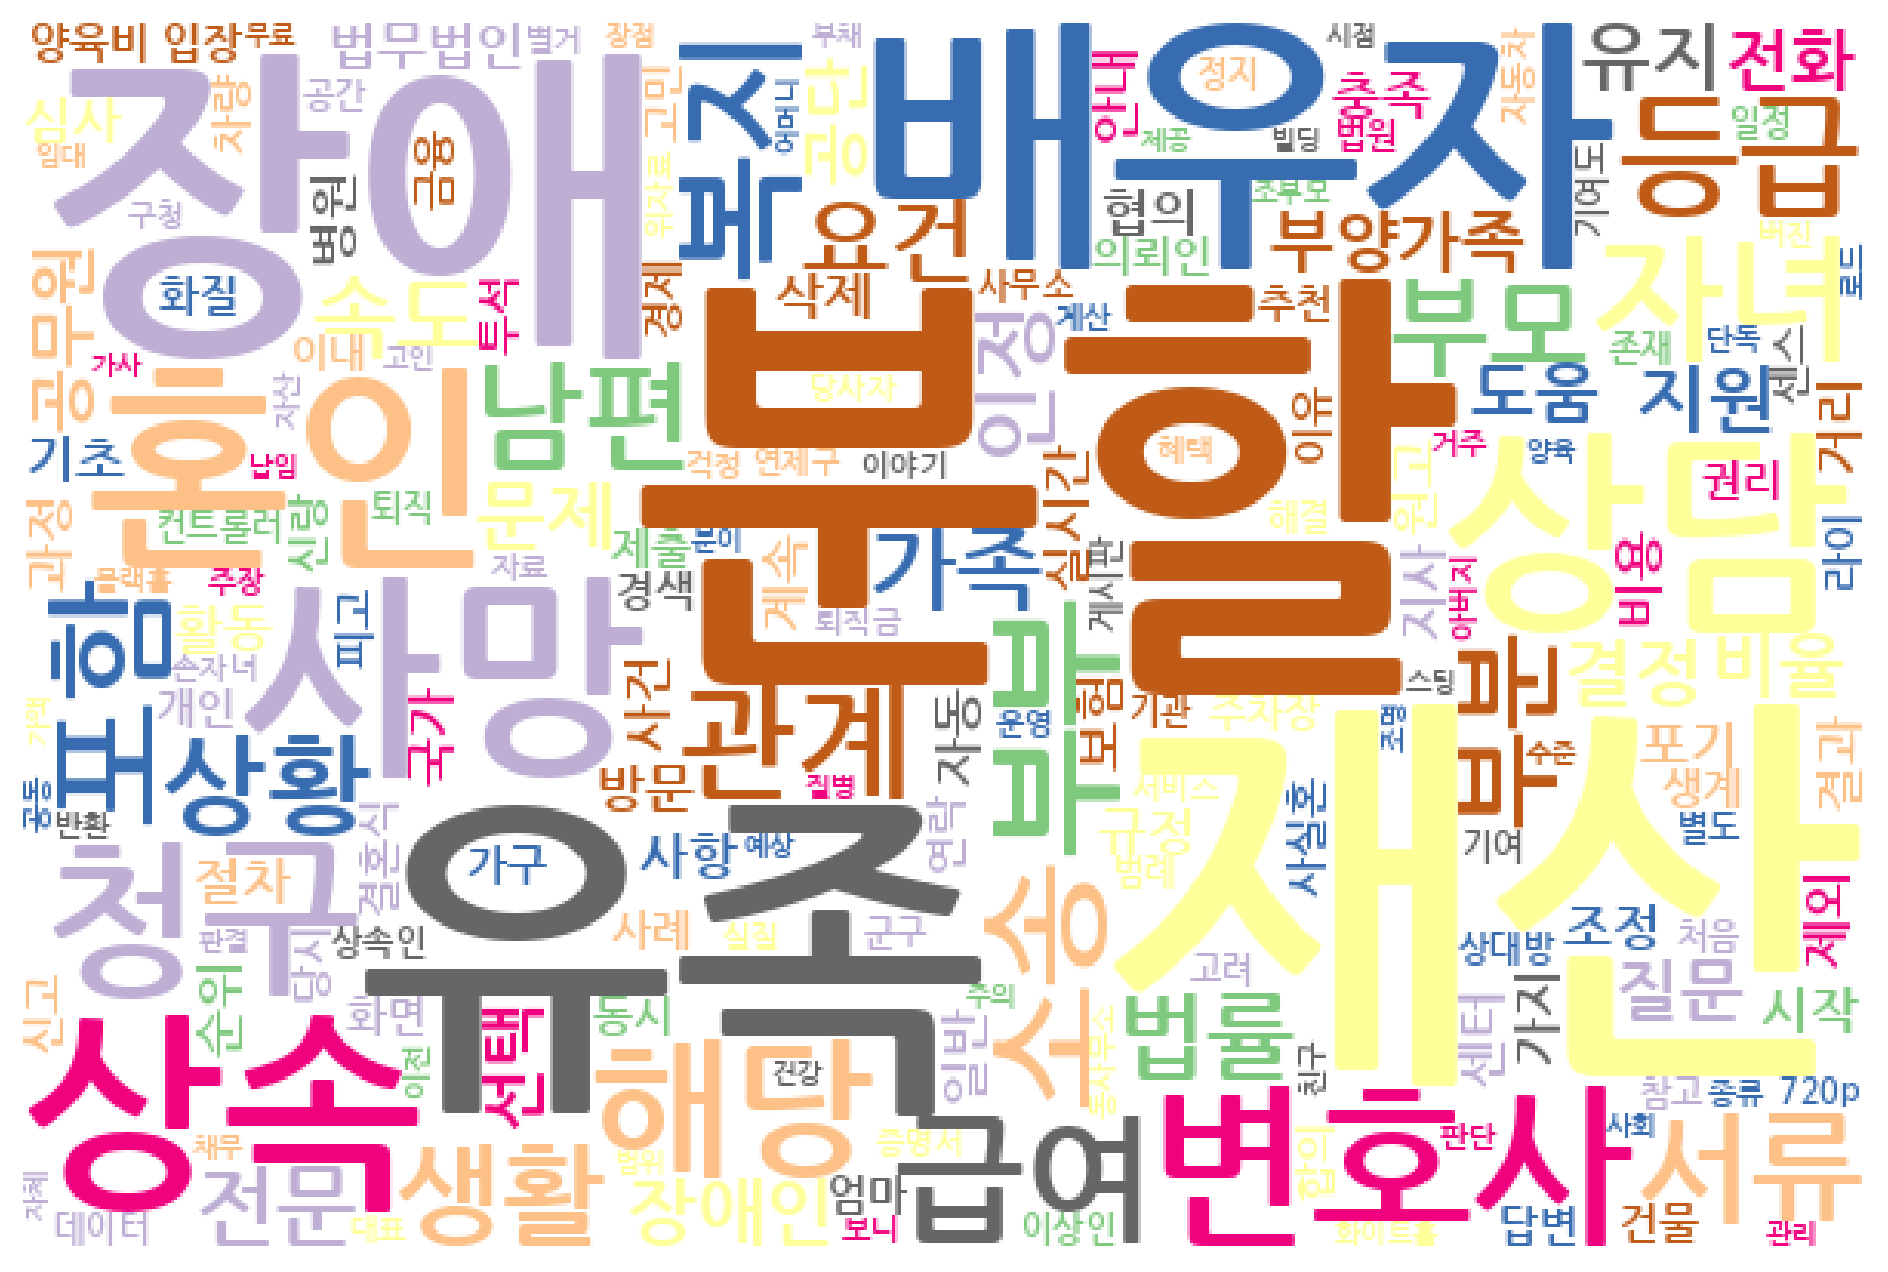

In [ ]:
%matplotlib inline
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color = 'white',
                     colormap = "Accent", width = 600, height = 400).generate_from_frequencies(hund0)
# 워드클라우드 출력

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

### 토픽 1

<function matplotlib.pyplot.show(close=None, block=None)>

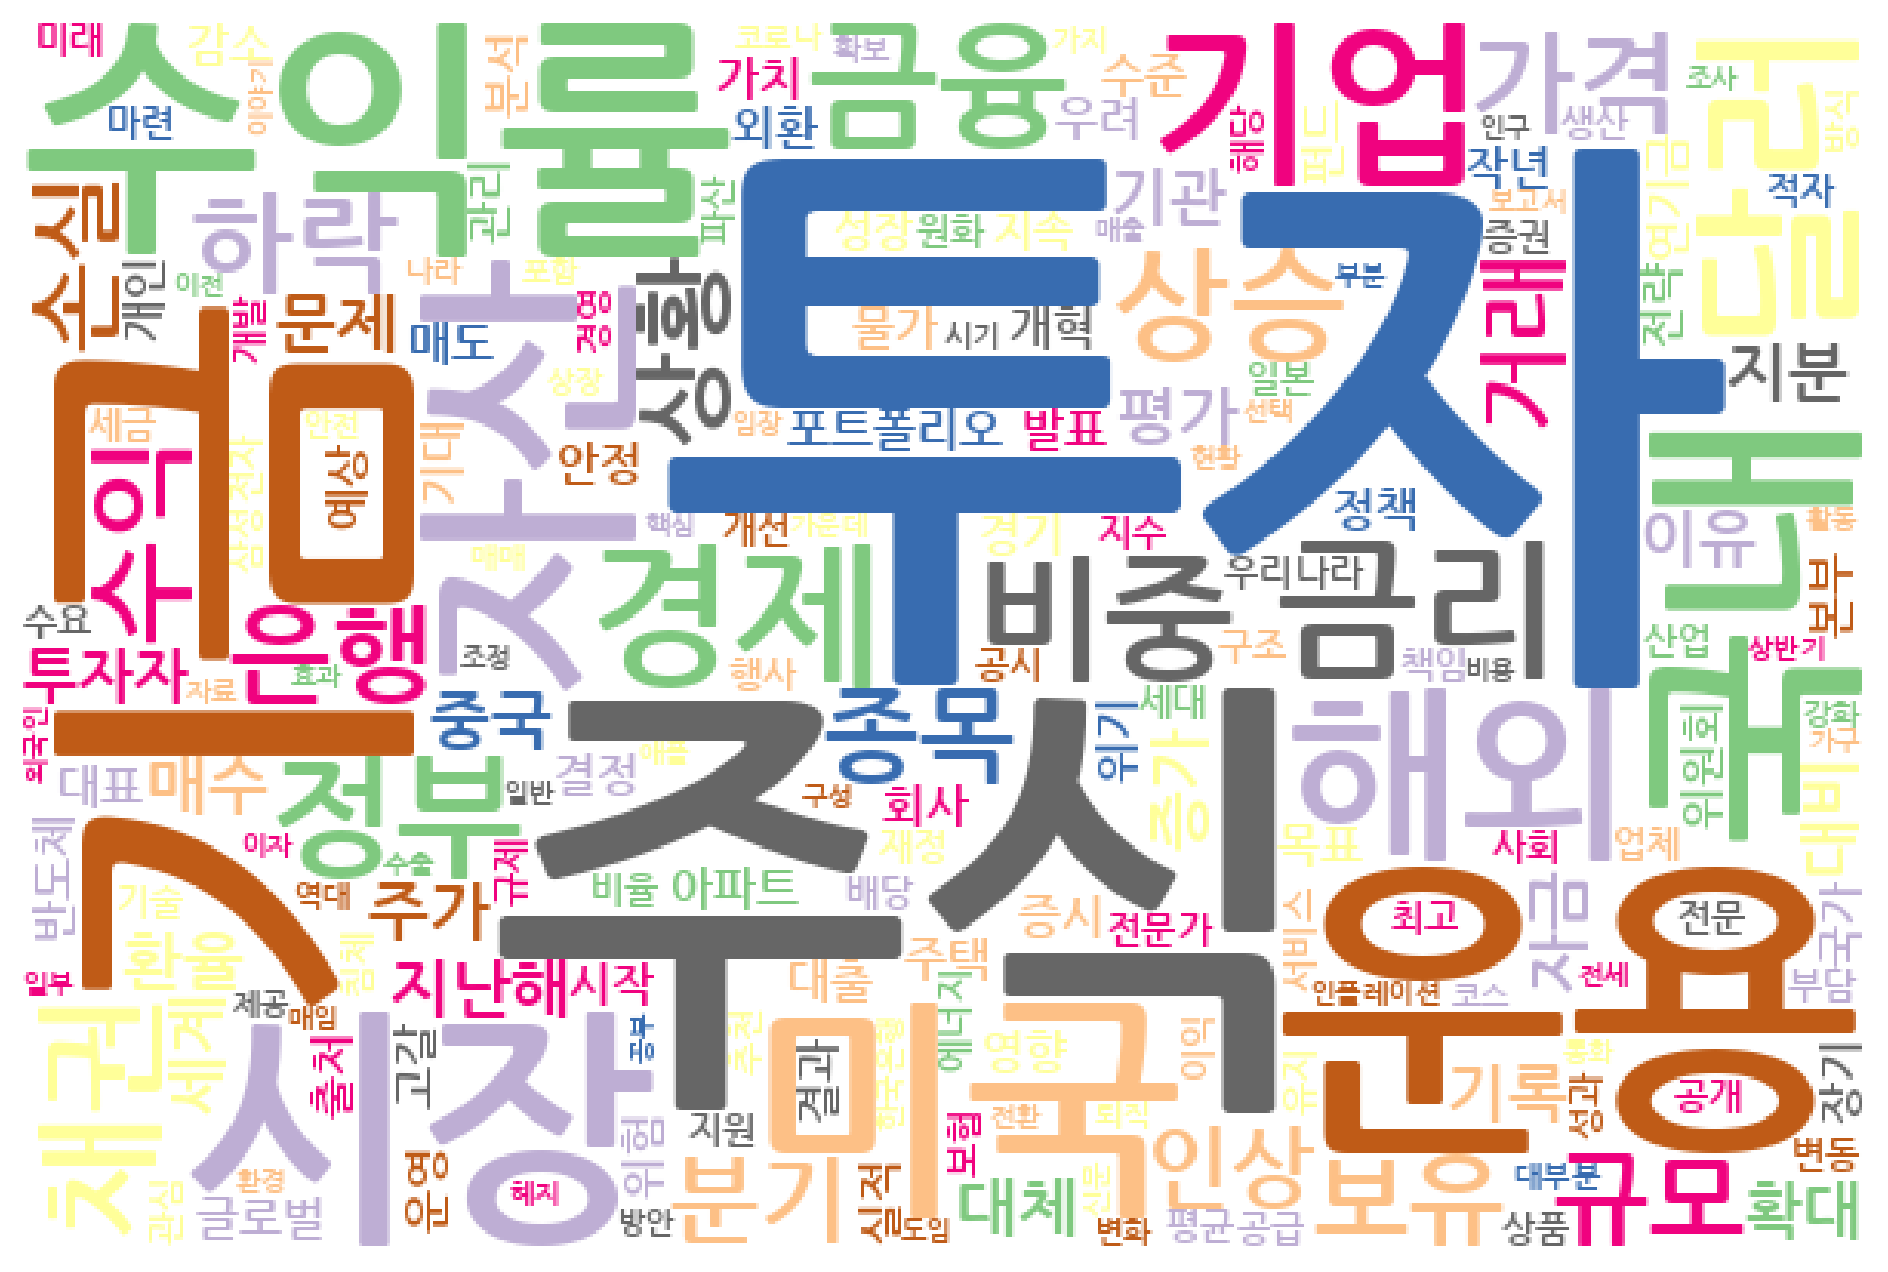

In [ ]:
count = Counter(topic1_nlist) # Counter 객체를 사용하여 topic0_nlist 리스트의 요소들을 카운트
hund1 = dict(count.most_common(500)) # 상위 500개 단어 출력

%matplotlib inline
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color = 'white',
                     colormap = "Accent", width = 600, height = 400).generate_from_frequencies(hund1)
# 워드클라우드 출력

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

In [31]:
hund1

{'투자': 19022,
 '주식': 10848,
 '기금': 8178,
 '운용': 8103,
 '수익률': 7705,
 '시장': 7648,
 '자산': 6352,
 '미국': 6274,
 '국내': 6146,
 '해외': 5826,
 '기업': 5806,
 '달러': 5611,
 '경제': 4984,
 '금리': 4702,
 '금융': 4410,
 '비중': 4375,
 '정부': 4340,
 '채권': 4087,
 '상승': 3996,
 '하락': 3261,
 '가격': 3196,
 '수익': 3115,
 '은행': 3115,
 '규모': 3097,
 '보유': 3013,
 '종목': 2987,
 '상황': 2942,
 '분기': 2806,
 '손실': 2739,
 '거래': 2713,
 '인상': 2692,
 '지난해': 2671,
 '주가': 2667,
 '지분': 2650,
 '환율': 2593,
 '평가': 2472,
 '증가': 2397,
 '대체': 2386,
 '대비': 2342,
 '기록': 2303,
 '자금': 2217,
 '매수': 2209,
 '세계': 2204,
 '중국': 2195,
 '문제': 2174,
 '확대': 2068,
 '이유': 2048,
 '기관': 2035,
 '투자자': 2035,
 '포트폴리오': 2005,
 '대출': 2001,
 '예상': 1982,
 '영향': 1959,
 '위원회': 1952,
 '아파트': 1912,
 '개혁': 1910,
 '결정': 1902,
 '물가': 1891,
 '본부': 1890,
 '글로벌': 1886,
 '작년': 1849,
 '회사': 1846,
 '가치': 1836,
 '수준': 1832,
 '안정': 1825,
 '주택': 1821,
 '외환': 1817,
 '대표': 1805,
 '증시': 1761,
 '정책': 1725,
 '연기금': 1724,
 '경기': 1714,
 '우려': 1701,
 '발표': 1682,
 '개인': 1680,
 '장기': 1678,


### 토픽 2

<function matplotlib.pyplot.show(close=None, block=None)>

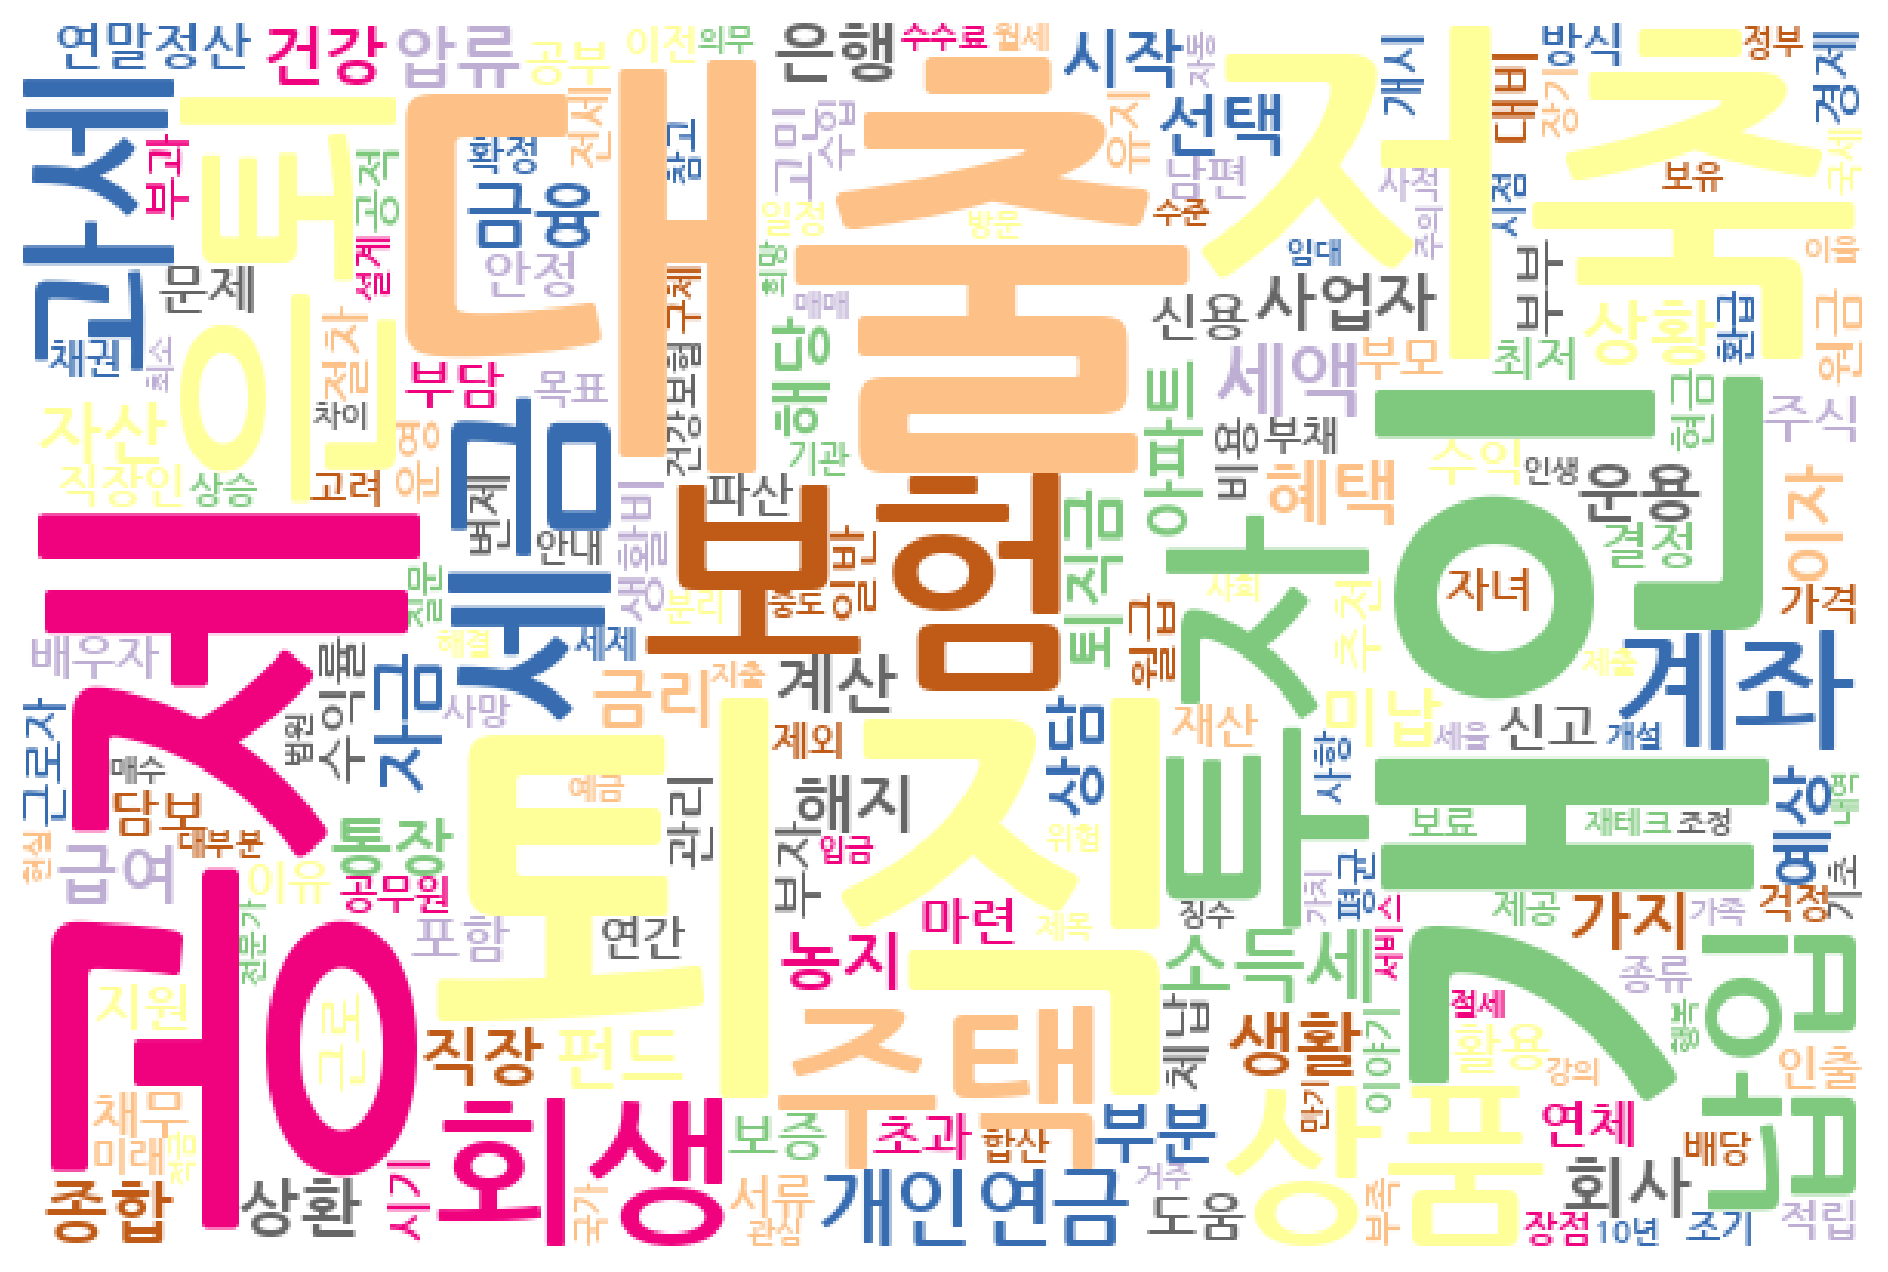

In [ ]:
count = Counter(topic2_nlist) # Counter 객체를 사용하여 topic0_nlist 리스트의 요소들을 카운트
hund2 = dict(count.most_common(500)) # 상위 500개 단어 출력

%matplotlib inline
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color = 'white',
                     colormap = "Accent", width = 600, height = 400).generate_from_frequencies(hund2)
# 워드클라우드 출력

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

In [33]:
hund2

{'대출': 11406,
 '퇴직': 10488,
 '개인': 10348,
 '공제': 9529,
 '저축': 9109,
 '보험': 8590,
 '은퇴': 8142,
 '투자': 7573,
 '주택': 7051,
 '세금': 7029,
 '상품': 6856,
 '납입': 6271,
 '과세': 6098,
 '회생': 5871,
 '계좌': 5695,
 '개인연금': 5312,
 '세액': 4540,
 '소득세': 4390,
 '자금': 4188,
 '혜택': 3741,
 '금융': 3685,
 '상황': 3664,
 '생활': 3552,
 '회사': 3319,
 '압류': 3304,
 '펀드': 3230,
 '종합': 3180,
 '자산': 3150,
 '선택': 3026,
 '급여': 2813,
 '은행': 2708,
 '해당': 2691,
 '계산': 2684,
 '사업자': 2657,
 '상환': 2628,
 '건강': 2596,
 '이자': 2593,
 '해지': 2535,
 '운용': 2518,
 '퇴직금': 2488,
 '시작': 2467,
 '통장': 2407,
 '금리': 2406,
 '직장': 2402,
 '부분': 2377,
 '농지': 2325,
 '미납': 2283,
 '가지': 2232,
 '아파트': 2184,
 '상담': 2156,
 '예상': 2130,
 '연말정산': 2127,
 '수익': 2101,
 '활용': 2091,
 '포함': 2051,
 '신고': 2051,
 '마련': 2030,
 '연체': 1961,
 '주식': 1939,
 '도움': 1923,
 '대비': 1912,
 '채무': 1904,
 '결정': 1899,
 '보증': 1887,
 '문제': 1882,
 '신용': 1870,
 '담보': 1865,
 '안정': 1849,
 '생활비': 1842,
 '부담': 1820,
 '고민': 1812,
 '지원': 1798,
 '추천': 1787,
 '체납': 1778,
 '초과': 1772,
 '원금': 1768,


### 토픽 3

<function matplotlib.pyplot.show(close=None, block=None)>

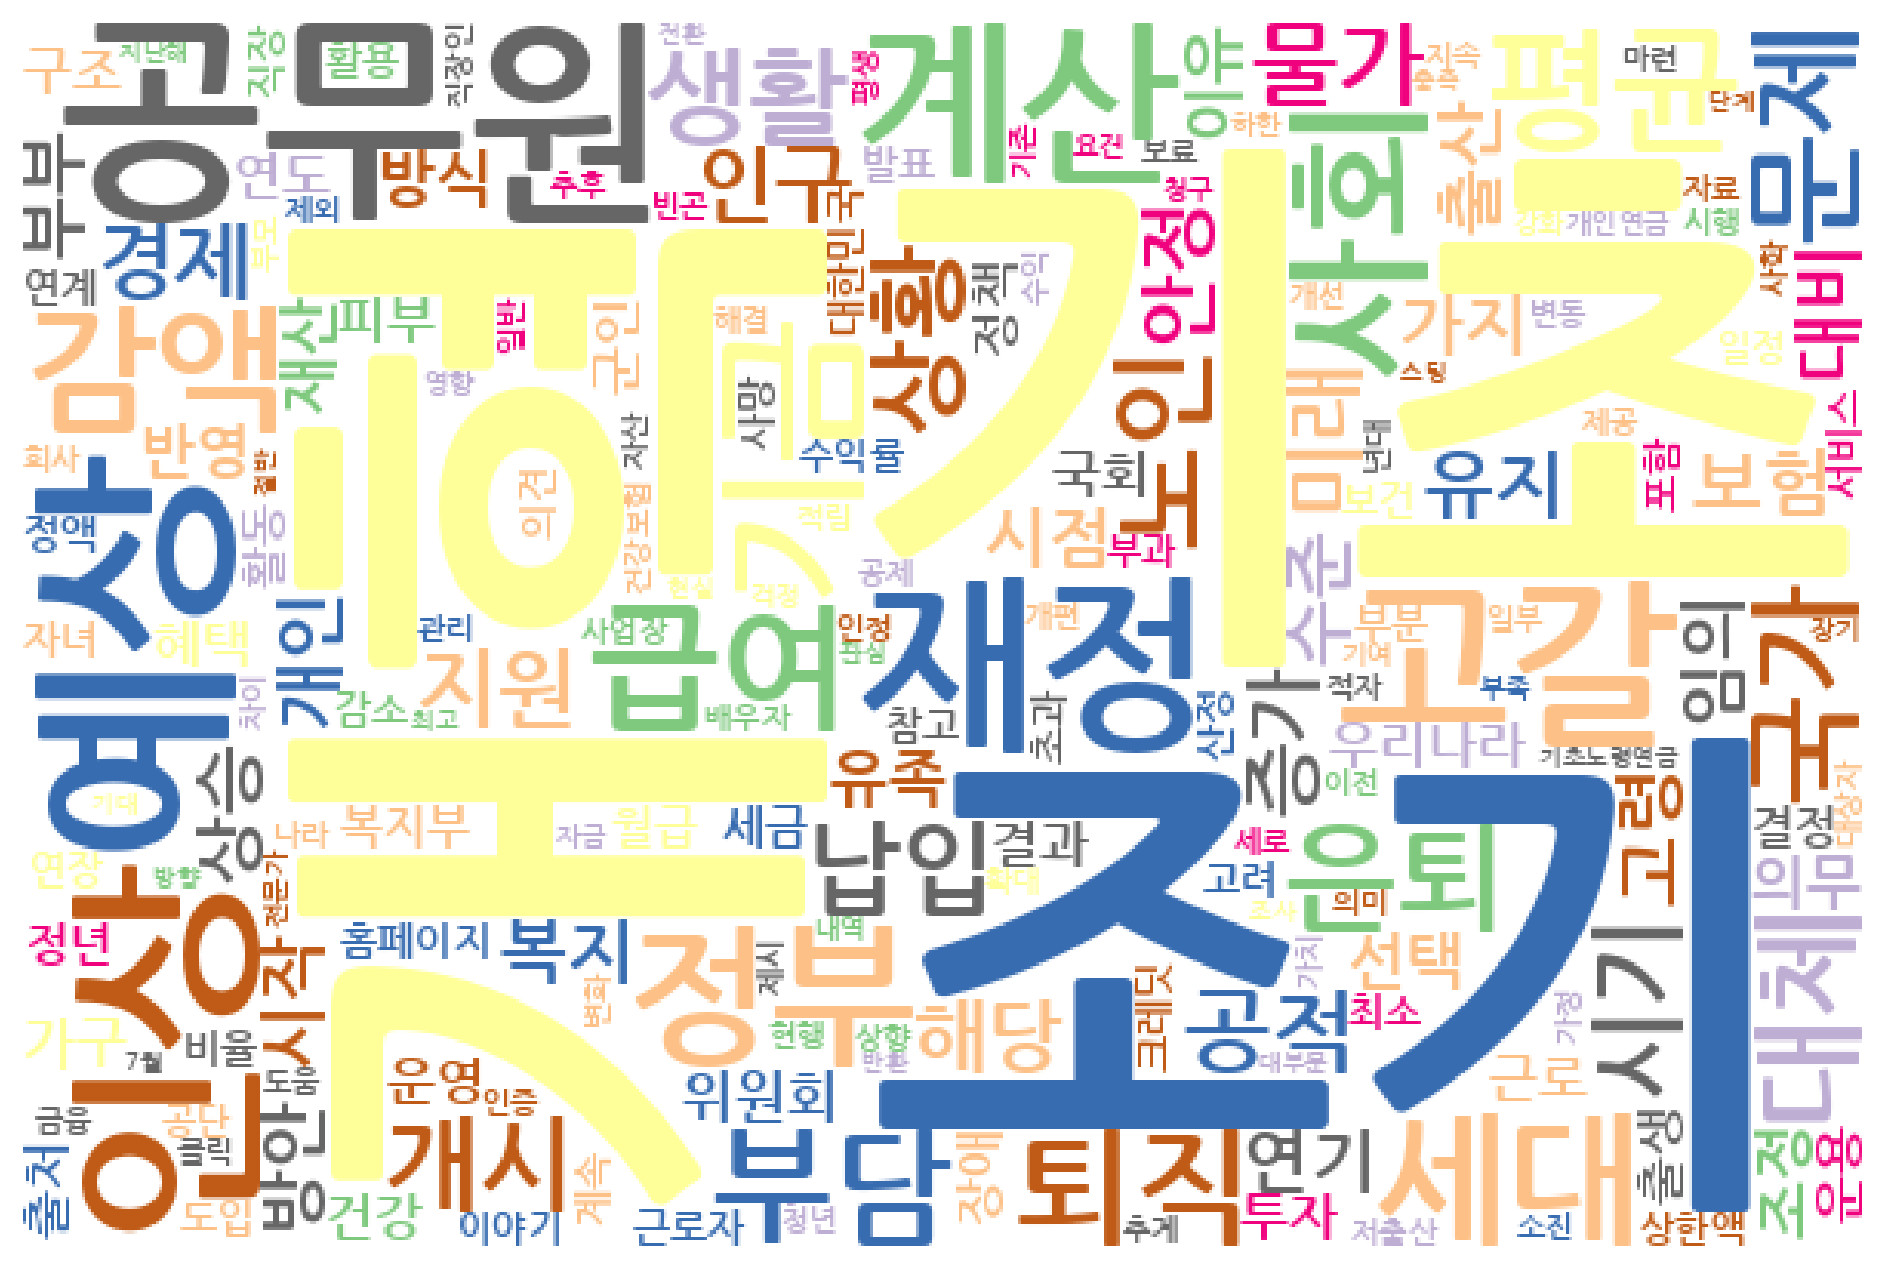

In [ ]:
count = Counter(topic3_nlist) # Counter 객체를 사용하여 topic0_nlist 리스트의 요소들을 카운트
hund3 = dict(count.most_common(500)) # 상위 500개 단어 출력

%matplotlib inline
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color = 'white',
                     colormap = "Accent", width = 600, height = 400).generate_from_frequencies(hund3)
# 워드클라우드 출력

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

In [35]:
hund3

{'개혁': 18070,
 '기초': 16731,
 '조기': 13922,
 '공무원': 12236,
 '예상': 12101,
 '인상': 10874,
 '재정': 9090,
 '고갈': 8619,
 '계산': 8565,
 '정부': 8245,
 '기금': 8204,
 '사회': 7777,
 '세대': 6907,
 '급여': 6796,
 '감액': 6761,
 '평균': 6604,
 '퇴직': 6398,
 '부담': 6317,
 '은퇴': 6307,
 '대체': 6269,
 '국가': 6172,
 '문제': 6061,
 '생활': 6012,
 '노인': 5990,
 '상황': 5407,
 '개시': 5313,
 '납입': 5299,
 '시기': 5109,
 '공적': 4785,
 '물가': 4771,
 '지원': 4633,
 '인구': 4621,
 '경제': 4614,
 '미래': 4593,
 '해당': 4591,
 '증가': 4523,
 '안정': 4483,
 '보험': 4426,
 '유지': 4386,
 '개인': 4333,
 '상승': 4332,
 '대비': 4201,
 '고령': 4090,
 '연기': 4083,
 '수준': 4055,
 '복지': 3948,
 '출산': 3942,
 '방안': 3895,
 '임의': 3851,
 '시작': 3819,
 '가지': 3812,
 '시점': 3753,
 '부부': 3641,
 '방식': 3615,
 '조정': 3602,
 '유족': 3544,
 '선택': 3476,
 '재산': 3473,
 '이유': 3466,
 '의무': 3369,
 '반영': 3367,
 '위원회': 3313,
 '가구': 3291,
 '우리나라': 3261,
 '결과': 3251,
 '건강': 3246,
 '혜택': 3226,
 '투자': 3207,
 '운영': 3181,
 '근로': 3140,
 '피부': 3069,
 '국회': 3053,
 '구조': 3030,
 '연도': 2990,
 '정책': 2984,
 '출처': 2973,
 '

### 토픽 4

<function matplotlib.pyplot.show(close=None, block=None)>

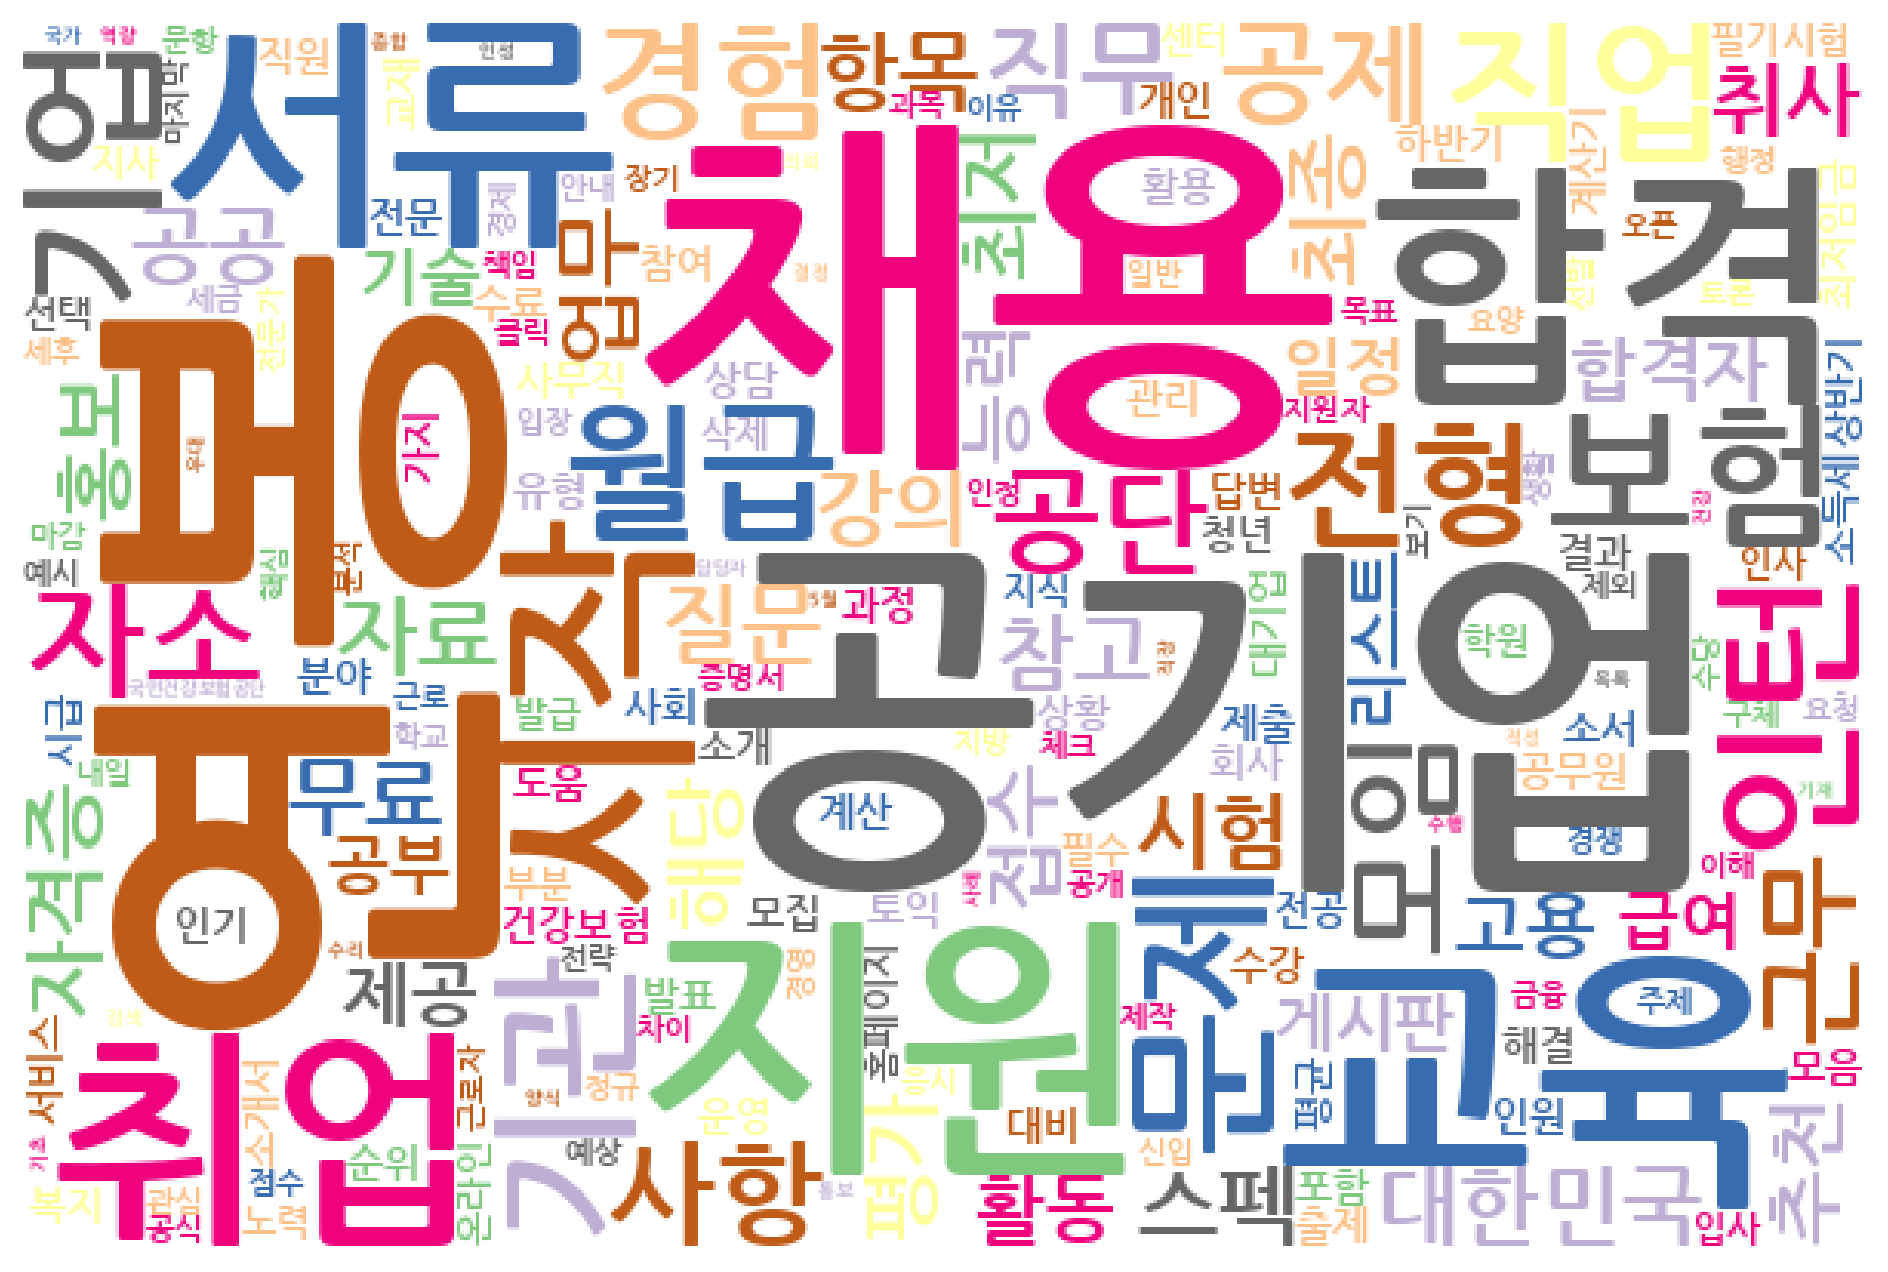

In [ ]:
count = Counter(topic4_nlist) # Counter 객체를 사용하여 topic0_nlist 리스트의 요소들을 카운트
hund4 = dict(count.most_common(500)) # 상위 500개 단어 출력

%matplotlib inline
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color = 'white',
                     colormap = "Accent", width = 600, height = 400).generate_from_frequencies(hund4)
# 워드클라우드 출력

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

In [37]:
hund4

{'연봉': 14807,
 '채용': 10741,
 '공기업': 10125,
 '교육': 5038,
 '지원': 4938,
 '합격': 4395,
 '서류': 3923,
 '취업': 3792,
 '시작': 3219,
 '보험': 3091,
 '문제': 3038,
 '인턴': 2988,
 '기관': 2960,
 '직업': 2834,
 '기업': 2713,
 '월급': 2671,
 '전형': 2643,
 '경험': 2611,
 '자소': 2466,
 '모임': 2397,
 '공단': 2336,
 '사항': 2325,
 '공제': 2315,
 '직무': 2289,
 '근무': 2252,
 '대한민국': 2220,
 '업무': 2162,
 '스펙': 2119,
 '질문': 2098,
 '항목': 2074,
 '자료': 2058,
 '무료': 1904,
 '자격증': 1893,
 '참고': 1835,
 '시험': 1790,
 '강의': 1778,
 '공공': 1762,
 '최종': 1753,
 '해당': 1733,
 '최저': 1725,
 '취사': 1715,
 '평가': 1691,
 '추천': 1690,
 '홍보': 1673,
 '접수': 1667,
 '고용': 1659,
 '활동': 1608,
 '능력': 1579,
 '합격자': 1571,
 '제공': 1506,
 '게시판': 1490,
 '급여': 1482,
 '일정': 1455,
 '기술': 1441,
 '공부': 1439,
 '리스트': 1433,
 '건강보험': 1384,
 '인기': 1382,
 '도움': 1362,
 '공무원': 1348,
 '활용': 1342,
 '발표': 1320,
 '제출': 1318,
 '청년': 1300,
 '전공': 1283,
 '포함': 1251,
 '사회': 1250,
 '분야': 1250,
 '관리': 1244,
 '사무직': 1235,
 '계산': 1197,
 '상황': 1178,
 '하반기': 1178,
 '수료': 1153,
 '직원': 1113,
 '모집': 110

### 토픽 5

<function matplotlib.pyplot.show(close=None, block=None)>

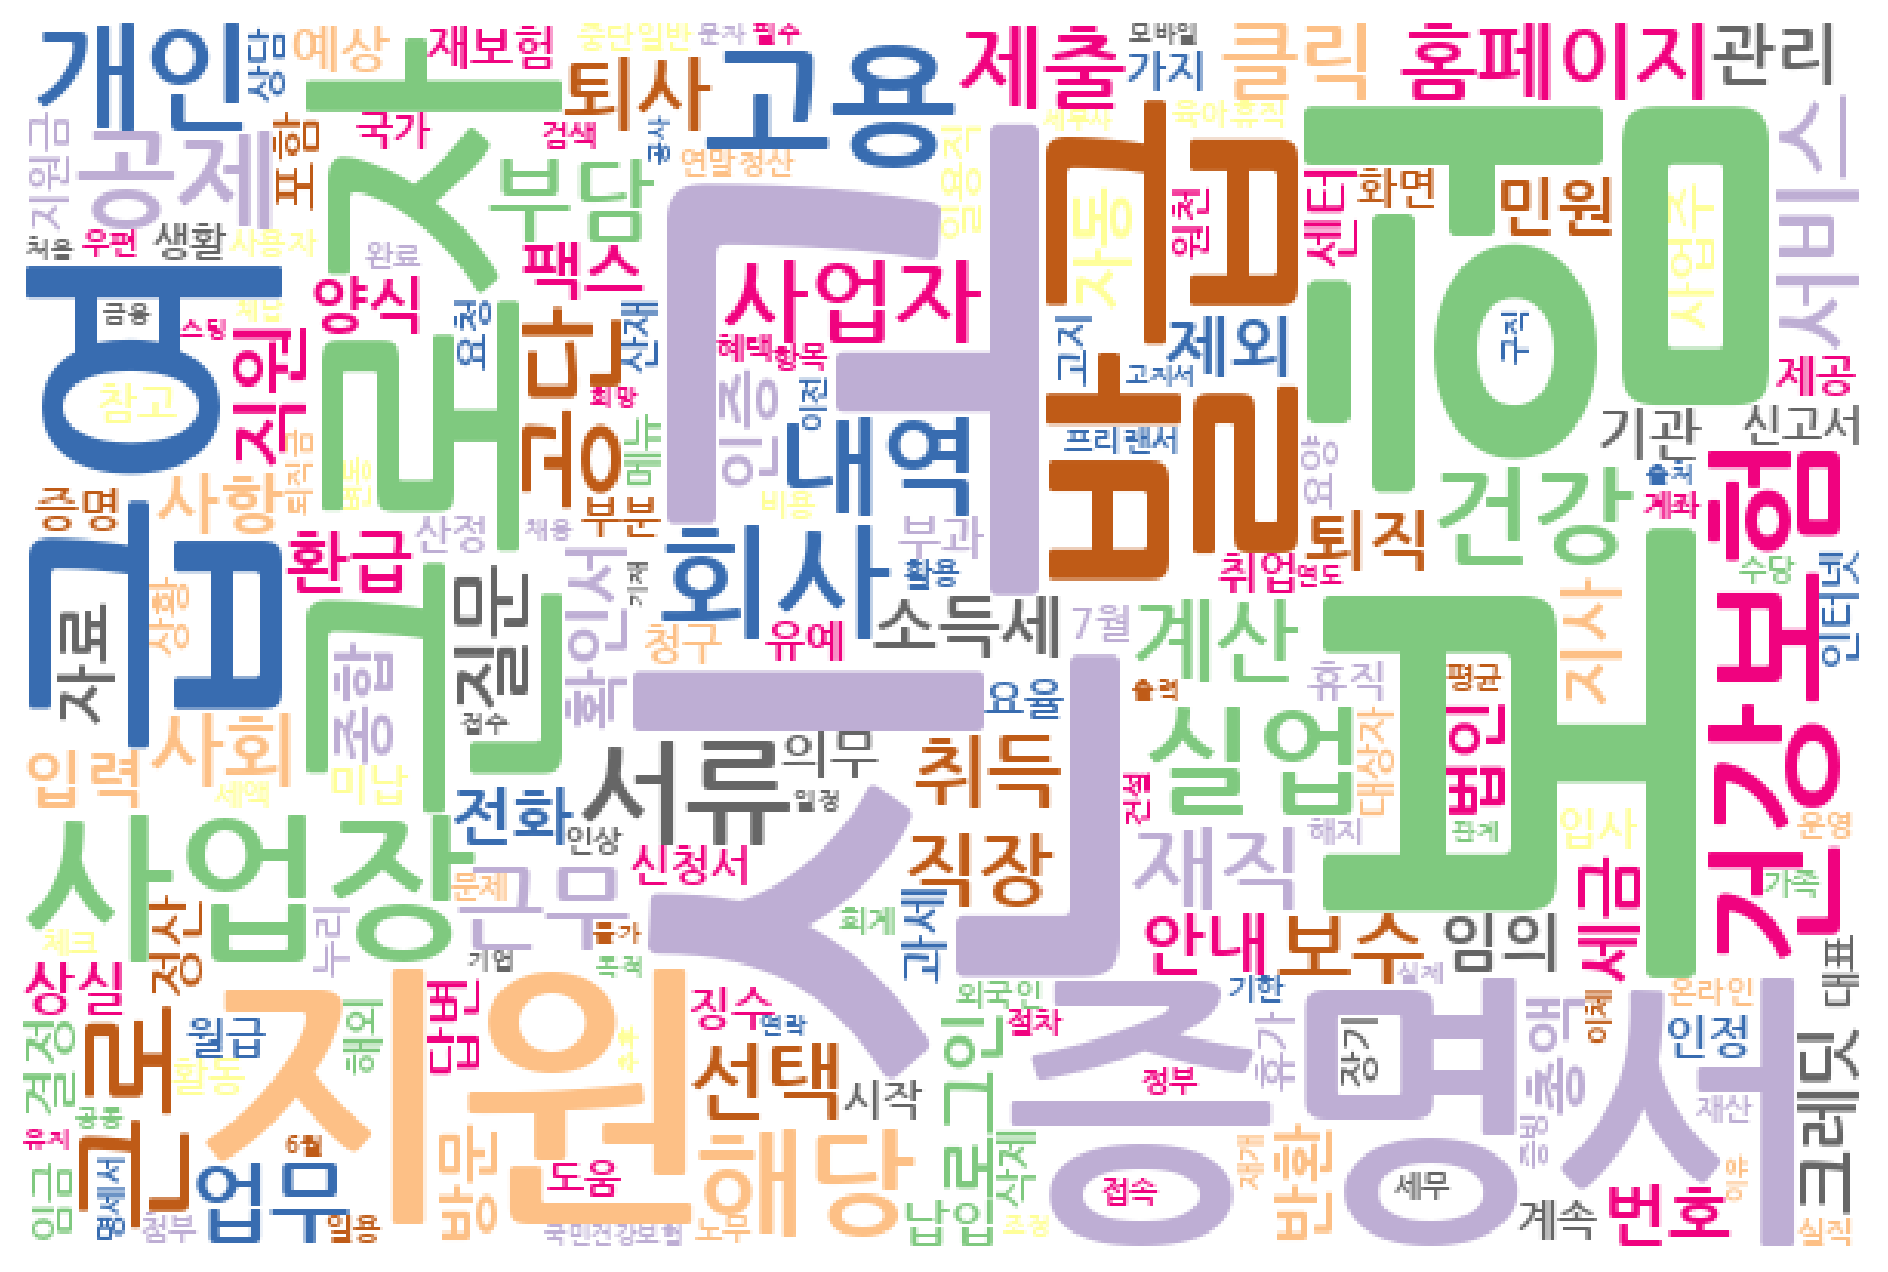

In [ ]:
count = Counter(topic5_nlist) # Counter 객체를 사용하여 topic0_nlist 리스트의 요소들을 카운트
hund5 = dict(count.most_common(500)) # 상위 500개 단어 출력

%matplotlib inline
wordcloud = WordCloud(font_path = '../data/NanumGothicBold.ttf', background_color = 'white',
                     colormap = "Accent", width = 600, height = 400).generate_from_frequencies(hund5)
# 워드클라우드 출력
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show

In [39]:
hund5

{'신고': 18171,
 '보험': 16475,
 '증명서': 13422,
 '근로자': 12230,
 '지원': 12189,
 '급여': 11939,
 '발급': 11757,
 '사업장': 11037,
 '건강보험': 8683,
 '고용': 8042,
 '회사': 6704,
 '근로': 6496,
 '해당': 6139,
 '개인': 6095,
 '실업': 6039,
 '서류': 5802,
 '공제': 5096,
 '건강': 5060,
 '내역': 5016,
 '공단': 5000,
 '사업자': 4900,
 '재직': 4856,
 '서비스': 4780,
 '근무': 4661,
 '계산': 4480,
 '제출': 4415,
 '부담': 4277,
 '업무': 4043,
 '홈페이지': 4026,
 '클릭': 3983,
 '선택': 3950,
 '직장': 3773,
 '퇴사': 3638,
 '보수': 3603,
 '취득': 3599,
 '사회': 3567,
 '직원': 3535,
 '질문': 3446,
 '소득세': 3442,
 '안내': 3439,
 '관리': 3414,
 '제외': 3354,
 '번호': 3263,
 '크레딧': 3127,
 '환급': 3115,
 '로그인': 3082,
 '사항': 3012,
 '퇴직': 2968,
 '세금': 2962,
 '확인서': 2942,
 '지사': 2937,
 '임의': 2780,
 '전화': 2771,
 '민원': 2771,
 '팩스': 2740,
 '종합': 2670,
 '인증': 2635,
 '자동': 2629,
 '총액': 2613,
 '자료': 2610,
 '방문': 2600,
 '입력': 2598,
 '법인': 2557,
 '반환': 2530,
 '양식': 2526,
 '상실': 2523,
 '답변': 2513,
 '기관': 2440,
 '결정': 2416,
 '정산': 2384,
 '센터': 2358,
 '예상': 2280,
 '납입': 2272,
 '사업주': 2268,
 '과세': 2247,
 '의

## 감성분석

### SentiwordNet(긍정, 부정, 중립)

In [40]:
import pandas as pd
import numpy as np
import itertools # 반복 객체를 유용하게 다루는 라이브러리
import re  # 정규표현식을 사용할 수 있는 라이브러리
from sklearn.feature_extraction.text import TfidfVectorizer  # tf-idf값을 구하기 위해서 사용
from collections import defaultdict
from collections import Counter   # 단어들을 쉽게 집계하는 라이브러리
from wordcloud import WordCloud
import matplotlib
import matplotlib.pyplot as plt   # 시각화하는 라이브러리
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')   # 선명하게 시각화
from sklearn.cluster import KMeans
from tqdm import trange, notebook
from matplotlib import rc, font_manager
import seaborn as sns

/tmp/ipykernel_29556/4200491039.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')   # 선명하게 시각화


In [ ]:
df= pd.read_pickle("../data/analysis_data/cafeblog/pension_blogcafe_topic_doc.pkl")

In [41]:
df.head()

title  \
0           국세체납 건강보험료 미납시 국민연금 연체 압류 때문에 고민한다면   
1            국세체납 건강보험료 미납시 국민연금 연체 압류 어떻게 해결할까   
2        국세체납 건강보험료 미납 국민연금 연체 압류 등 세금 문제 해결하려면   
3   국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 면책 가능할까   
4  개인사업자 사업자등록 건강보험료 국민연금 납부는 어떻게 주부 프리랜서의 변신 1   

                                                 doc like_cnt  comment_cnt  \
0  해마다 매년 경제가 불황이라는 뉴스가 나오는 것 같다고 했습니다 올해도 어김없이 마...        4         <NA>   
1  경제가 침체되다 보니 생활비 부족뿐만 아니라 국세체납부터 시작해 각종 부분에서 연체...        5         <NA>   
2  우리나라 국민은 납세의 의무를 이행해야 된다고 했습니다 그러나 국세체납 금액이 너무...        8         <NA>   
3  국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 면책 가능할까 경제...        3         <NA>   
4  사업자등록하면어떤 일이 벌어지는지 진짜알고 계신건가요 개인사업자 준비중이신가요안녕하...       71           26   

                                        comment_list img_cnt div_cnt  like  \
0                                               null      12       0  <NA>   
1                                               null      12       0  <NA>   
2                                               null      11       0  <NA>   
3                                               null      14       0  <NA>   
4  비밀 댓글입니다지역가입자 전환되면 납부하는 보험료가 상당하다 하더라구요 ㅠㅠ마음의 ...       7       0  <NA>   

    img   div                               title_token_list_pos  \
0  <NA>  <NA>  [(국세, NNG), (체납, NNG), (건강, NNP), (보험료, NNP), ...   
1  <NA>  <NA>  [(국세, NNG), (체납, NNG), (건강, NNP), (보험료, NNP), ...   
2  <NA>  <NA>  [(국세, NNG), (체납, NNG), (건강, NNP), (보험료, NNP), ...   
3  <NA>  <NA>  [(국세, NNG), (체납, NNG), (건강, NNP), (보험료, NNP), ...   
4  <NA>  <NA>  [(개인, NNG), (사업자, NNP), (사업자, NNP), (등록, NNP),...   

                           title_token_noun  \
0              [국세, 체납, 건강, 미납, 연체, 압류, 고민]   
1              [국세, 체납, 건강, 미납, 연체, 압류, 해결]   
2      [국세, 체납, 건강, 미납, 연체, 압류, 세금, 문제, 해결]   
3  [국세, 체납, 건강, 미납, 연체, 압류, 개인, 회생, 세금, 면책]   
4          [개인, 사업자, 사업자, 건강, 주부, 프리랜서, 변신]   

                                      doc_token_noun  \
0  [경제, 불황, 경기, 코로나, 자영업자, 기업, 회사, 구조조정, 최악, 상황, ...   
1  [경제, 침체, 보니, 생활비, 부족, 국세, 체납, 시작, 부분, 연체, 시작, ...   
2  [우리나라, 납세, 의무, 이행, 국세, 체납, 규모, 의도, 탈세, 생활, 세금,...   
3  [국세, 체납, 건강, 미납, 연체, 압류, 개인, 회생, 세금, 면책, 경제, 상...   
4  [사업자, 진짜, 신건, 개인, 사업자, 비중, 이신, 경제, 공부, 엄마, 스텔라...   

                                  doc_token_list_pos  \
0  [(하, VV), (아, EC), (마다, JX), (매년, MAG), (경제, N...   
1  [(경제, NNG), (가, JKS), (침체, NNG), (되, XSV), (다,...   
2  [(우리나라, NNP), (국민, NNG), (은, JX), (납세, NNG), (...   
3  [(국세, NNG), (체납, NNG), (건강, NNP), (보험료, NNP), ...   
4  [(사업자, NNP), (등록, NNP), (하면, NNP), (어떤, MM), (...   

                              comment_token_list_pos  \
0                                       [(null, SL)]   
1                                       [(null, SL)]   
2                                       [(null, SL)]   
3                                       [(null, SL)]   
4  [(비밀, NNP), (댓글, NNP), (입, NNG), (니다, NNP), (지...   

                                  comment_token_noun  doc_topic  
0                                                 []          2  
1                                                 []          2  
2                                                 []          2  
3                                                 []          2  
4  [전환, 상당, 단디, 와이프, 명의, 사업자, 비용, 초기, 연기, 라고, 사업자...          2

##  문서별 극성어휘,  극성값 부여, 감성점수(극성값들의 평균) 산출

In [ ]:
# 데이터프레임에 감성분석 score 삽입
import json
# 감정분석 json데이터(knu감성사전) 불러오기
with open('../data/SentiWord_info.json',encoding = 'UTF-8') as json_file:
    sentiword = json.load(json_file)

s_word = []  
values = []
score = []

def average(list):  # 각 문서의 평균 감성 score 반환  # 리스트의 평균 값을 계산하는 함수
    return sum(list)/len(list)

for word in notebook.tqdm(df['doc']):
    temp_s_word=[]    # 문서에서 발견된 감성 단어 리스트 초기화
    temp_value=[]
    
# 감성사전에 있는 단어와 현재 문서의 단어 비교
    for s in (sentiword):
        if s['word'] in word:
            if len(s['word']) > 1 : # 한글자 이상의 감성단어와 비교 
                temp_s_word.append(s['word'])
                temp_value.append(int(s['polarity'])) 
    s_word.append(temp_s_word) # 해당하는 감성단어 추가
    values.append(temp_value) # 해당 단어의 polarity값 추가
    try:
        score.append(average(temp_value)) # 각 문서의 평균 polarity 추가
    except ZeroDivisionError:
        score.append(int(0))

  0%|          | 0/43626 [00:00<?, ?it/s]

In [43]:
# 결과 데이터프레임에 감성분석 결과 삽입
df=df.assign(sentiword = s_word,values=values,score=score) # 결과 데이터프레임에 삽입

In [ ]:
df.to_pickle("../data/analysis_data/cafeblog/pension_blogcafe_sentiwordnet.pkl")

In [19]:
ff= df.copy()

In [20]:
# 데이터프레임 복원
import pandas as pd
total_docs = pd.DataFrame()
total_docs['doc'] = ff['doc']
total_docs['doc_token_noun'] = ff['doc_token_noun']
total_docs['doc_topic'] = ff['doc_topic']
total_docs['sentiword'] = ff['sentiword']
total_docs['values'] = ff['values']
total_docs['score'] = ff['score']
total_docs

doc  \
0      해마다 매년 경제가 불황이라는 뉴스가 나오는 것 같다고 했습니다 올해도 어김없이 마...   
1      경제가 침체되다 보니 생활비 부족뿐만 아니라 국세체납부터 시작해 각종 부분에서 연체...   
2      우리나라 국민은 납세의 의무를 이행해야 된다고 했습니다 그러나 국세체납 금액이 너무...   
3      국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 면책 가능할까 경제...   
4      사업자등록하면어떤 일이 벌어지는지 진짜알고 계신건가요 개인사업자 준비중이신가요안녕하...   
...                                                  ...   
43621  본인을 어필 할 수 있는 사진 1장 혹은 본인 사진 본인사진이 아니여도 됩니다  현...   
43622  더 내고 더 받는 국민연금 세대 이기주의 노후 불안 해소40대 665 50대 666...   
43623  충주 성심농아재활원에서 아래와 같이 채용정보가 올라왔습니다해당되시는 회원님들께서는 ...   
43624  삼성스토어 용인처인본점 1주년 특별전 단10일간54513 httpsnaverme5A...   
43625   아타노르 사이트 들어가다  이 펜턴트 후기 내가 썼었나안 쓴 생각이 들어 후기를 ...   

                                          doc_token_noun  doc_topic  \
0      [경제, 불황, 경기, 코로나, 자영업자, 기업, 회사, 구조조정, 최악, 상황, ...          4   
1      [경제, 침체, 보니, 생활비, 부족, 국세, 체납, 시작, 부분, 연체, 시작, ...          4   
2      [우리나라, 납세, 의무, 이행, 국세, 체납, 규모, 의도, 탈세, 생활, 세금,...          4   
3      [국세, 체납, 건강, 미납, 연체, 압류, 개인, 회생, 세금, 면책, 경제, 상...          4   
4      [사업자, 진짜, 신건, 개인, 사업자, 비중, 이신, 경제, 공부, 엄마, 스텔라...          4   
...                                                  ...        ...   
43621  [어필, 은퇴, 은퇴, 구체, 잡이, 자금, 마구잡이, 상가, 사서, 이자, 퇴직,...          3   
43622  [세대, 이기주의, 불안, 해소, 지지, 20대, 30대, 찬성, 개혁, 공론, 숙...          2   
43623  [충주, 성심, 농아, 재활원, 채용, 해당, 참고, 주시, 성심, 농아, 재활원,...          5   
43624  [삼성, 스토어, 용인, 본점, 주년, 특별전, 더보, 총선거, 결과, 보면, 이유...          2   
43625  [아타, 22년, 5월, 인턴, 합격, 업무, 전화, 시절, 무무, 오죽, 전화, ...          5   

                                               sentiword  \
0      [가까스로, 가능하다, 고통, 과로, 귀찮게, 꾸준한, 능하다, 대상, 도움, 되거...   
1      [급하고, 긍정, 긍정적, 긍정적인, 높은, 도움, 되거나, 두려워, 마음대로, 매...   
2      [가능성이 있다고, 고통, 고통이, 까다로운, 높은, 되거나, 많다, 빚을, 성이,...   
3      [가능하다, 고한, 과로, 긍정, 긍정적, 긍정적인, 까다로운, 까다로워, 꾸준히,...   
4         [가치, 대상, 망설이는, 박탈되고, 소득, 없다, 없어서, 저는, 충분히, 탈이]   
...                                                  ...   
43621                                              [꾸준히]   
43622  [교묘하게, 높고, 분한, 불안, 비판, 성과가, 성을, 소득, 안정, 존중, 죽는...   
43623                      [능력, 대상, 명성, 복리, 장애, 장애인, 허병]   
43624  [가난, 감기, 강하고, 과로, 못하고, 박할, 부자, 살인, 소득, 싫은, 아파,...   
43625                       [도움, 때가, 상한, 울고, 친한, 화가, 힘들]   

                                                  values     score  
0      [0, 2, -2, -1, -1, 2, 2, 1, 1, -1, 2, -2, -1, ... -0.139535  
1      [-1, 1, 1, 2, 1, 1, -1, -2, 0, -1, -1, -2, 1, ... -0.073171  
2      [2, -2, -2, -1, 1, -1, 2, -2, 0, 1, 1, 2, -2, ...  0.257143  
3      [2, -2, -1, 1, 1, 2, -1, -1, 2, 2, -2, 2, 2, 2...  0.631579  
4                   [1, 1, -1, -2, 1, -1, -1, -1, 1, -1] -0.300000  
...                                                  ...       ...  
43621                                                [2]  2.000000  
43622  [1, 1, -2, -2, -1, 1, 0, 1, 1, 1, -1, 1, -1, 2...  0.000000  
43623                           [1, 1, 2, 2, -2, -2, -1]  0.142857  
43624  [-2, -1, 1, -1, -2, -2, 1, -1, 1, -2, -2, 2, 1... -0.136364  
43625                         [1, -1, -2, -2, 2, -2, -2] -0.857143  

[43626 rows x 6 columns]

### 감성분석(토픽)

In [10]:
# 토픽별 평균 score에 따른 감성 클래스 구분
# 토픽별 평균 score 0.3 초과  -> 긍정
# 토픽별 평균 score -0.3 이상 0.3 이하  -> 중립
# 토픽별 평균 score -0.3 미만  -> 부정

senti_0 = [0,0,0,0,0,0]  # [긍정빈도, 긍정비율, 중립빈도, 중립비율, 부정빈도, 부정비율]
senti_1 = [0,0,0,0,0,0]
senti_2 = [0,0,0,0,0,0]
senti_3 = [0,0,0,0,0,0]
senti_4 = [0,0,0,0,0,0]
senti_5 = [0,0,0,0,0,0]
for i in trange(len(total_docs)):
    if total_docs['doc_topic'].iloc[i] == 0:
        if total_docs['score'].iloc[i] > 0.3:  
            senti_0[0] = senti_0[0] + 1
        elif total_docs['score'].iloc[i] <= 0.3 and total_docs['score'].iloc[i] >= -0.3:
            senti_0[2] = senti_0[2] + 1
        else:
            senti_0[4] = senti_0[4] + 1
            
    elif total_docs['doc_topic'].iloc[i] == 1:
        if total_docs['score'].iloc[i] > 0.3:  
            senti_1[0] = senti_1[0] + 1
        elif total_docs['score'].iloc[i] <= 0.3 and total_docs['score'].iloc[i] >= -0.3:
            senti_1[2] = senti_1[2] + 1
        else:
            senti_1[4] = senti_1[4] + 1
            
    elif total_docs['doc_topic'].iloc[i] == 2:
        if total_docs['score'].iloc[i] > 0.3:  
            senti_2[0] = senti_2[0] + 1
        elif total_docs['score'].iloc[i] <= 0.3 and total_docs['score'].iloc[i] >= -0.3:
            senti_2[2] = senti_2[2] + 1
        else:
            senti_2[4] = senti_2[4] + 1
            
    elif total_docs['doc_topic'].iloc[i] == 3:
        if total_docs['score'].iloc[i] > 0.3:  
            senti_3[0] = senti_3[0] + 1
        elif total_docs['score'].iloc[i] <= 0.3 and total_docs['score'].iloc[i] >= -0.3:
            senti_3[2] = senti_3[2] + 1
        else:
            senti_3[4] = senti_3[4] + 1
            
    elif total_docs['doc_topic'].iloc[i] == 4:
        if total_docs['score'].iloc[i] > 0.3:  
            senti_4[0] = senti_4[0] + 1
        elif total_docs['score'].iloc[i] <= 0.3 and total_docs['score'].iloc[i] >= -0.3:
            senti_4[2] = senti_4[2] + 1
        else:
            senti_4[4] = senti_4[4] + 1
    elif total_docs['doc_topic'].iloc[i] == 5:
        if total_docs['score'].iloc[i] > 0.3:  
            senti_5[0] = senti_5[0] + 1
        elif total_docs['score'].iloc[i] <= 0.3 and total_docs['score'].iloc[i] >= -0.3:
            senti_5[2] = senti_5[2] + 1
        else:
            senti_5[4] = senti_5[4] + 1

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43626/43626 [00:01<00:00, 33766.22it/s]


In [11]:
# 감성 클래스별 비율 계산
for i in trange(1,7,2):
    senti_0[i] = senti_0[i-1] / (senti_0[0]+senti_0[2]+senti_0[4])
for i in trange(1,7,2):
    senti_1[i] = senti_1[i-1] / (senti_1[0]+senti_1[2]+senti_1[4])
for i in trange(1,7,2):
    senti_2[i] = senti_2[i-1] / (senti_2[0]+senti_2[2]+senti_2[4])
for i in trange(1,7,2):
    senti_3[i] = senti_3[i-1] / (senti_3[0]+senti_3[2]+senti_3[4])
for i in trange(1,7,2):
    senti_4[i] = senti_4[i-1] / (senti_4[0]+senti_4[2]+senti_4[4])
for i in trange(1,7,2):
    senti_5[i] = senti_5[i-1] / (senti_5[0]+senti_5[2]+senti_5[4])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 42224.54it/s]


In [12]:
# 토픽별 감성 비율 데이터프레임 생성
graph = pd.DataFrame([senti_0,senti_1,senti_2,senti_3,senti_4, senti_5],
                  index=['topic1','topic2','topic3','topic4','topic5','topic6'],
                  columns=[['긍정','긍정','중립','중립','부정','부정'],['빈도','비율','빈도','비율','빈도','비율']])

In [13]:
graph

긍정              중립              부정          
          빈도        비율    빈도        비율    빈도        비율
topic1  2116  0.361957  2388  0.408484  1342  0.229559
topic2  1899  0.390179  1927  0.395932  1041  0.213889
topic3  3096  0.369363  3486  0.415891  1800  0.214746
topic4  4407  0.487986  3099  0.343151  1525  0.168863
topic5  3566  0.370879  3778  0.392928  2271  0.236193
topic6  3475  0.590484  1599  0.271708   811  0.137808

In [15]:
# 토픽별 감성 빈도수 막대 그래프
senti_bar = pd.DataFrame([[senti_0[0],senti_0[2],senti_0[4]],
                          [senti_1[0],senti_1[2],senti_1[4]],
                          [senti_2[0],senti_2[2],senti_2[4]],
                          [senti_3[0],senti_3[2],senti_3[4]],
                          [senti_4[0],senti_4[2],senti_4[4]],
                          [senti_5[0],senti_5[2],senti_5[4]]],
                         index=['topic1','topic2','topic3','topic4','topic5','topic6'], 
                         columns=['긍정','중립','부정'])

In [16]:
senti_bar

긍정    중립    부정
topic1  2116  2388  1342
topic2  1899  1927  1041
topic3  3096  3486  1800
topic4  4407  3099  1525
topic5  3566  3778  2271
topic6  3475  1599   811

In [18]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumSquareRound'

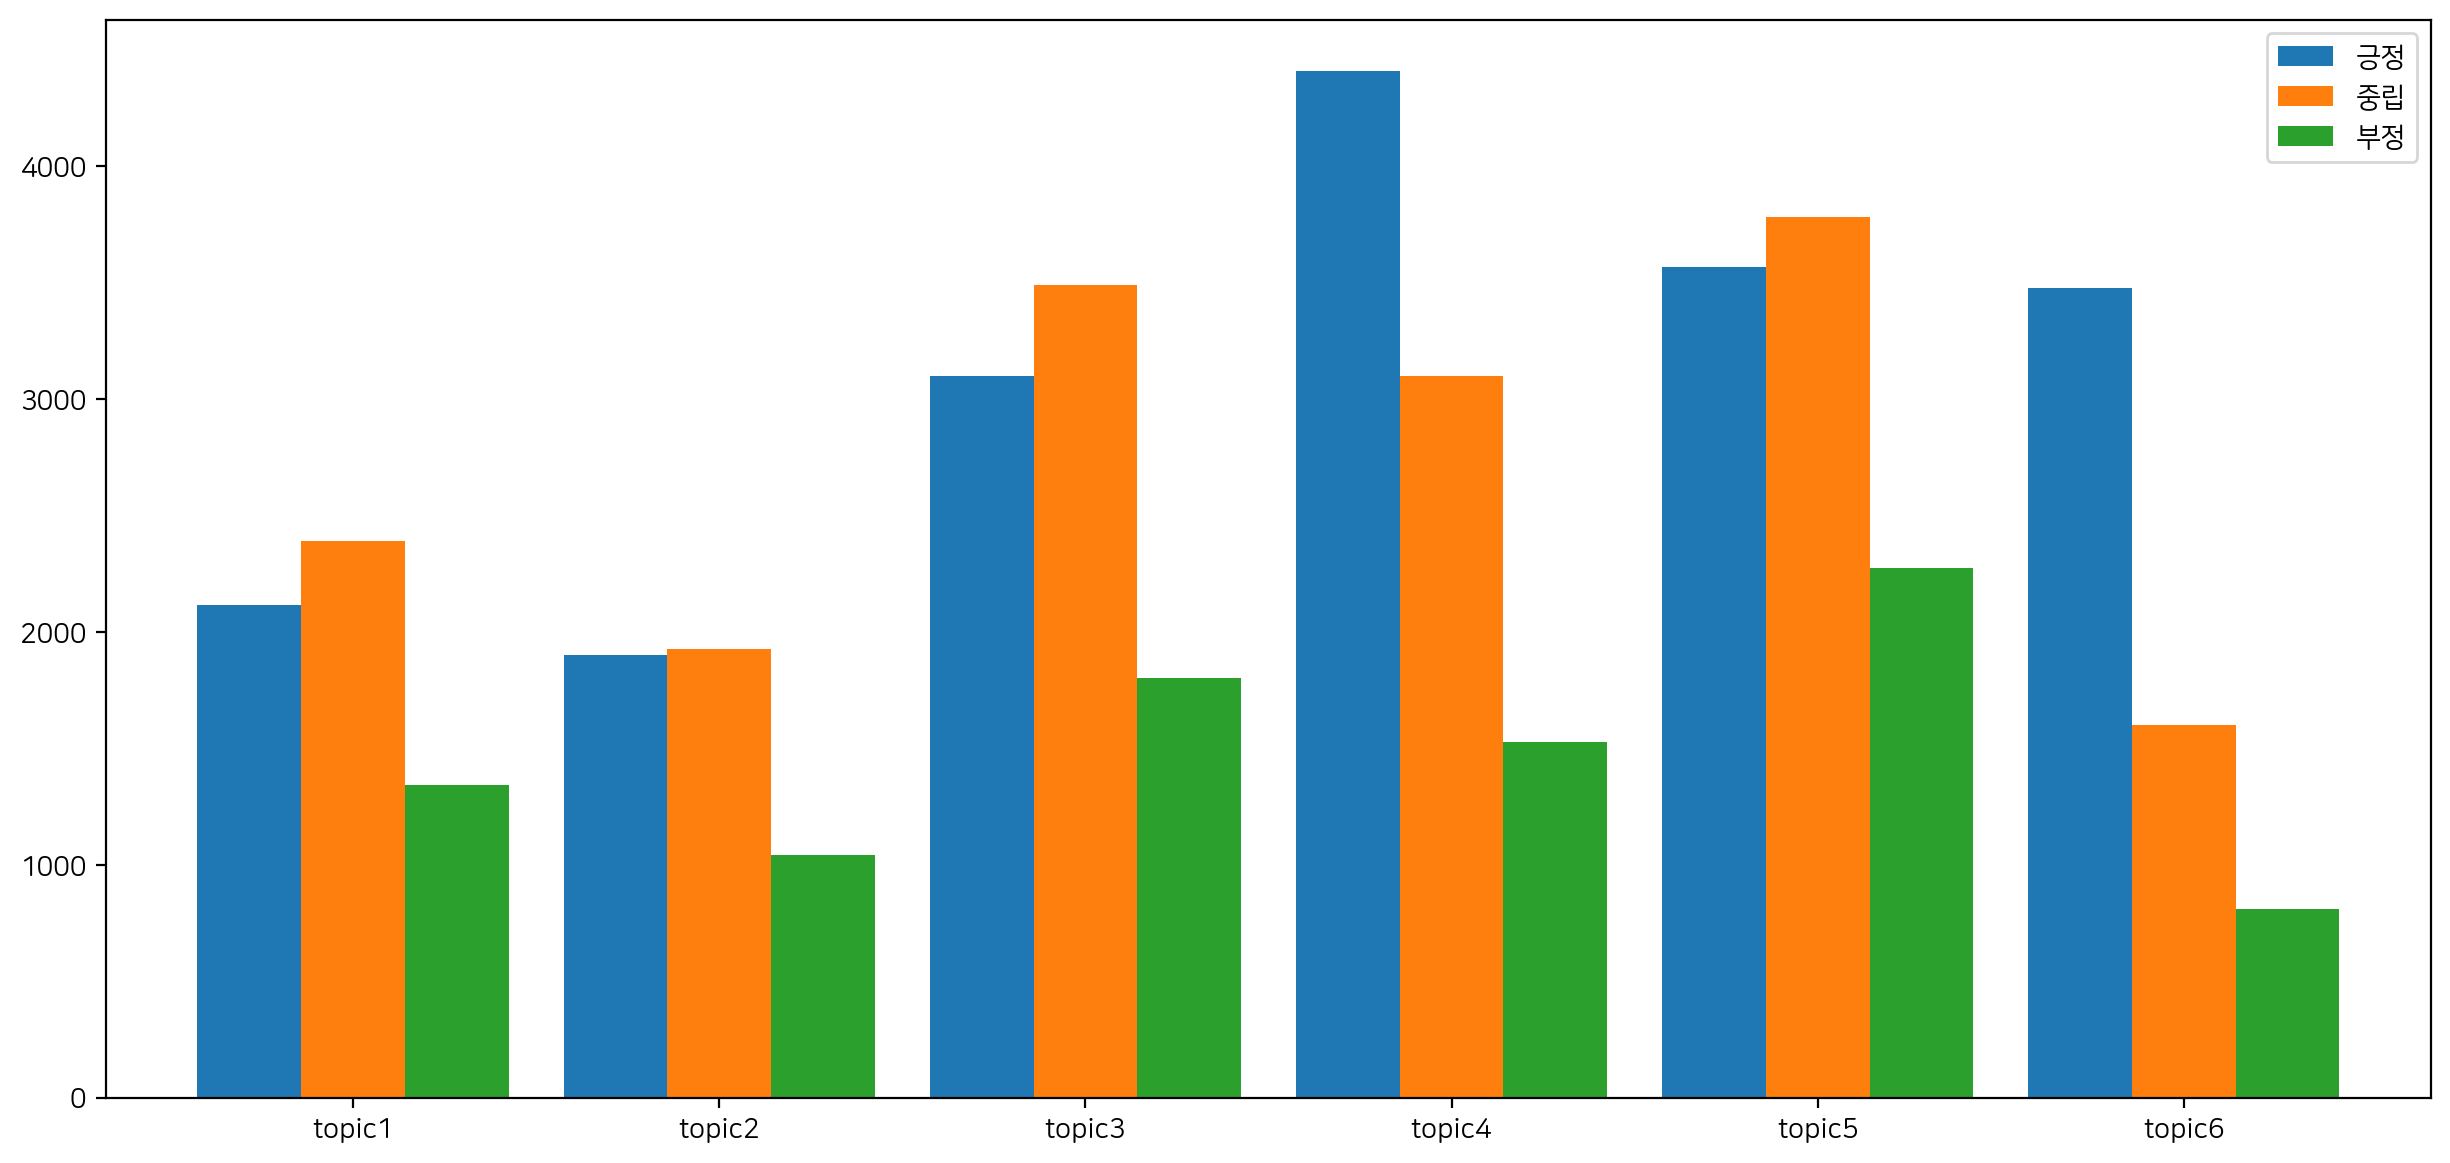

In [20]:
# 토픽별 감성값 막대 그래프
senti_plot = senti_bar.plot(kind='bar', figsize=(15,7), rot=0, width = 0.85)  

## 토픽별 극성에 따른 어휘 비율 plot

In [21]:
# 토픽별 감성 빈도수 막대 그래프
senti_bar = pd.DataFrame([[senti_0[1],senti_0[3],senti_0[5]],
                          [senti_1[1],senti_1[3],senti_1[5]],
                          [senti_2[1],senti_2[3],senti_2[5]],
                          [senti_3[1],senti_3[3],senti_3[5]],
                          [senti_4[1],senti_4[3],senti_4[5]],
                          [senti_5[1],senti_5[3],senti_5[5]]],
                         index=['topic1','topic2','topic3','topic4','topic5','topic6'], 
                         columns=['긍정','중립','부정'])

In [22]:
senti_bar

긍정        중립        부정
topic1  0.361957  0.408484  0.229559
topic2  0.390179  0.395932  0.213889
topic3  0.369363  0.415891  0.214746
topic4  0.487986  0.343151  0.168863
topic5  0.370879  0.392928  0.236193
topic6  0.590484  0.271708  0.137808

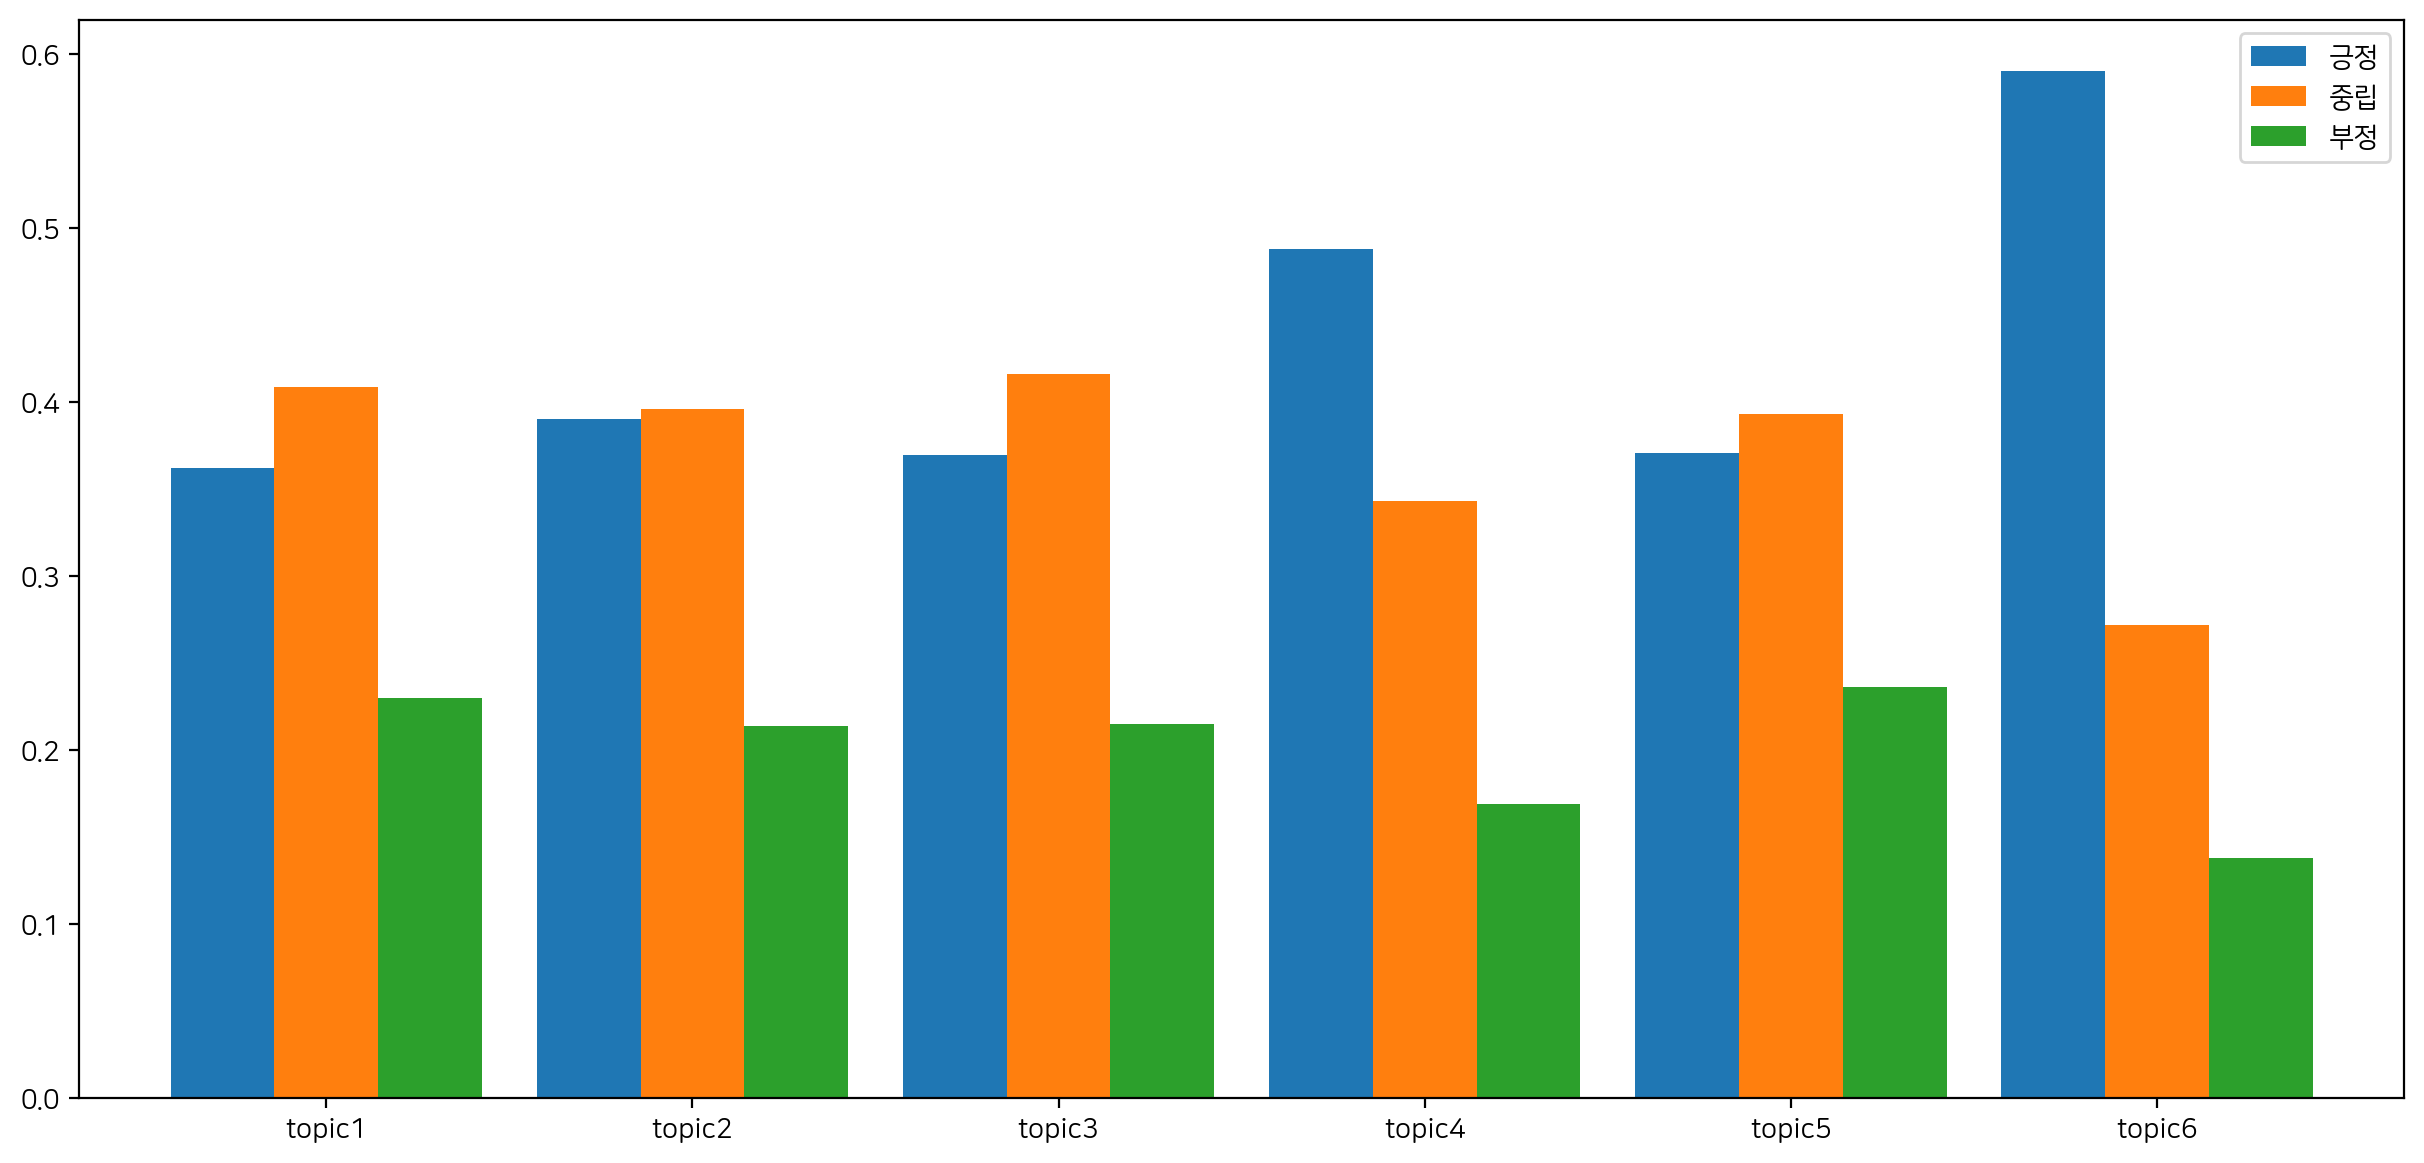

In [23]:
# 토픽별 감성 비율
senti_plot = senti_bar.plot(kind='bar', figsize=(15,7), rot=0, width = 0.85)  

## **topic1:국민염금 공단사이트 관련 인거같음  ,  topic2:연기금 관련인거같음    ,topic3:국민연금 제도관련 같음    ,topic4:국민염금 수령에 관한 내용 같음    ,topic5: 국민연금 납부에 대한 내용같음    ,topic6: 좀애매함 <-- 워드 클라우드 보고 판단하였다**

## topic 3,4,5 에 대해

In [34]:
# 토픽별 감성 비율 데이터프레임 생성
graph = pd.DataFrame([senti_2,senti_3,senti_4],
                  index=['topic3','topic4','topic5'],
                  columns=[['긍정','긍정','중립','중립','부정','부정'],['빈도','비율','빈도','비율','빈도','비율']])

In [35]:
graph

긍정              중립              부정          
          빈도        비율    빈도        비율    빈도        비율
topic3  3096  0.369363  3486  0.415891  1800  0.214746
topic4  4407  0.487986  3099  0.343151  1525  0.168863
topic5  3566  0.370879  3778  0.392928  2271  0.236193

In [36]:
# 토픽별 감성 빈도수 막대 그래프
senti_bar = pd.DataFrame([
                          [senti_2[0],senti_2[2],senti_2[4]],
                          [senti_3[0],senti_3[2],senti_3[4]],
                          [senti_4[0],senti_4[2],senti_4[4]]],
                         index=['topic2','topic3','topic4'], 
                         columns=['긍정','중립','부정'])

In [37]:
senti_bar

긍정    중립    부정
topic2  3096  3486  1800
topic3  4407  3099  1525
topic4  3566  3778  2271

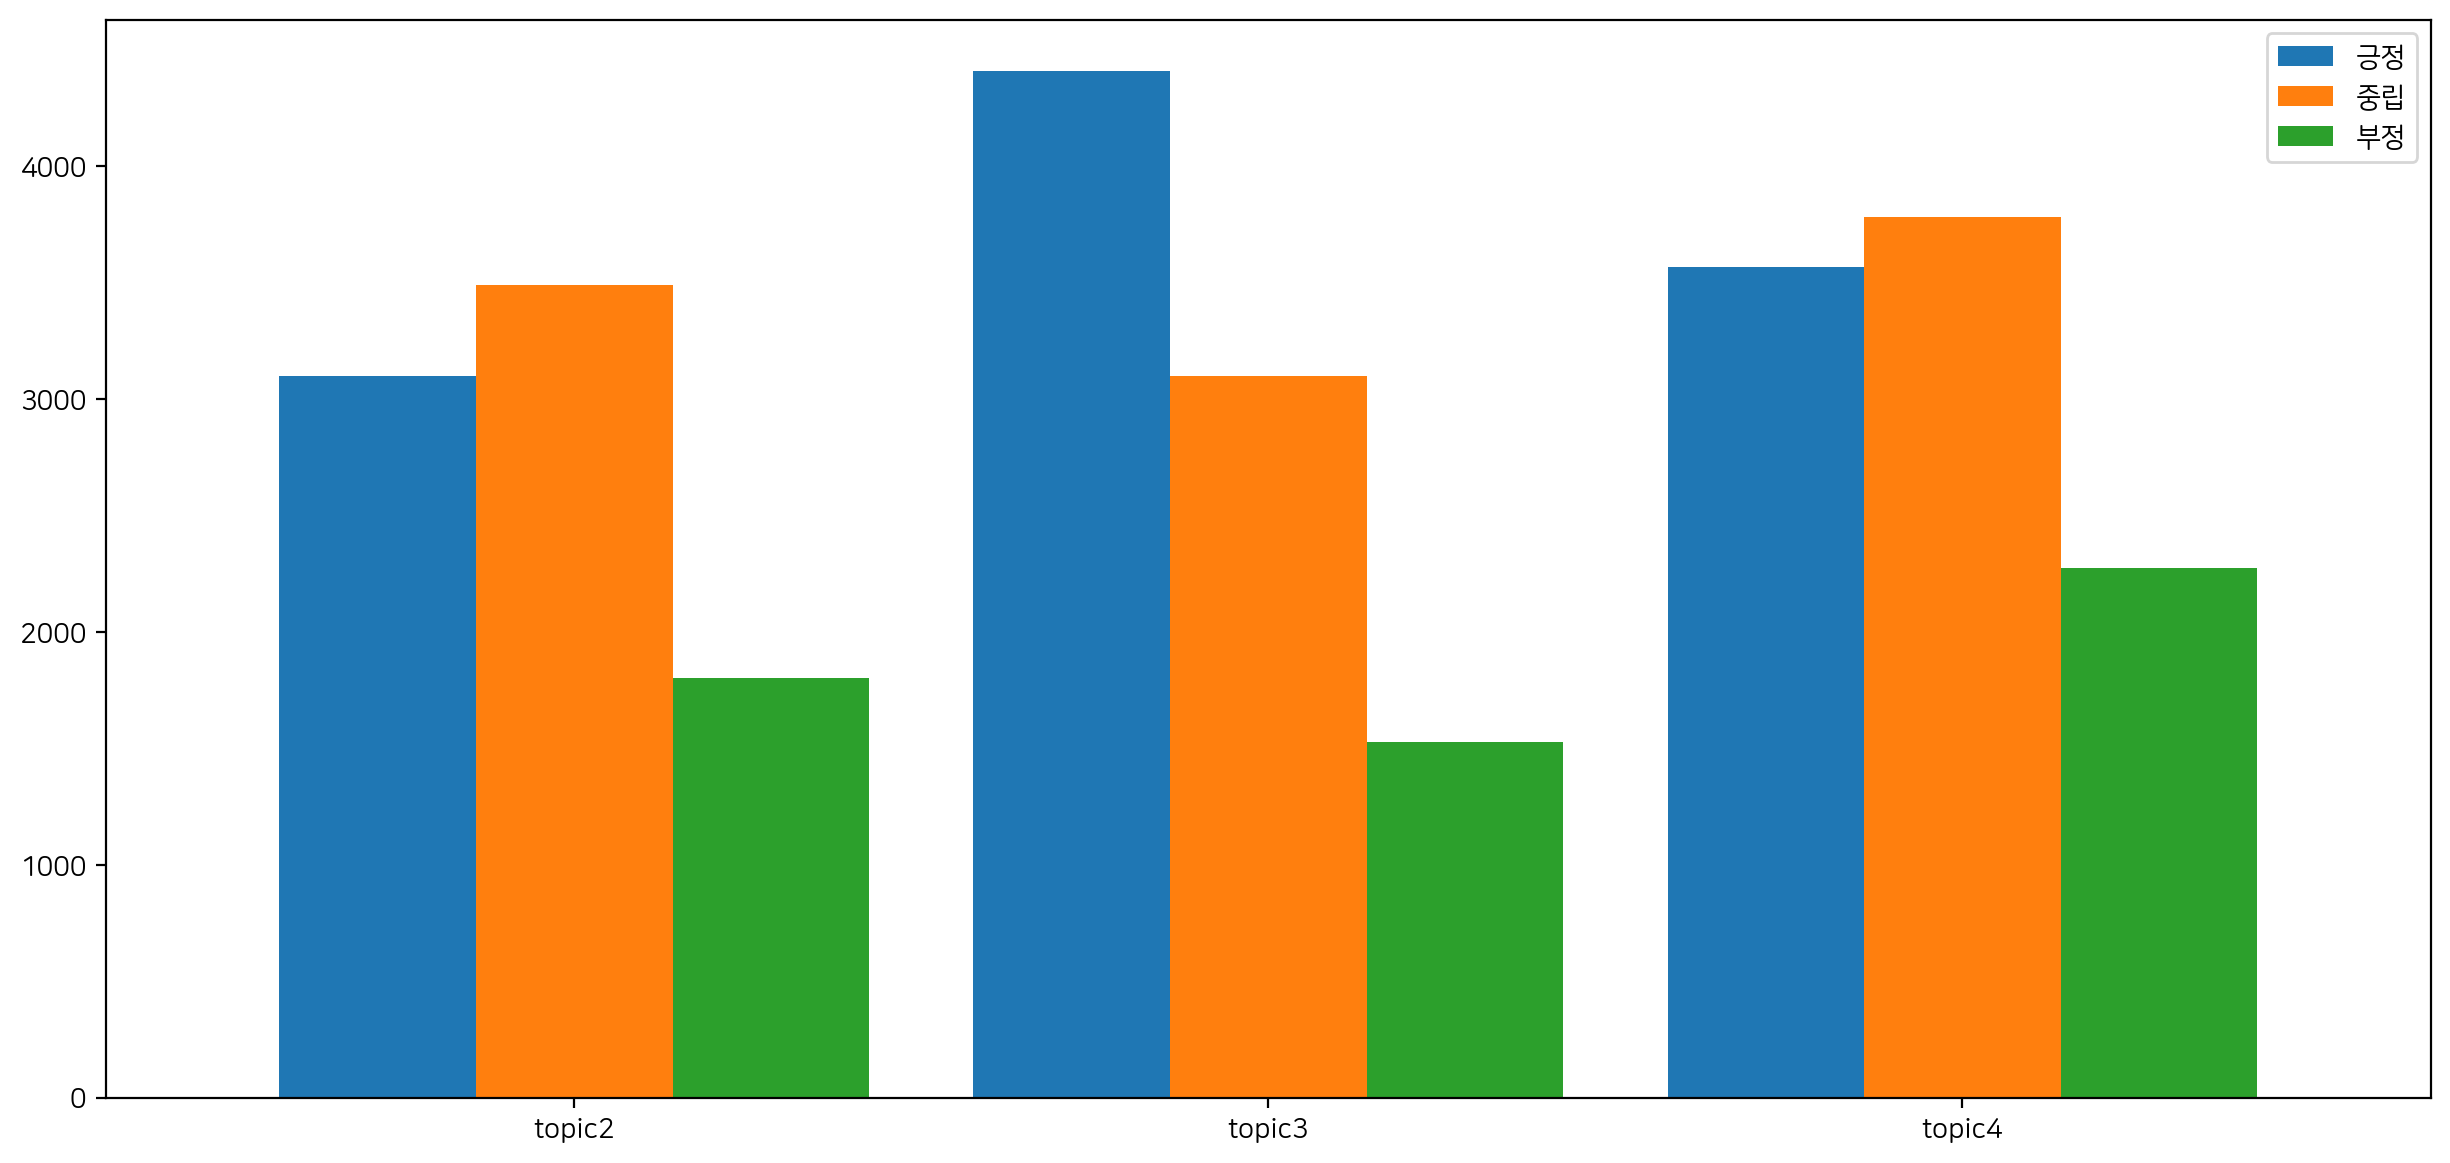

In [38]:
# 토픽별 감성 비율
senti_plot = senti_bar.plot(kind='bar', figsize=(15,7), rot=0, width = 0.85)  

### **국민 연금에 대한 좋은 인식을 가지고 있을 만한 대상자들은 국민 연금을 곧 수령하거나 이미 수령을 받고 있는 대상이 긍정일 확률이 높다고 생각한다. 현재 대한민국은 현재 인구의 분포가 청년 층이 상대적으로 적기 때문에 국민 연금에 대한 긍정적인 감정이 우세한게 아닐까 생각**

### 감성분석( 모든 토픽 전체)

In [24]:
# 전체 평균 score에 따른 감성 클래스 구분
# 전체 평균 score 0.3 초과  -> 긍정
# 전체 평균 score -0.3 이상 0.3 이하  -> 중립
# 전체 평균 score -0.3 미만  -> 부정

senti_total = [0,0,0,0,0,0]

for i in trange(len(total_docs)):
    if total_docs['score'].iloc[i] > 0.3:  
        senti_total[0] = senti_total[0] + 1
    elif total_docs['score'].iloc[i] <= 0.3 and total_docs['score'].iloc[i] >= -0.3:
        senti_total[2] = senti_total[2] + 1
    else:
        senti_total[4] = senti_total[4] + 1

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43626/43626 [00:00<00:00, 88482.09it/s]


In [25]:
# 전체 감성 클래스별 비율 계산
for i in trange(1,7,2):
    senti_total[i] = senti_total[i-1] / (senti_total[0] + senti_total[2] +senti_total[4])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 104857.60it/s]


In [26]:
# 전체 감성 비율 데이터프레임 생성
graph = pd.DataFrame([senti_total], index=['전체'],
                  columns=[['긍정','긍정','중립','중립','부정','부정'],['빈도','비율','빈도','비율','빈도','비율']])

In [27]:
graph

긍정               중립              부정          
       빈도        비율     빈도        비율    빈도        비율
전체  18559  0.425411  16277  0.373103  8790  0.201485

In [28]:
# 전체 감성 빈도수 막대 그래프
senti_bar = pd.DataFrame([[senti_total[0],senti_total[2],senti_total[4]],],
                        index = ['전체'], columns = ['긍정','중립','부정'])

In [29]:
senti_bar

긍정     중립    부정
전체  18559  16277  8790

<Axes: >

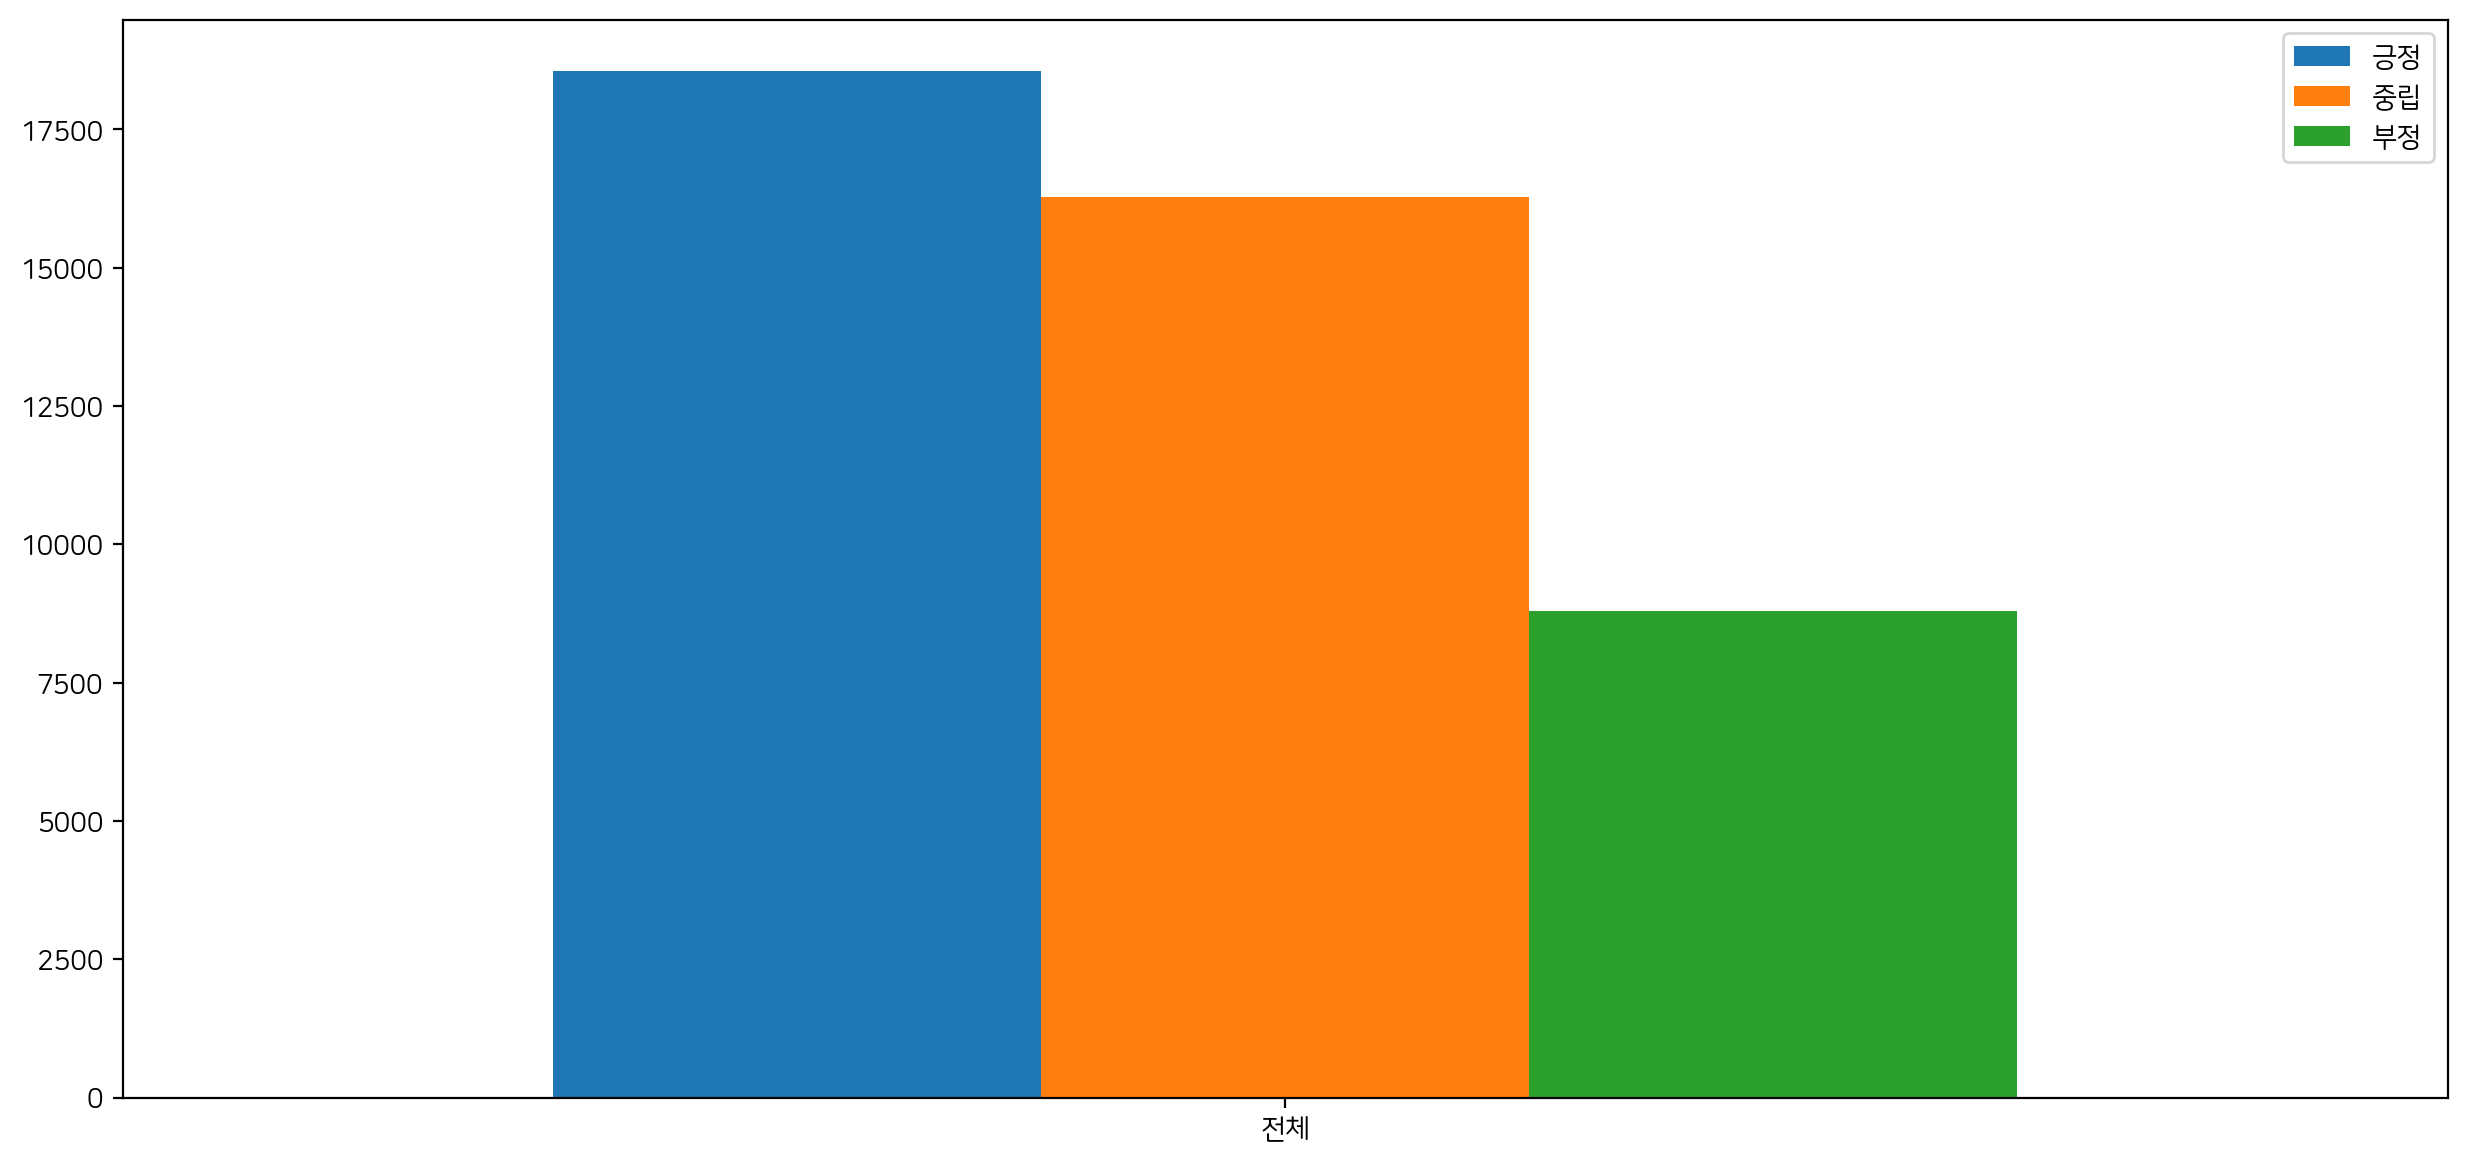

In [30]:
senti_bar.plot(kind='bar', figsize=(15,7), rot=0, width = 0.85)

### Emolex

In [ ]:
import itertools # 반복 객체를 유용하게 다루는 라이브러리
import re  # 정규표현식을 사용할 수 있는 라이브러리
from sklearn.feature_extraction.text import TfidfVectorizer  # tf-idf값을 구하기 위해서 사용
from collections import defaultdict # 딕셔너리 기본값을 설정할 수 있는 라이브러리
from collections import Counter   # 단어들을 쉽게 집계하는 라이브러리
from wordcloud import WordCloud # Word Cloud 만들기
import matplotlib
import matplotlib.pyplot as plt   # 시각화하는 라이브러리

from IPython.display import set_matplotlib_formats #matplotlib의 plot 출력 형식 지정 Ex: set_matplotlib_formats('pdf', 'svg'), svg(Scalable Vector Graphics)
from gensim import corpora, models # 토픽 모델링을 위한 라이브러리
set_matplotlib_formats('retina')   # 고해상도 시각화
font_path = '../data/NanumGothicBold.ttf'  # 폰트 경로 지정
from sklearn.cluster import KMeans # KMeans 군집화 알고리즘을 사용하는 라이브러리
from tqdm import tqdm_notebook # progress bar
from tqdm import tqdm # 진행률 피드백 라이브러리
from tqdm import trange, notebook
from matplotlib import rc, font_manager
import seaborn as sns
import pickle
import pandas as pd
import numpy as np
from datetime import datetime
import warnings

# 경고 메시지를 무시하고 숨기거나
warnings.filterwarnings(action='ignore')

/tmp/ipykernel_19331/3102239397.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')   # 고해상도 시각화


In [40]:
from tqdm import trange, notebook

In [ ]:
data= pd.read_pickle("../data/analysis_data/cafeblog/pension_blogcafe_topic_doc.pkl")

In [48]:
data

title  \
0               국세체납 건강보험료 미납시 국민연금 연체 압류 때문에 고민한다면   
1                국세체납 건강보험료 미납시 국민연금 연체 압류 어떻게 해결할까   
2            국세체납 건강보험료 미납 국민연금 연체 압류 등 세금 문제 해결하려면   
3       국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 면책 가능할까   
4      개인사업자 사업자등록 건강보험료 국민연금 납부는 어떻게 주부 프리랜서의 변신 1   
...                                             ...   
43621                       안녕하세요 은퇴계획 가르쳐 주실분 구해요ㅠ   
43622            앙마 더 내고 더 받는 국민연금 세대 이기주의 노후 불안 해소   
43623                           충주 채용 성심농아재활원 직원 채용   
43624                        늙은 유럽을 향해 달려가고 있는 한국사회   
43625                          태국부적레인보우 리클라이 펜턴트 후기   

                                                     doc like_cnt  \
0      해마다 매년 경제가 불황이라는 뉴스가 나오는 것 같다고 했습니다 올해도 어김없이 마...        4   
1      경제가 침체되다 보니 생활비 부족뿐만 아니라 국세체납부터 시작해 각종 부분에서 연체...        5   
2      우리나라 국민은 납세의 의무를 이행해야 된다고 했습니다 그러나 국세체납 금액이 너무...        8   
3      국세체납 건강보험료 미납시 국민연금 연체 압류 등 개인회생 세금 면책 가능할까 경제...        3   
4      사업자등록하면어떤 일이 벌어지는지 진짜알고 계신건가요 개인사업자 준비중이신가요안녕하...       71   
...                                                  ...      ...   
43621  본인을 어필 할 수 있는 사진 1장 혹은 본인 사진 본인사진이 아니여도 됩니다  현...      NaN   
43622  더 내고 더 받는 국민연금 세대 이기주의 노후 불안 해소40대 665 50대 666...      NaN   
43623  충주 성심농아재활원에서 아래와 같이 채용정보가 올라왔습니다해당되시는 회원님들께서는 ...      NaN   
43624  삼성스토어 용인처인본점 1주년 특별전 단10일간54513 httpsnaverme5A...      NaN   
43625   아타노르 사이트 들어가다  이 펜턴트 후기 내가 썼었나안 쓴 생각이 들어 후기를 ...      NaN   

       comment_cnt                                       comment_list img_cnt  \
0             <NA>                                               null      12   
1             <NA>                                               null      12   
2             <NA>                                               null      11   
3             <NA>                                               null      14   
4               26  비밀 댓글입니다지역가입자 전환되면 납부하는 보험료가 상당하다 하더라구요 ㅠㅠ마음의 ...       7   
...            ...                                                ...     ...   
43621           13  이곳에 좀 더 상세한 수입과 지출에 대해 소개하세요 사람마다 경험과 지식으로 도움을...     NaN   
43622            1                         이런건 대체 누가 정한거죠 내는건 우리가 내는데     NaN   
43623            0                                                        NaN   
43624           16  글과는 별로 상관없는 얘기인데 한국은 내수가 경제 성장에 기여한 적이 과거에 없었고...     NaN   
43625            5  뽐뿌 왔는데 품절인가 보네요옹태국부적이라 치면 있습니다유엇 탈리스만 메뉴에 없어서 ...     NaN   

      div_cnt  like   img   div  \
0           0  <NA>  <NA>  <NA>   
1           0  <NA>  <NA>  <NA>   
2           0  <NA>  <NA>  <NA>   
3           0  <NA>  <NA>  <NA>   
4           0  <NA>  <NA>  <NA>   
...       ...   ...   ...   ...   
43621     NaN     2     1     0   
43622     NaN     0     2     0   
43623     NaN     0     0     0   
43624     NaN     9     0     0   
43625     NaN     7     2     0   

                                    title_token_list_pos  \
0      [(국세, NNG), (체납, NNG), (건강, NNP), (보험료, NNP), ...   
1      [(국세, NNG), (체납, NNG), (건강, NNP), (보험료, NNP), ...   
2      [(국세, NNG), (체납, NNG), (건강, NNP), (보험료, NNP), ...   
3      [(국세, NNG), (체납, NNG), (건강, NNP), (보험료, NNP), ...   
4      [(개인, NNG), (사업자, NNP), (사업자, NNP), (등록, NNP),...   
...                                                  ...   
43621  [(안녕하세요, NNP), (은퇴, NNG), (계획, NNG), (가르치, VV)...   
43622  [(앙, IC), (마, IC), (더, MAG), (내, VV), (고, EC),...   
43623  [(충주, NNP), (채용, NNG), (성심, NNP), (농아, NNP), (...   
43624  [(늙, VV), (은, ETM), (유럽, NNP), (을, JKO), (향하, ...   
43625  [(태국, NNP), (부적, NNP), (레인보우, NNP), (리, NNB), ...   

                               title_token_noun  \
0                  [국세, 체납, 건강, 미납, 연체, 압류, 고민]   
1                  [국세, 체납, 건강, 미납, 연체, 압류, 해결]   
2          [국세, 체납, 건강, 미납, 연체, 압류, 세금, 문제, 해결]   
3      [국세, 체납, 건강, 미납, 연체, 압류, 개인, 회생, 세금, 면책]   
4              [개인, 사업자, 사업자, 건강, 주부, 프리랜서, 변신]   
...                                         ...   
43621                                      [은퇴]   
43622                        [세대,

In [ ]:
# 한국어 감성사전 파일 불러오기
nrc = pd.read_table("../data/Korean-NRC-EmoLex.txt", engine = "python", header = None, sep = "\t")

In [50]:
# 감성사전 열 이름 지정 및 불필요한 행 제거
nrc.columns = nrc.iloc[0]
nrc = nrc[1:]
nrc.reset_index(drop=True, inplace=True)  #기존인텍스를 삭제하고 Dataframe을 수정
nrc

0     English Word anger anticipation disgust fear joy negative positive  \
0            aback     0            0       0    0   0        0        0   
1           abacus     0            0       0    0   0        0        0   
2          abandon     0            0       0    1   0        1        0   
3        abandoned     1            0       0    1   0        1        0   
4      abandonment     1            0       0    1   0        1        0   
...            ...   ...          ...     ...  ...  ..      ...      ...   
14149         zone     0            0       0    0   0        0        0   
14150          zoo     0            0       0    0   0        0        0   
14151   zoological     0            0       0    0   0        0        0   
14152      zoology     0            0       0    0   0        0        0   
14153         zoom     0            0       0    0   0        0        0   

0     sadness surprise trust Korean Word  
0           0        0     0          당황  
1           0        0     1          주판  
2           1        0     0         버리다  
3           1        0     0         버려진  
4           1        1     0          포기  
...       ...      ...   ...         ...  
14149       0        0     0           존  
14150       0        0     0         동물원  
14151       0        0     0         동물학  
14152       0        0     0         동물학  
14153       0        0     0           줌  

[14154 rows x 12 columns]

In [51]:
data.shape

(43626, 17)

In [52]:
len(nrc['Korean Word'])

14154

In [53]:
# 데이터프레임에 감성사전의 감성값 삽입
s_word = []
values = []

for word in notebook.tqdm(data['doc']):
    temp_s_word=[]   # 문서에서 발견된 감성사전의 단어 리스트 초기화
    temp_value = [0,0,0,0,0,0,0,0,0,0]   # 초기 감성값 리스트 초기화
    
# 감성사전의 단어와 현재 문서의 단어를 비교
    for i in range(1, len(nrc)):
        if nrc['Korean Word'][i] in word:
            if len(nrc['Korean Word'][i]) > 1:
                temp_s_word.append(nrc['Korean Word'][i])
                b = list(map(int, nrc.iloc[i,1:11].tolist())) # 1~10 번째 변수(감성어휘)를 리스트로 반환한 후 정수로 변환 
                temp_value = [x + y for x, y in zip(temp_value,b)] # temp_value & b 변수를 쌍으로 묶어 합쳐라
    s_word.append(temp_s_word) # 현재 문서에서 발견된 감성사전의 단어 리스트를 전체 리스트에 추가
    values.append(temp_value)  # 현재 문서에서 발견된 감성사전의 감성값 리스트를 전체 리스트에 추가

# 결과 데이터프레임에 감성사전 결과 삽입
data=data.assign(sentiword = s_word,values=values) # 결과 데이터프레임에 삽입

  0%|          | 0/43626 [00:00<?, ?it/s]

In [54]:
data.head(2)

title  \
0  국세체납 건강보험료 미납시 국민연금 연체 압류 때문에 고민한다면   
1   국세체납 건강보험료 미납시 국민연금 연체 압류 어떻게 해결할까   

                                                 doc like_cnt  comment_cnt  \
0  해마다 매년 경제가 불황이라는 뉴스가 나오는 것 같다고 했습니다 올해도 어김없이 마...        4         <NA>   
1  경제가 침체되다 보니 생활비 부족뿐만 아니라 국세체납부터 시작해 각종 부분에서 연체...        5         <NA>   

  comment_list img_cnt div_cnt  like   img   div  \
0         null      12       0  <NA>  <NA>  <NA>   
1         null      12       0  <NA>  <NA>  <NA>   

                                title_token_list_pos  \
0  [(국세, NNG), (체납, NNG), (건강, NNP), (보험료, NNP), ...   
1  [(국세, NNG), (체납, NNG), (건강, NNP), (보험료, NNP), ...   

               title_token_noun  \
0  [국세, 체납, 건강, 미납, 연체, 압류, 고민]   
1  [국세, 체납, 건강, 미납, 연체, 압류, 해결]   

                                      doc_token_noun  \
0  [경제, 불황, 경기, 코로나, 자영업자, 기업, 회사, 구조조정, 최악, 상황, ...   
1  [경제, 침체, 보니, 생활비, 부족, 국세, 체납, 시작, 부분, 연체, 시작, ...   

                                  doc_token_list_pos comment_token_list_pos  \
0  [(하, VV), (아, EC), (마다, JX), (매년, MAG), (경제, N...           [(null, SL)]   
1  [(경제, NNG), (가, JKS), (침체, NNG), (되, XSV), (다,...           [(null, SL)]   

  comment_token_noun  doc_topic  \
0                 []          4   
1                 []          4   

                                           sentiword  \
0  [이상, 행동, 실제, 추가, 조정, 행정, 유리한, 고통받는, 고통, 전에, 동의...   
1  [중지, 이상, 축적, 추가, 주소, 조정, 관리, 진술서, 긍정적, 전에, 경고,...   

                                     values  
0  [20, 25, 15, 29, 11, 50, 48, 29, 10, 31]  
1   [16, 35, 8, 27, 10, 49, 64, 12, 10, 37]

In [ ]:
data.to_pickle("../data/analysis_data/cafeblog/pension_cafeblog_emolex.pkl")

In [56]:
ff= data.copy()

In [57]:
# 데이터프레임 복원
import pandas as pd
total_docs = pd.DataFrame()
total_docs['doc'] = ff['doc']
total_docs['doc_token_noun'] = ff['doc_token_noun']
total_docs['doc_topic'] = ff['doc_topic']
total_docs['sentiword'] = ff['sentiword']
total_docs['values'] = ff['values']
total_docs.head(2)

doc  \
0  해마다 매년 경제가 불황이라는 뉴스가 나오는 것 같다고 했습니다 올해도 어김없이 마...   
1  경제가 침체되다 보니 생활비 부족뿐만 아니라 국세체납부터 시작해 각종 부분에서 연체...   

                                      doc_token_noun  doc_topic  \
0  [경제, 불황, 경기, 코로나, 자영업자, 기업, 회사, 구조조정, 최악, 상황, ...          4   
1  [경제, 침체, 보니, 생활비, 부족, 국세, 체납, 시작, 부분, 연체, 시작, ...          4   

                                           sentiword  \
0  [이상, 행동, 실제, 추가, 조정, 행정, 유리한, 고통받는, 고통, 전에, 동의...   
1  [중지, 이상, 축적, 추가, 주소, 조정, 관리, 진술서, 긍정적, 전에, 경고,...   

                                     values  
0  [20, 25, 15, 29, 11, 50, 48, 29, 10, 31]  
1   [16, 35, 8, 27, 10, 49, 64, 12, 10, 37]

In [58]:
# 토픽별 감성값 누적
senti_0 = [0,0,0,0,0,0,0,0,0,0]
senti_1 = [0,0,0,0,0,0,0,0,0,0]
senti_2 = [0,0,0,0,0,0,0,0,0,0]
senti_3 = [0,0,0,0,0,0,0,0,0,0]
senti_4 = [0,0,0,0,0,0,0,0,0,0]
senti_5 = [0,0,0,0,0,0,0,0,0,0]

for i in range(len(total_docs)):
    if total_docs['doc_topic'].iloc[i] == 0:
        senti_0 = [x + y for x, y in zip(senti_0,total_docs.iloc[i,4])]
    elif total_docs['doc_topic'].iloc[i] == 1:
        senti_1 = [x + y for x, y in zip(senti_1,total_docs.iloc[i,4])]
    elif total_docs['doc_topic'].iloc[i] == 2:
        senti_2 = [x + y for x, y in zip(senti_2,total_docs.iloc[i,4])]
    elif total_docs['doc_topic'].iloc[i] == 3:
        senti_3 = [x + y for x, y in zip(senti_3,total_docs.iloc[i,4])]
    elif total_docs['doc_topic'].iloc[i] == 4:
        senti_4 = [x + y for x, y in zip(senti_4,total_docs.iloc[i,4])]
    elif total_docs['doc_topic'].iloc[i] == 5:
        senti_5 = [x + y for x, y in zip(senti_5,total_docs.iloc[i,4])]

In [59]:
# 토픽별 감성값 데이터프레임 생성
graph = pd.DataFrame([senti_0,senti_1,senti_2,senti_3,senti_4, senti_5],
                  index=['topic1','topic2','topic3','topic4','topic5','topic6'],
                  columns=['anger','anticipation','disgust','fear','joy','negative','positive','sadness','surprise','trust'])

In [60]:
graph

anger  anticipation  disgust   fear    joy  negative  positive  \
topic1  30798         59719    27076  47795  31161    100727    142014   
topic2  43672         62064    29652  59929  29814    121733    147772   
topic3  56635        102765    44947  79266  53151    175109    232219   
topic4  37793         97263    29517  61915  49929    134772    203735   
topic5  23908         59988    23353  42918  32907     98642    143139   
topic6  18192         50336    16600  27647  26660     65624    125790   

        sadness  surprise   trust  
topic1    43279     17293  102490  
topic2    42416     23883   87474  
topic3    70496     29579  140655  
topic4    56443     27241  131976  
topic5    41915     16821  101350  
topic6    24011     15288   76715

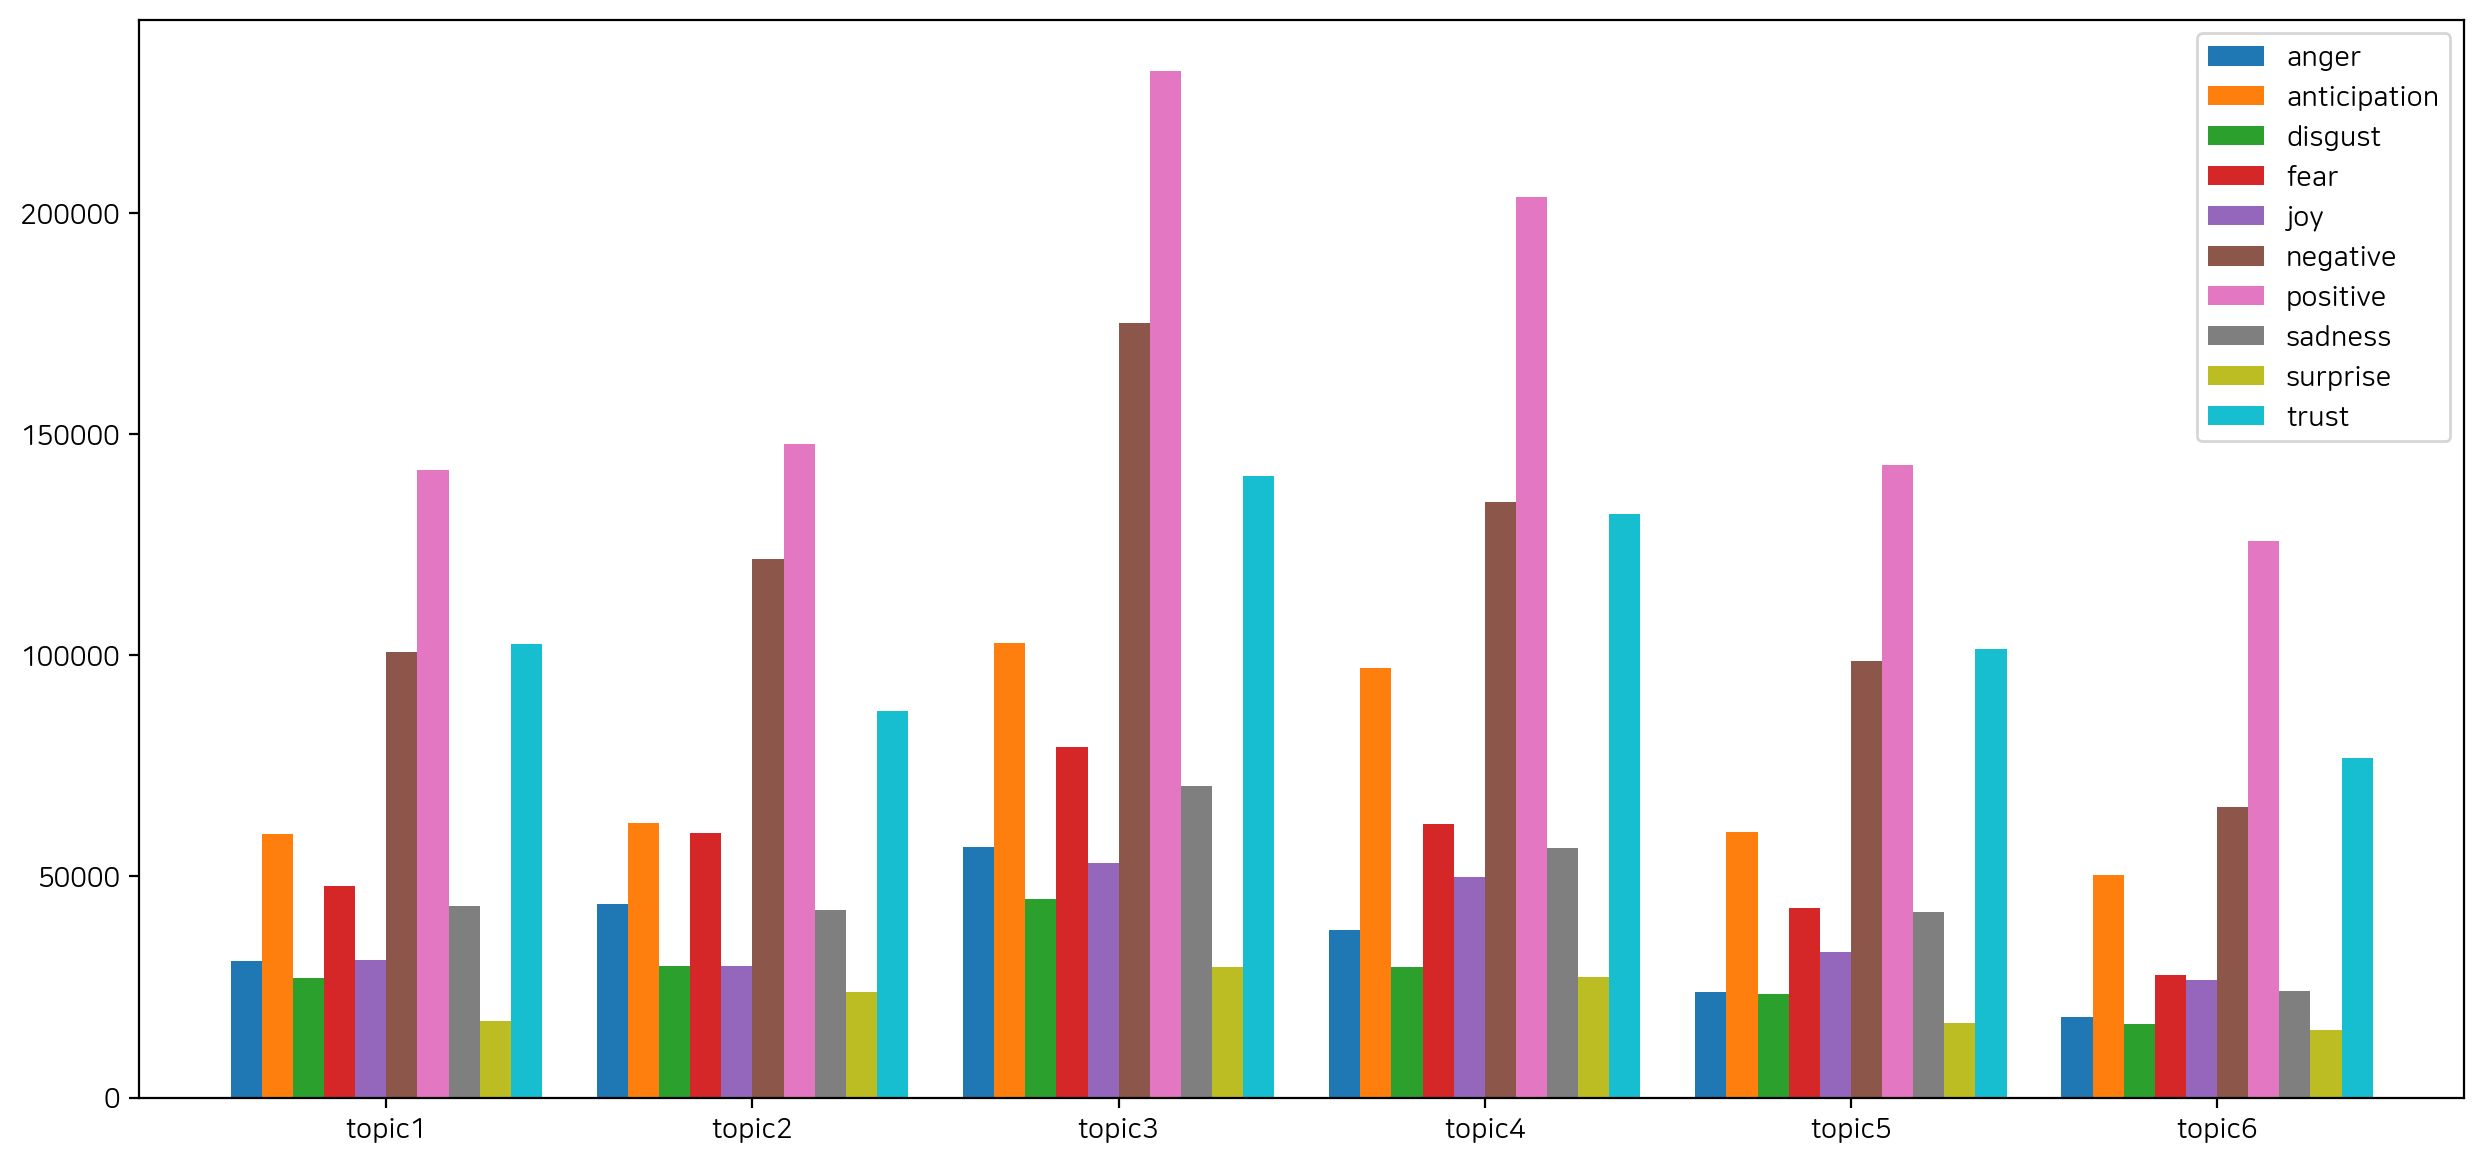

In [61]:
# 토픽별 감성값 막대 그래프
graph_plot = graph.plot(kind='bar', figsize=(15,7), rot=0, width = 0.85)  

In [62]:
# 전체 감성값 누적
senti_total = [0,0,0,0,0,0,0,0,0,0]

for i in trange(len(total_docs)):
    senti_total = [x + y for x, y in zip(senti_total,total_docs.iloc[i,-1])]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43626/43626 [00:00<00:00, 87402.87it/s]


In [63]:
# 전체 감성값 데이터프레임 생성
graph = pd.DataFrame([senti_total],
                  index=['total'],
                  columns=['anger','anticipation','disgust','fear','joy','negative','positive','sadness','surprise','trust'])

In [64]:
graph

anger  anticipation  disgust    fear     joy  negative  positive  \
total  210998        432135   171145  319470  223622    696607    994669   

       sadness  surprise   trust  
total   278560    130105  640660

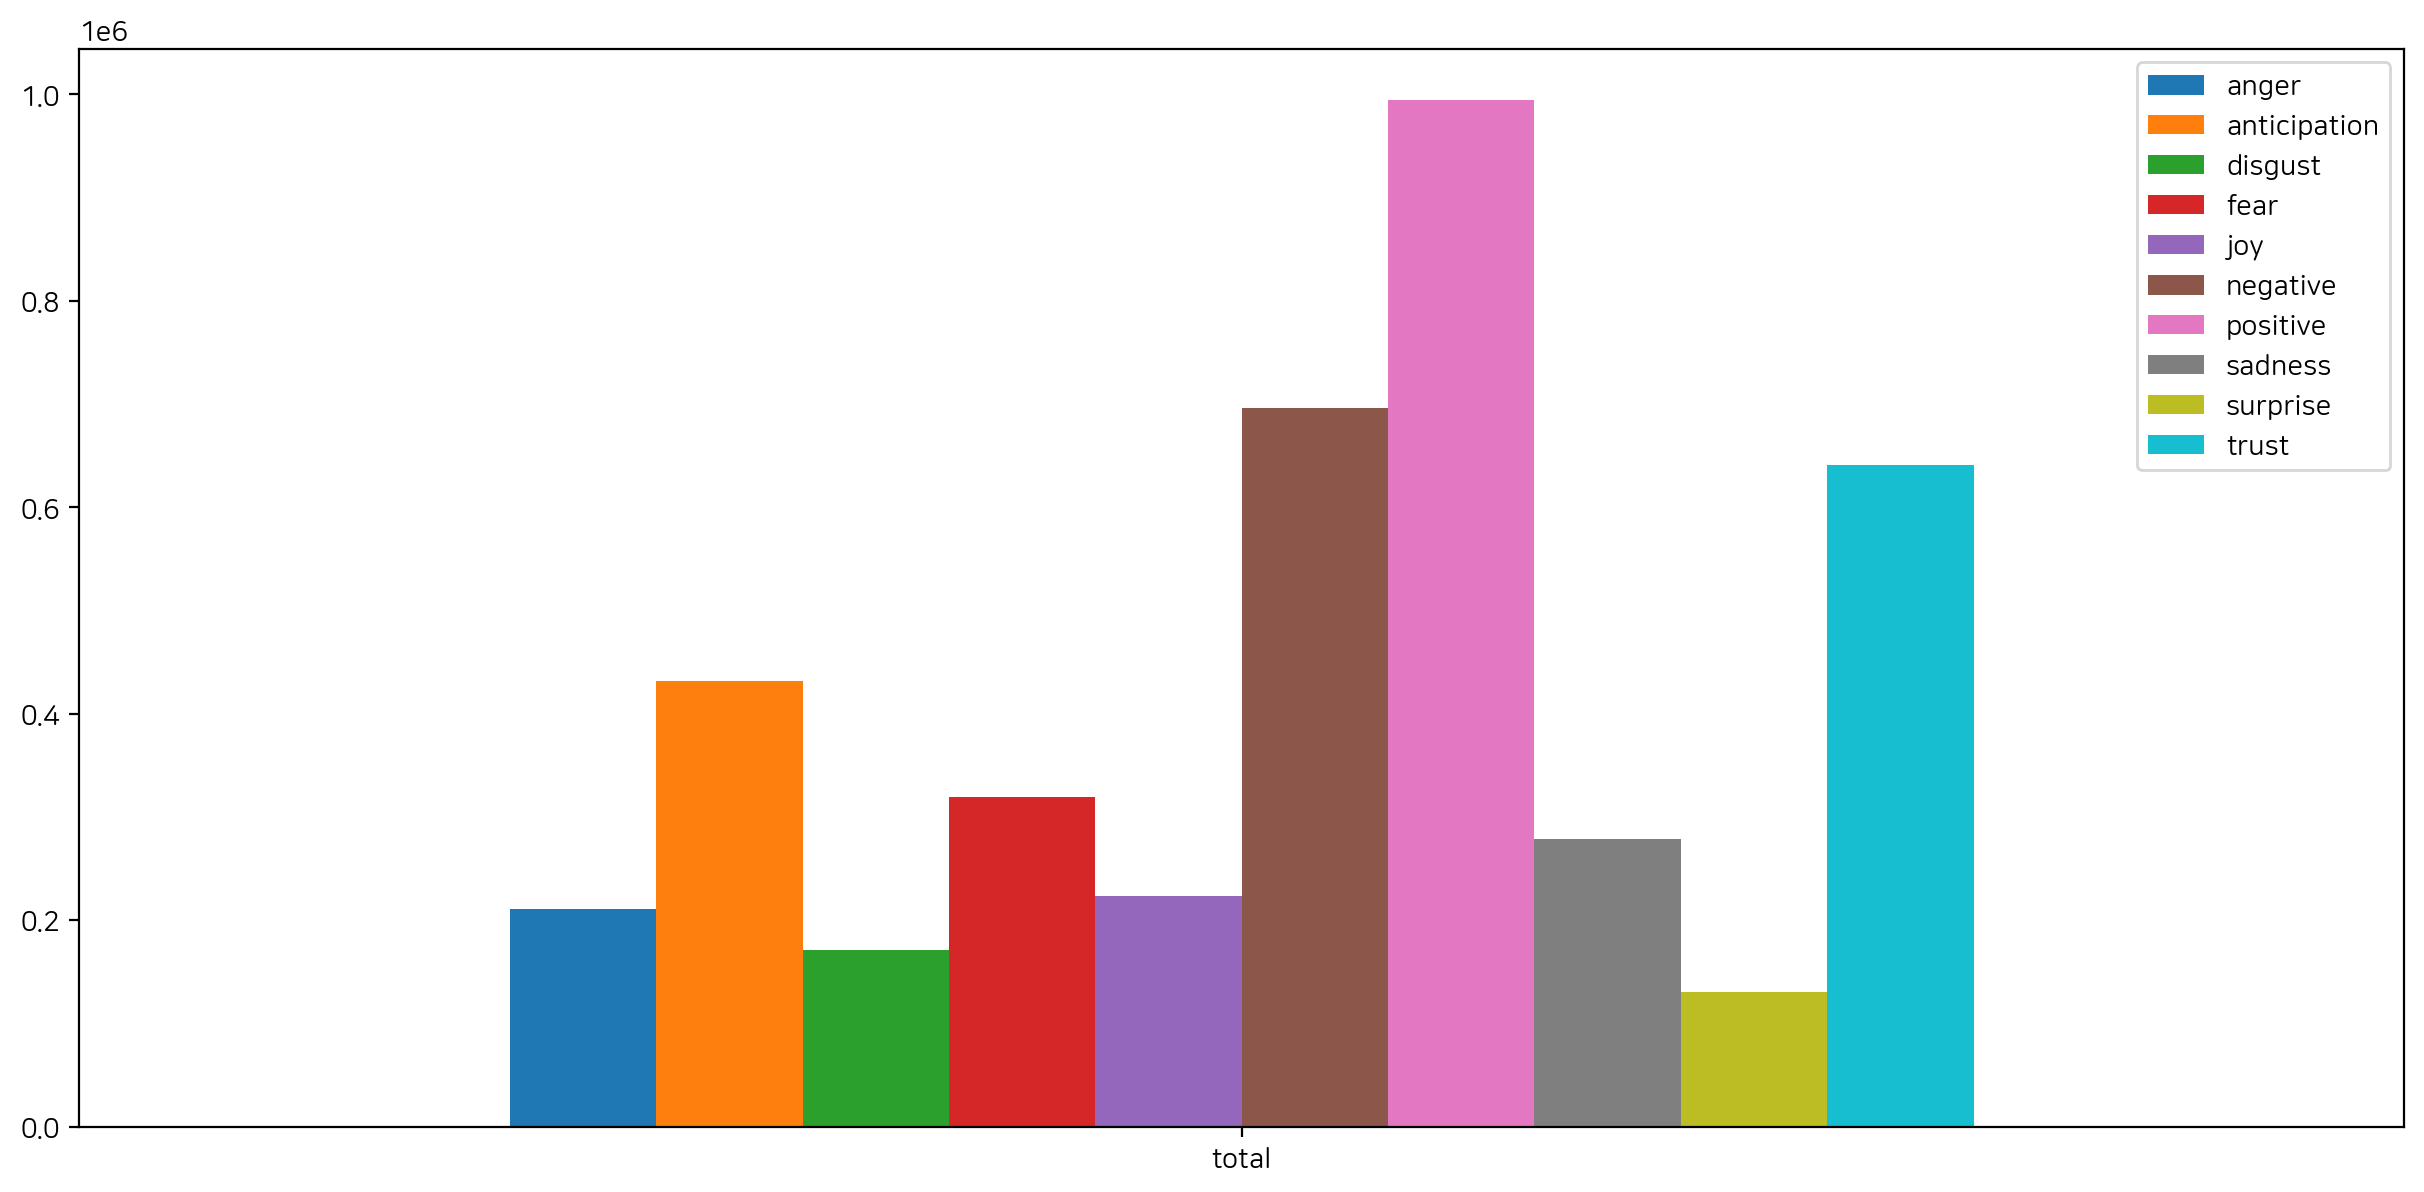

In [65]:
# 전체 감성값 막대 그래프
senti_plot = graph.plot(kind='bar', figsize=(15,7), rot=0, width = 0.85)  

## **topic 3,4,5 만 따로 한번 확인**

In [66]:
# 토픽별 감성값 데이터프레임 생성
graph = pd.DataFrame([senti_2,senti_3,senti_4],
                  index=['topic3','topic4','topic5'],
                  columns=['anger','anticipation','disgust','fear','joy','negative','positive','sadness','surprise','trust'])

In [67]:
graph

anger  anticipation  disgust   fear    joy  negative  positive  \
topic3  56635        102765    44947  79266  53151    175109    232219   
topic4  37793         97263    29517  61915  49929    134772    203735   
topic5  23908         59988    23353  42918  32907     98642    143139   

        sadness  surprise   trust  
topic3    70496     29579  140655  
topic4    56443     27241  131976  
topic5    41915     16821  101350

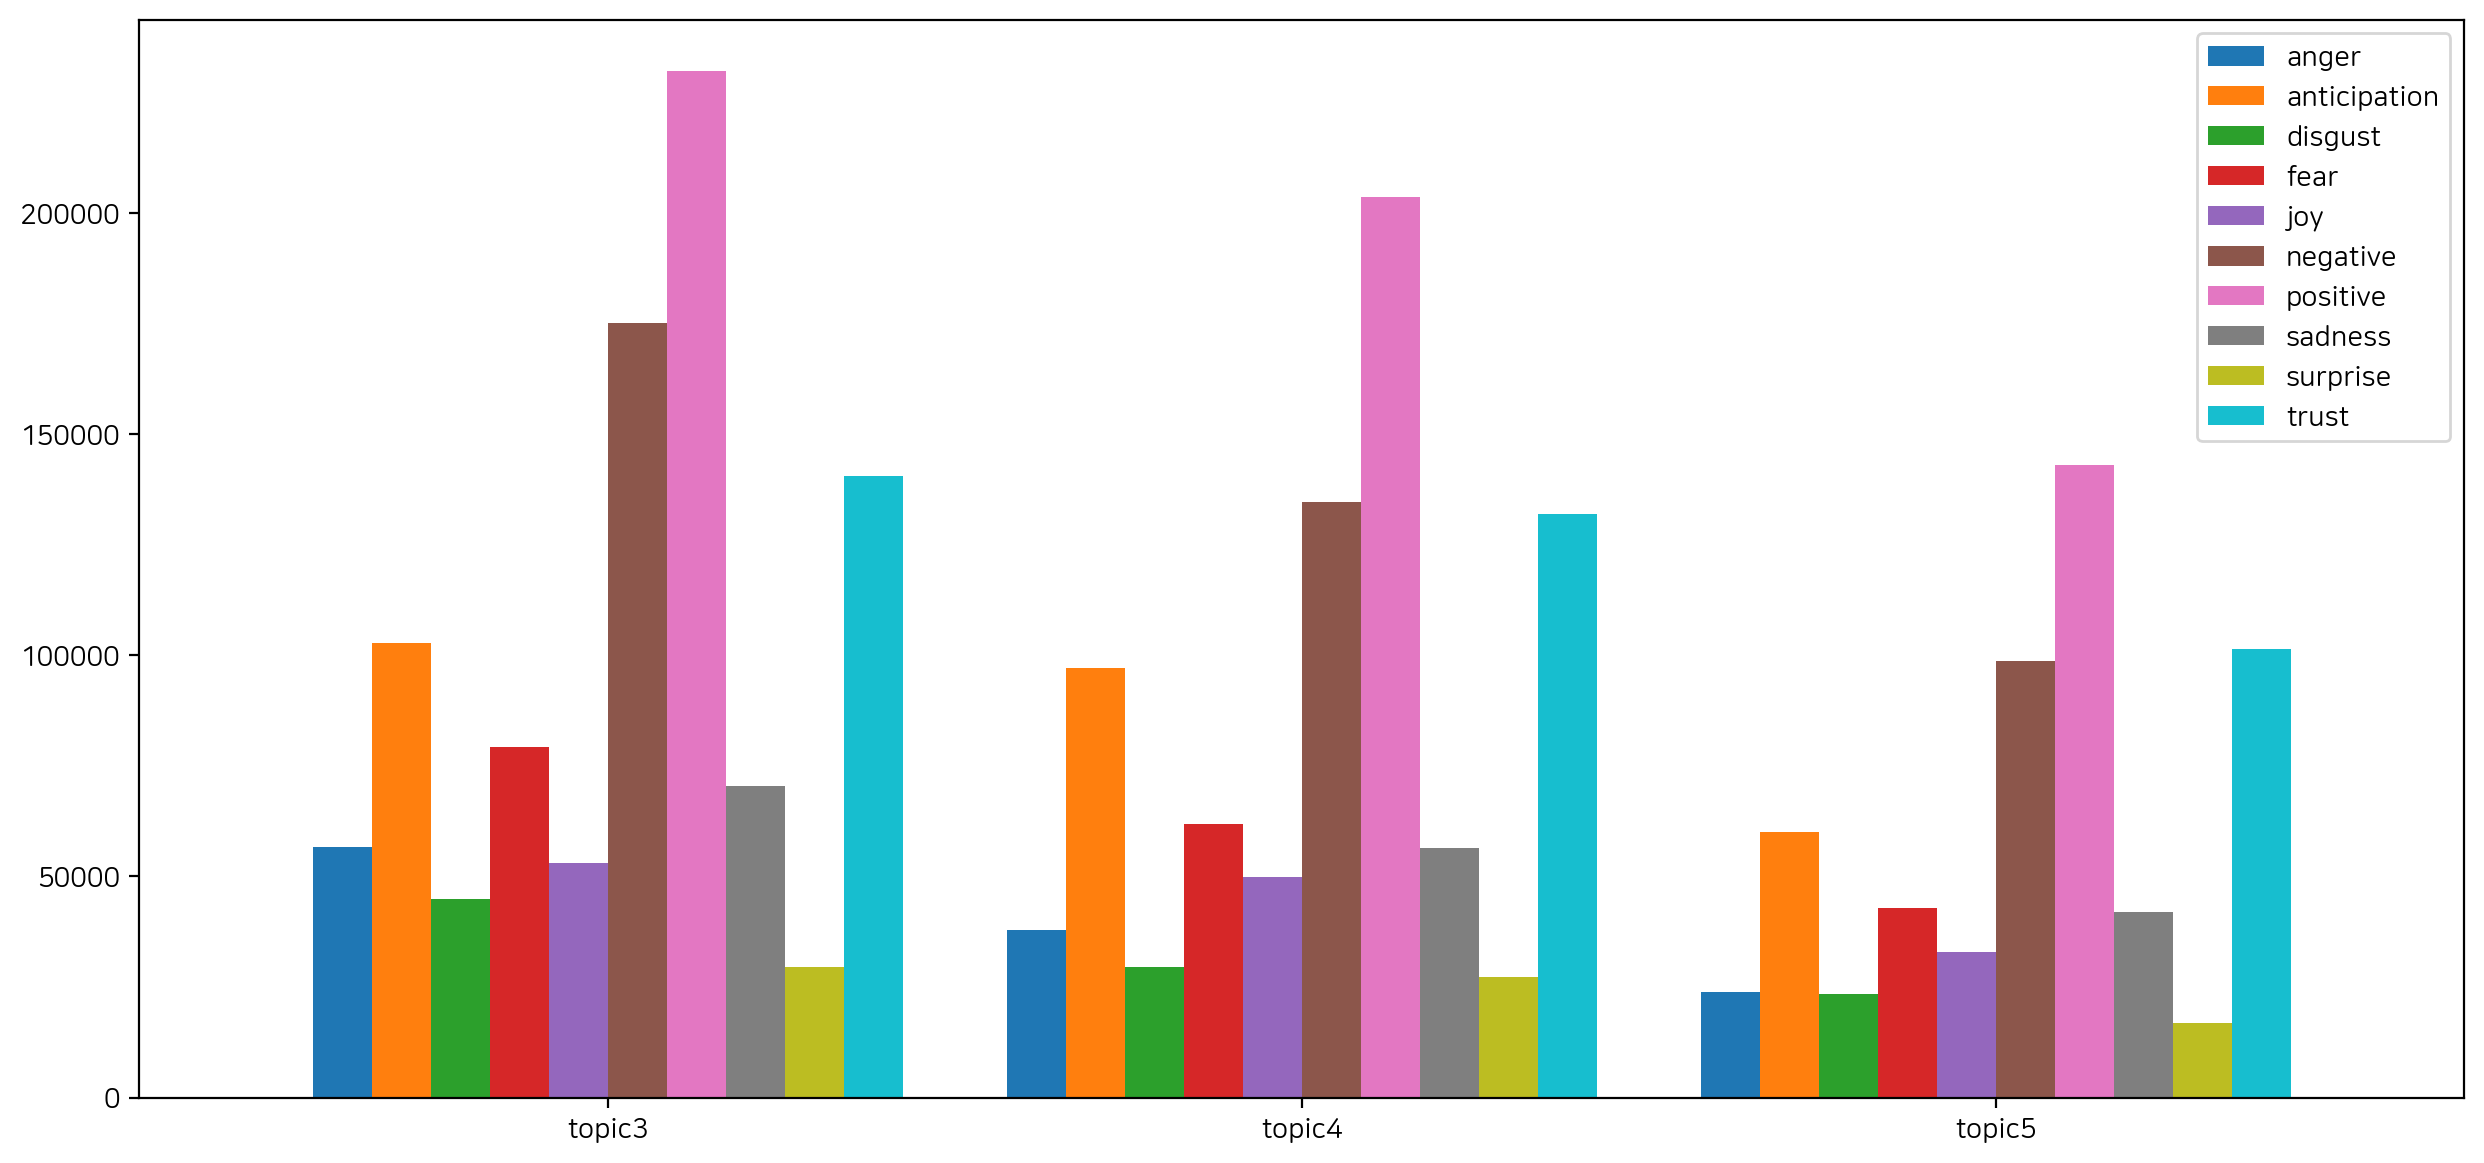

In [68]:
# 토픽별 감성값 막대 그래프
graph_plot = graph.plot(kind='bar', figsize=(15,7), rot=0, width = 0.85)  

## **이것 또한 긍정이 더 많음**

## N-gram

In [10]:
# 라이브러리 불러오기
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk # 자연어 처리를 위한 파이썬 패키지
from nltk.util import ngrams # 문자열에서 N개의 연속된 요소를 추출하는 방법
from tqdm import trange, notebook
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
df= pd.read_pickle("../data/analysis_data/cafeblog/pension_blogcafe_sentiwordnet.pkl")

In [45]:
df.head(1)

title  \
0  국세체납 건강보험료 미납시 국민연금 연체 압류 때문에 고민한다면   

                                                 doc like_cnt  comment_cnt  \
0  해마다 매년 경제가 불황이라는 뉴스가 나오는 것 같다고 했습니다 올해도 어김없이 마...        4         <NA>   

  comment_list img_cnt div_cnt  like   img   div  \
0         null      12       0  <NA>  <NA>  <NA>   

                                title_token_list_pos  \
0  [(국세, NNG), (체납, NNG), (건강, NNP), (보험료, NNP), ...   

               title_token_noun  \
0  [국세, 체납, 건강, 미납, 연체, 압류, 고민]   

                                      doc_token_noun  \
0  [경제, 불황, 경기, 코로나, 자영업자, 기업, 회사, 구조조정, 최악, 상황, ...   

                                  doc_token_list_pos comment_token_list_pos  \
0  [(하, VV), (아, EC), (마다, JX), (매년, MAG), (경제, N...           [(null, SL)]   

  comment_token_noun  doc_topic  \
0                 []          2   

                                           sentiword  \
0  [가까스로, 가능하다, 고통, 과로, 귀찮게, 꾸준한, 능하다, 대상, 도움, 되거...   

                                              values     score  
0  [0, 2, -2, -1, -1, 2, 2, 1, 1, -1, 2, -2, -1, ... -0.139535

In [46]:
# 감성 분석 결과를 바탕으로 긍정, 중립, 부정을 나타내는 sentiment 열 추가
senti = []

for i in trange(len(df)):
    if df['score'].iloc[i] <= -0.4:
        senti.append(-1)     # -0.4 이하인 경우 부정적으로 판단, -1로 표시
    elif df['score'].iloc[i] <= 0.4:
        senti.append(0)      # -0.4 초과 0.4 이하인 경우 중립적으로 판단, 0으로 표시
    else:
        senti.append(1)      # 0.4 초과인 경우 긍정적으로 판단, 1로 표시
    
df['sentiment'] = senti

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43626/43626 [00:00<00:00, 104015.36it/s]


In [47]:
df.head(1)

title  \
0  국세체납 건강보험료 미납시 국민연금 연체 압류 때문에 고민한다면   

                                                 doc like_cnt  comment_cnt  \
0  해마다 매년 경제가 불황이라는 뉴스가 나오는 것 같다고 했습니다 올해도 어김없이 마...        4         <NA>   

  comment_list img_cnt div_cnt  like   img   div  ...  \
0         null      12       0  <NA>  <NA>  <NA>  ...   

               title_token_noun  \
0  [국세, 체납, 건강, 미납, 연체, 압류, 고민]   

                                      doc_token_noun  \
0  [경제, 불황, 경기, 코로나, 자영업자, 기업, 회사, 구조조정, 최악, 상황, ...   

                                  doc_token_list_pos comment_token_list_pos  \
0  [(하, VV), (아, EC), (마다, JX), (매년, MAG), (경제, N...           [(null, SL)]   

  comment_token_noun doc_topic  \
0                 []         2   

                                           sentiword  \
0  [가까스로, 가능하다, 고통, 과로, 귀찮게, 꾸준한, 능하다, 대상, 도움, 되거...   

                                              values     score  sentiment  
0  [0, 2, -2, -1, -1, 2, 2, 1, 1, -1, 2, -2, -1, ... -0.139535          0  

[1 rows x 21 columns]

In [48]:
# Unigram 추출 함수 정의
def extract_ngrams(tokens, num):
    # ngrams() 함수를 사용하여 입력 토큰(tokens)에서 길이가 num인 n-그램을 추출
    n_grams = ngrams(tokens, num)
    n_grams = [ ' '.join(grams) for grams in n_grams] # 추출된 n-그램을 공백으로 구분된 문자열로 변환
    return n_grams # 변환된 n-그램 리스트를 반환

# Unigram 카운트 함수 정의
def count_ngrams(df, num):
    # 빈 딕셔너리를 생성하여 n-그램과 해당 빈도를 저장할 gram_dict 변수를 초기화
    gram_dict = {}
    for i in df:
        # extract_ngrams 함수를 사용하여 현재 항목 i에서 길이가 num인 n-그램을 추출
        grams = extract_ngrams(i, num)
        
        # 추출된 n-그램들을 반복하여 gram_dict에 추가하거나 갱신
        for j in grams:
            if j in gram_dict:
                gram_dict[j] += 1
            else:
                gram_dict[j] = 1
                
    # gram_dict의 항목들을 빈도를 기준으로 내림차순으로 정렬하여 새로운 딕셔너리로 변환
    gram_dict = dict(sorted(gram_dict.items(), key=lambda item: item[1], reverse=True))
    return gram_dict

### Unigrams : 1개의 단어로 토큰화

In [12]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumSquareRound'

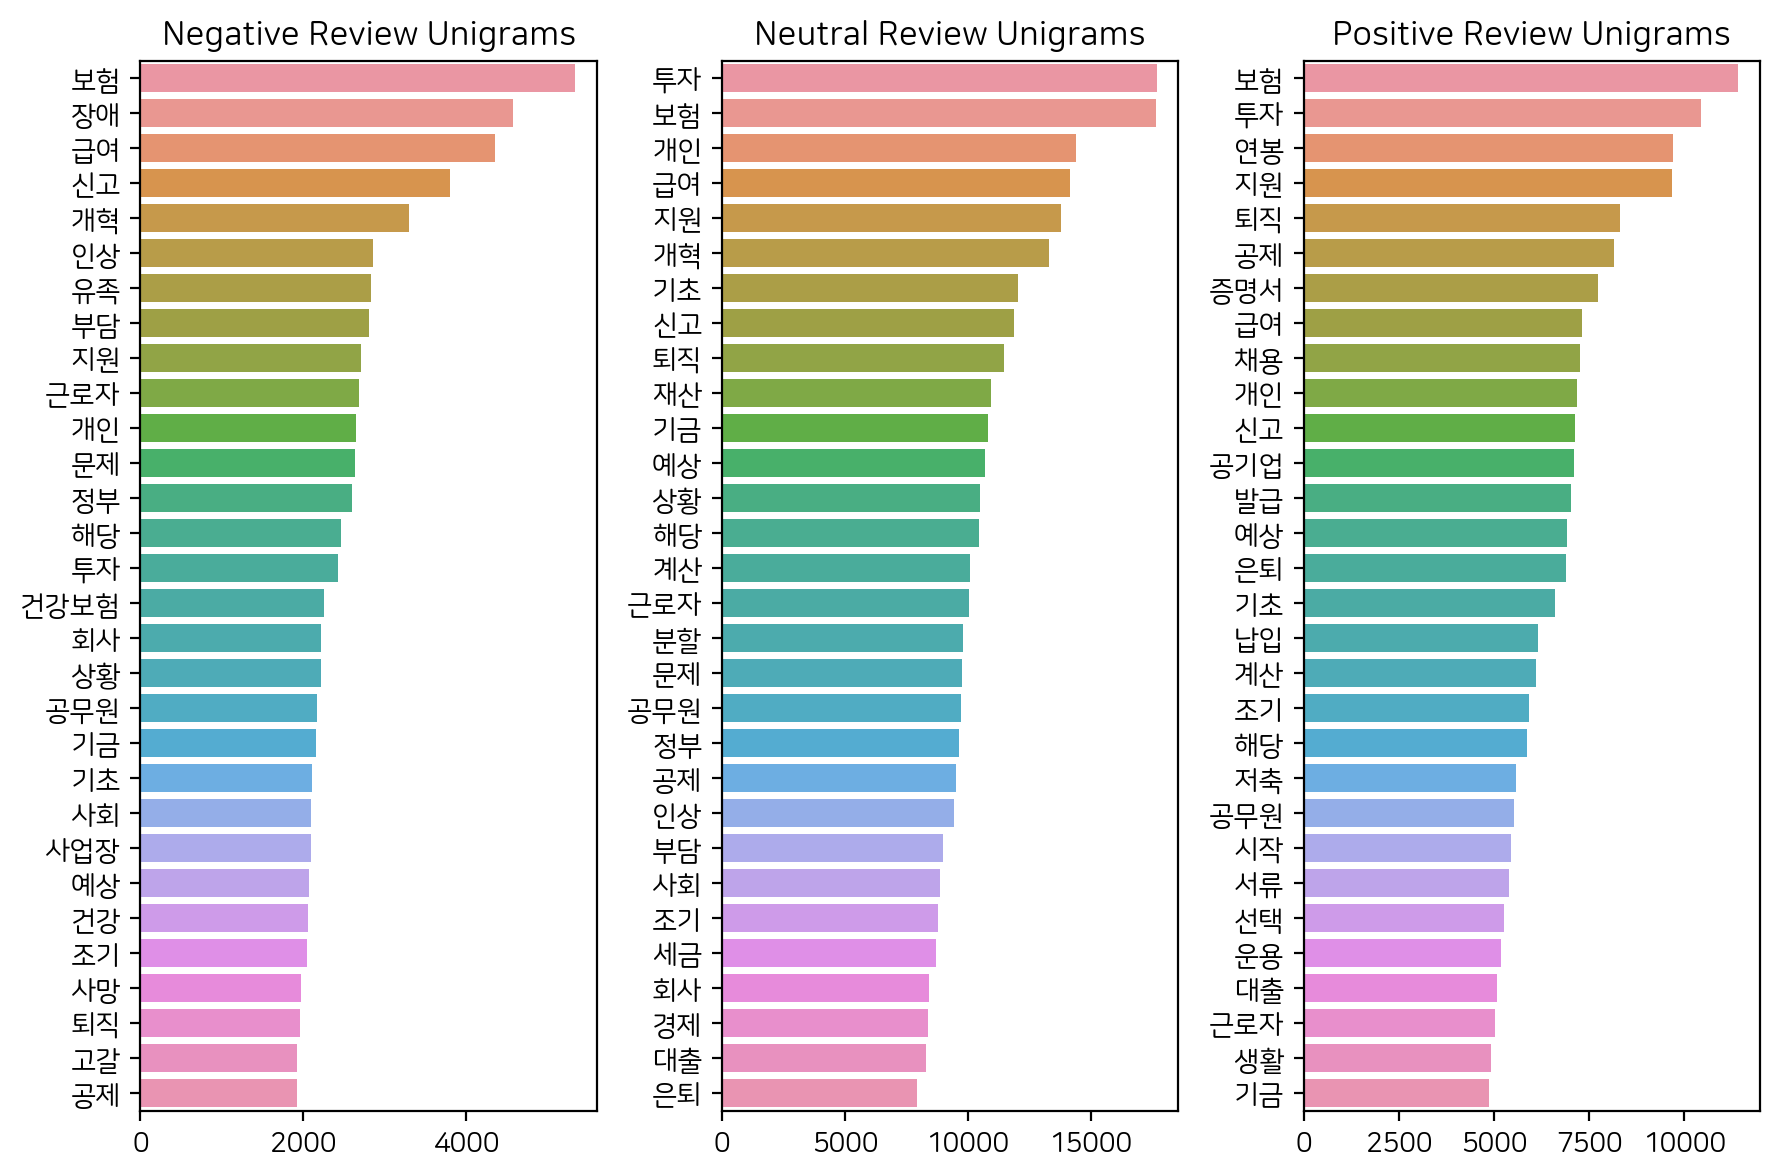

In [52]:
# 부정, 중립, 긍정 리뷰에 대한 Unigram 추출 및 시각화
unigrams_neg = count_ngrams(df[df['sentiment']==-1]['doc_token_noun'], 1)
unigrams_neu = count_ngrams(df[df['sentiment']==0]['doc_token_noun'], 1)
unigrams_pos = count_ngrams(df[df['sentiment']==1]['doc_token_noun'], 1)

# 1x3 그리드의 서브플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(9,6))
num = 30   # 상위 30개의 Unigram만 시각화
sns.barplot(x=list(unigrams_neg.values())[:num], y=list(unigrams_neg.keys())[:num], ax=axes[0])
sns.barplot(x=list(unigrams_neu.values())[:num], y=list(unigrams_neu.keys())[:num], ax=axes[1])
sns.barplot(x=list(unigrams_pos.values())[:num], y=list(unigrams_pos.keys())[:num], ax=axes[2])

# 서브플롯 타이틀 설정
axes[0].set_title('Negative Review Unigrams')
axes[1].set_title('Neutral Review Unigrams')
axes[2].set_title('Positive Review Unigrams')

# 서브플롯 간 간격 조절
plt.tight_layout()
plt.show()

### Bigrams : 2개의 단어로 토큰화

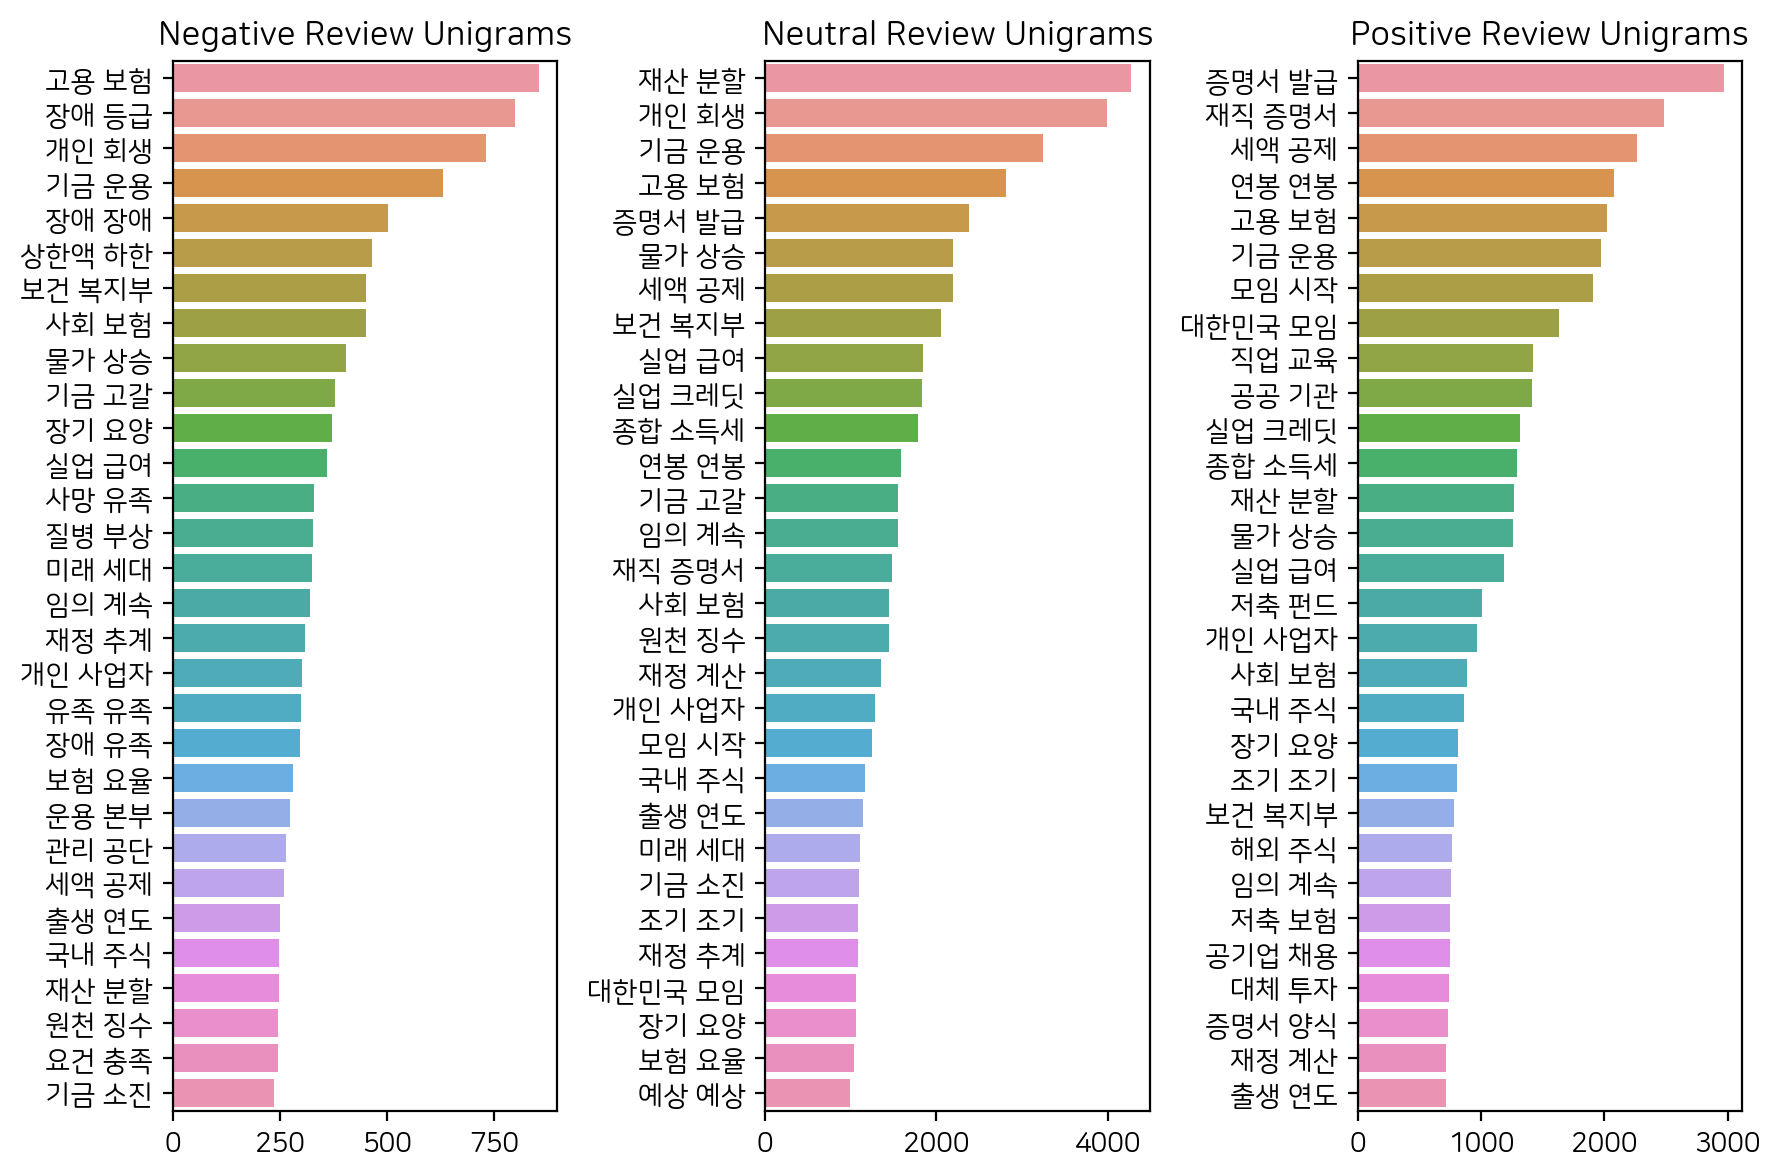

In [53]:
# 부정, 중립, 긍정 리뷰에 대한 Bigram 추출 및 시각화
unigrams_neg = count_ngrams(df[df['sentiment']==-1]['doc_token_noun'], 2)
unigrams_neu = count_ngrams(df[df['sentiment']==0]['doc_token_noun'], 2)
unigrams_pos = count_ngrams(df[df['sentiment']==1]['doc_token_noun'], 2)

# 1x3 그리드의 서브플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(9,6))
num = 30   # 상위 30개의 Bigram만 시각화
sns.barplot(x=list(unigrams_neg.values())[:num], y=list(unigrams_neg.keys())[:num], ax=axes[0])
sns.barplot(x=list(unigrams_neu.values())[:num], y=list(unigrams_neu.keys())[:num], ax=axes[1])
sns.barplot(x=list(unigrams_pos.values())[:num], y=list(unigrams_pos.keys())[:num], ax=axes[2])

# 서브플롯 타이틀 설정
axes[0].set_title('Negative Review Unigrams')
axes[1].set_title('Neutral Review Unigrams')
axes[2].set_title('Positive Review Unigrams')
# 서브플롯 간 간격 조절
plt.tight_layout()
plt.show()

### trigrams : 3개의 단어로 토큰화

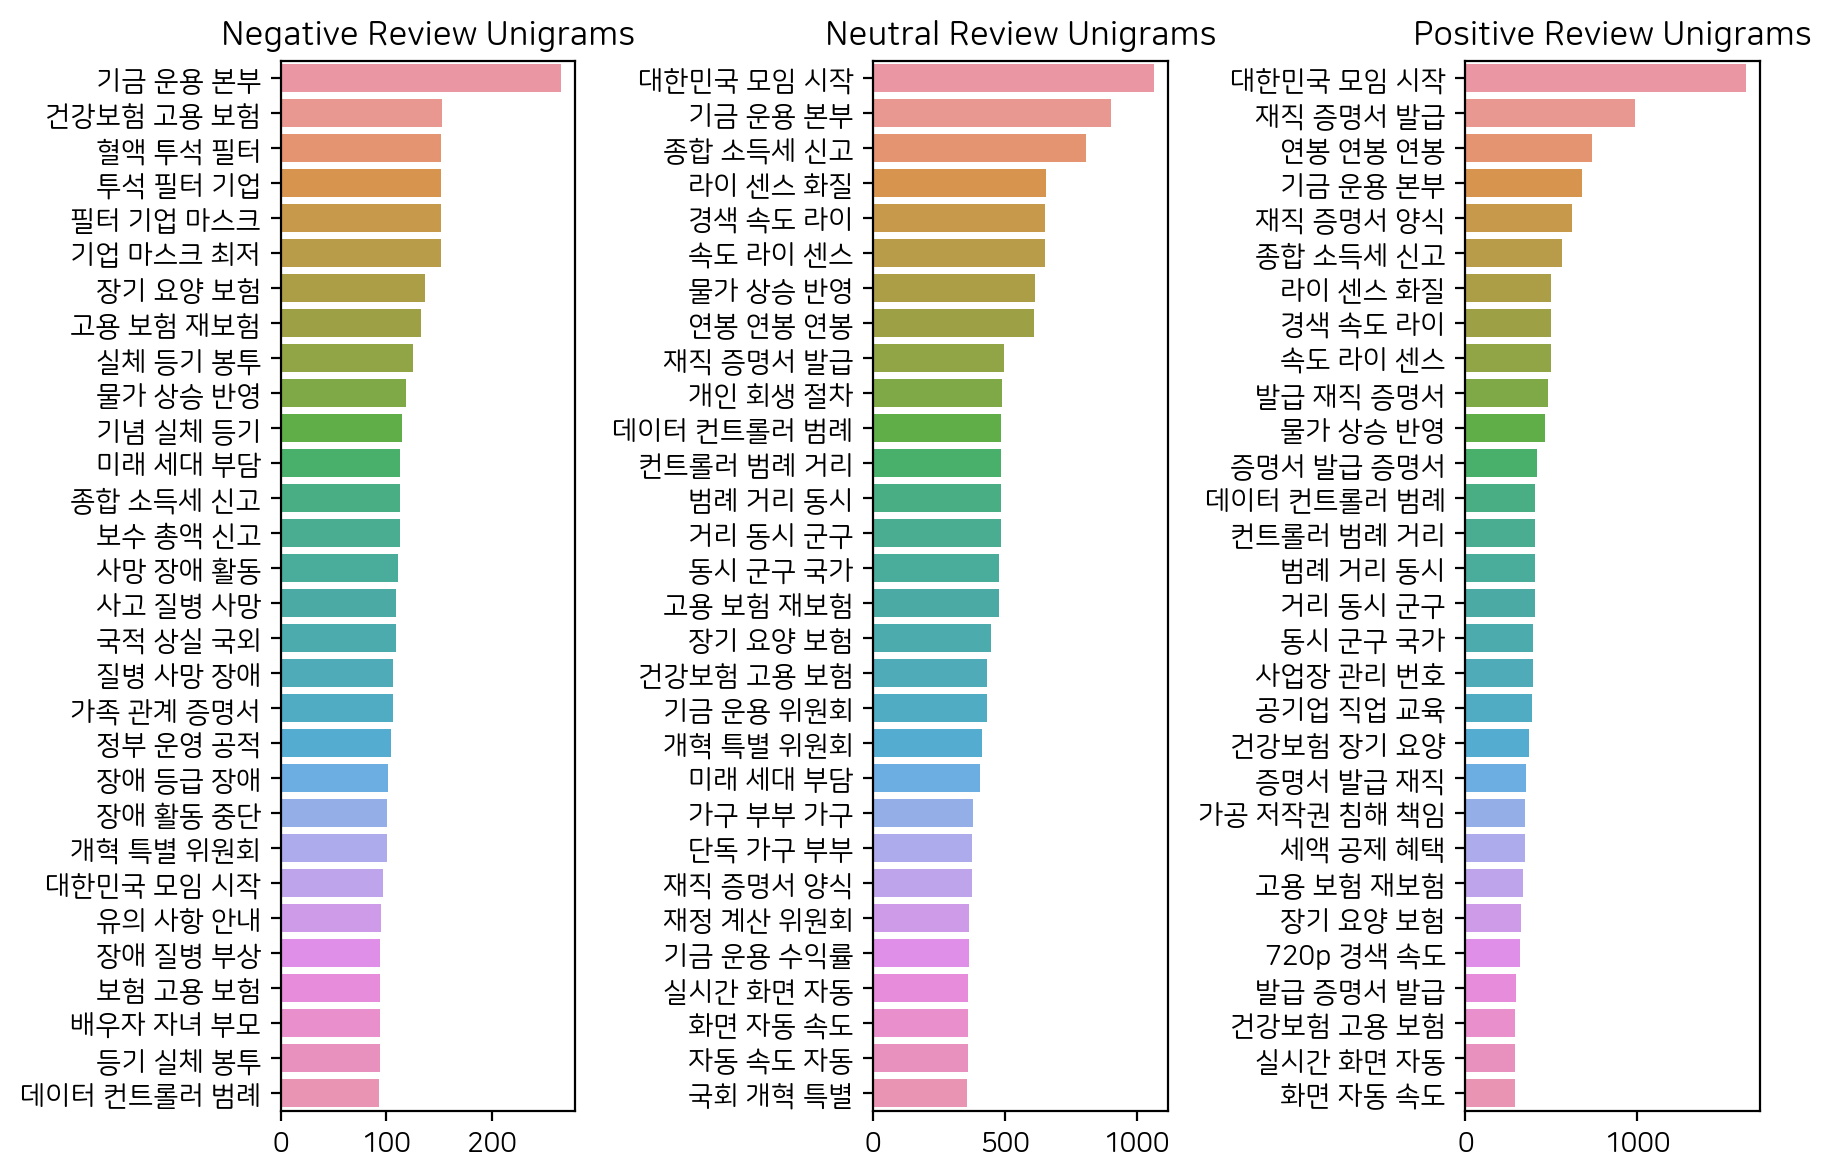

In [54]:
# 부정, 중립, 긍정 리뷰에 대한 Bigram 추출 및 시각화
unigrams_neg = count_ngrams(df[df['sentiment']==-1]['doc_token_noun'], 3)
unigrams_neu = count_ngrams(df[df['sentiment']==0]['doc_token_noun'], 3)
unigrams_pos = count_ngrams(df[df['sentiment']==1]['doc_token_noun'], 3)

# 1x3 그리드의 서브플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(9,6))
num = 30   # 상위 30개의 Bigram만 시각화
sns.barplot(x=list(unigrams_neg.values())[:num], y=list(unigrams_neg.keys())[:num], ax=axes[0])
sns.barplot(x=list(unigrams_neu.values())[:num], y=list(unigrams_neu.keys())[:num], ax=axes[1])
sns.barplot(x=list(unigrams_pos.values())[:num], y=list(unigrams_pos.keys())[:num], ax=axes[2])

# 서브플롯 타이틀 설정
axes[0].set_title('Negative Review Unigrams')
axes[1].set_title('Neutral Review Unigrams')
axes[2].set_title('Positive Review Unigrams')
# 서브플롯 간 간격 조절
plt.tight_layout()
plt.show()